The goal of this Notebook is to take the parts of NovemberPhyloProc.ipynb that I expect to go into the actual manuscript.

# Figure Outline

* Figure 1. Antibodies over time.

* Figure 2. Weighted unifrac PCoA

* Table 1. Kernel regression and weighted unifrac 1 test - binomial

* Table S1. Kernel regression and weighted unifrac 1 test - gaussian

* Table S2. Weighted unifrac components 2-N

* Figure S1. Jensen Shannon at different agglomeration levels.

* Figure S2. Statistically significant (p< 0.05, q < 0.2) family genus and species abundances (clr transformed) regressed against weighted unifrac 1.

* Table S3. All family - genus and species vs antibody vs glm scores.

* Figure 3. Stacked bars of key groups ordered by weighted unifrac axis 1.

* Figure S3. Groups associated with IgGs.

* Figure 4. Proportionality heat-map

* Other supplements: The entire data table
    * Basically the components of psN2, except the tree?
    * Or can I just release the input data files?

3/20/2017
Re-ran whole pipeline end-to-end. Hits on everything (including igg gp41 0 day) except only trending on gp41 Month 6.5. However I don't see family level groups for gp41 that relate to community structure (q < 0.2, p < 0.05). I may just try running everything end to end a few more times to see what happens. This because I want to see how consistant (or otherwise) the results are between runs.
Also, I'm going to start setting seeds now.

# Loading libraries, functions and data

## Libraries

In [1]:
# only use library paths in the anaconda environment

#.libPaths(grep('anaconda3', .libPaths(), value = T))

In [2]:
.libPaths()

[1] "/home/jcram/R/x86_64-pc-linux-gnu-library/3.4"                
[2] "/home/jcram/Programs/anaconda3/envs/nyvac-lab-2/lib/R/library"

In [3]:
R.version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          3                           
minor          4.1                         
year           2017                        
month          06                          
day            30                          
svn rev        72865                       
language       R                           
version.string R version 3.4.1 (2017-06-30)
nickname       Single Candle               

In [4]:
# https://stackoverflow.com/questions/46354826/have-a-function-that-calls-library-and-takes-either-a-package-or-its-name-as-inp


# Also return package version when loading in packages
# accept strings or functions
libver <- function(pac){

    pac <- as.character(substitute(pac))
    library(pac, character.only=TRUE)
    packageVersion(pac)
    }

In [5]:
#libver("dada2")
#libver("ggplot2")

In [6]:
# Much of the data handling
libver('phyloseq')

Warning message:
“package ‘phyloseq’ was built under R version 3.4.3”

[1] ‘1.22.3’

In [7]:
# A bunch of environments, including ggplot, dplyr, tidyr, and broom, which I use a lot
libver('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.0     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


[1] ‘1.2.1’

In [8]:
# Mostly for concatenating ggplots
library(gridExtra); packageVersion("gridExtra")


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



[1] ‘2.2.1’

In [9]:
# I use this surprisingly not a lot here.
library(vegan); packageVersion("vegan")

Warning message:
“package ‘vegan’ was built under R version 3.4.3”Loading required package: permute
Warning message:
“package ‘permute’ was built under R version 3.4.3”Loading required package: lattice
This is vegan 2.4-6


[1] ‘2.4.6’

In [10]:
# For making trees
# libver('phangorn')

In [11]:
# A prerequesite to phangorn
# libver("DECIPHER")

In [12]:
# Some pre-processing stuff
# libver("dada2")

In [13]:
# I usually reshape with tidyverse tools now, but melt and cast are often easier in a pinch
# libver("reshape2")

In [14]:
# For replacing NaNs without too much thought.
libver("imputeMissings")


Attaching package: ‘imputeMissings’

The following object is masked from ‘package:dplyr’:

    compute



[1] ‘0.0.3’

In [15]:
# Deal with proportional data, especially useful for calculating proportionality phi
libver('compositions')

Loading required package: tensorA

Attaching package: ‘tensorA’

The following object is masked from ‘package:base’:

    norm

Loading required package: robustbase
Loading required package: energy
Loading required package: bayesm
Welcome to compositions, a package for compositional data analysis.
Find an intro with "? compositions"


Attaching package: ‘compositions’

The following objects are masked from ‘package:stats’:

    cor, cov, dist, var

The following objects are masked from ‘package:base’:

    %*%, scale, scale.default



[1] ‘1.40.1’

In [16]:
# Works with tidyverse to make model output tidy
libver('broom')

[1] ‘0.4.4’

In [17]:
# Make pretty tables
libver('knitr')
libver('kableExtra')

[1] ‘1.20’

Warning message:
“package ‘kableExtra’ was built under R version 3.4.3”

[1] ‘0.8.0’

In [18]:
# Let those pretty tables actually show up in a jupyter notebook
library('IRdisplay')

In [19]:
# For bootstrapping
libver('boot')


Attaching package: ‘boot’

The following object is masked from ‘package:robustbase’:

    salinity

The following object is masked from ‘package:lattice’:

    melanoma



[1] ‘1.3.20’

In [20]:
# Calculate kernel regressions
libver("MiRKAT")

Loading required package: survival

Attaching package: ‘survival’

The following object is masked from ‘package:boot’:

    aml

The following object is masked from ‘package:robustbase’:

    heart

Loading required package: PearsonDS
Loading required package: GUniFrac
Loading required package: ape
Warning message:
“package ‘ape’ was built under R version 3.4.3”
Attaching package: ‘ape’

The following object is masked from ‘package:compositions’:

    balance

Loading required package: matrixStats
Warning message:
“package ‘matrixStats’ was built under R version 3.4.3”
Attaching package: ‘matrixStats’

The following objects are masked from ‘package:robustbase’:

    colMedians, rowMedians

The following object is masked from ‘package:dplyr’:

    count

Loading required package: MASS

Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select



[1] ‘1.0’

In [21]:
#
libver("car")


Attaching package: ‘car’

The following object is masked from ‘package:boot’:

    logit

The following object is masked from ‘package:dplyr’:

    recode

The following object is masked from ‘package:purrr’:

    some



[1] ‘2.1.4’

In [22]:
#libver(mclust)

In [23]:
#libver(chemometrics)

In [24]:
libver(purrrlyr)

[1] ‘0.0.2’

In [25]:
libver('qvalue')

[1] ‘2.8.0’

## Functions

I have put the functions in a library file

In [26]:
source('libraries/library096.R')

## Data

In [27]:
# Set upOriginal to false, if you want to used user-reprocessed data.
# Results may differ slightly from those in the manuscript due to inter-run variation
# especially in the tree-ing algorithm.
 upOriginal <- TRUE
# upOriginal <- FALSE

In [28]:
# For permutation tests, how fast do things need to run
# 9999 for most runs, 99999 for publication quality ones suggested
jnperm <- 9999

In [29]:
# Data paths
getwd()
(mapping_file_path <- file.path('data', 'mapping_file_096a.csv'))
(immune_file_path <- file.path('data', 'immune096b.csv'))

if(upOriginal){
     seqtab_file_path <- file.path('data', 'seqtab.nochimNov2017.csv')
     taxa_file_path <- file.path('data', 'TaxaNov2017.csv')
     tree_path <- file.path('data', 'phylogeny096NovTree.tre')
    } else {
     seqtab_file_path <- file.path('data1', 'seqtab.nochimMar2018.csv')
     taxa_file_path <- file.path('data1', 'TaxaMar2018.csv')
     tree_path <- file.path('data1', 'phylogeny096Mar2018tre.tre')
}

seqtab_file_path
taxa_file_path
tree_path

[1] "/home/jcram/Projects/Nyvac096Microbiome"

[1] "data/mapping_file_096a.csv"

[1] "data/immune096b.csv"

[1] "data/seqtab.nochimNov2017.csv"

[1] "data/TaxaNov2017.csv"

[1] "data/phylogeny096NovTree.tre"

In [30]:
# Sequence data
seqtab.nochim.data <- read.csv(seqtab_file_path)

seqtabNames = gsub('\\.', '-',
    gsub('.fastq', '', seqtab.nochim.data$X)
                   )

seqtab.nochim = as.matrix(seqtab.nochim.data[,-1])
rownames(seqtab.nochim) = seqtabNames

In [31]:
# Taxa names
taxa.data <- read.csv(taxa_file_path)
taxa = taxa.data[,-1]

## I reverse complemented the sequences to generate the taxonomy
# (but only in this latest re-run, not the original)
## The following undoes that reverse complement to get original sequence
#rownames(taxa) = dada2:::rc(taxa.data[,1]) 

if(upOriginal){
    rownames(taxa) = (taxa.data[,1])} else {
    rownames(taxa) = dada2:::rc(taxa.data[,1]) 
}

taxa <- as.matrix(taxa)

In [32]:
# Mapping file
mapping.data <- read_csv(mapping_file_path) %>%
mutate(pub_id = sapply(pub_id,  function(x) {as.numeric(gsub("096-", "", x))}))
#mapping = mapping.data[,-1]
#rownames(mapping) = mapping.data[,1]
#mapping <- as.matrix(mapping)

Parsed with column specification:
cols(
  SampleID = col_character(),
  BarcodeSequence = col_character(),
  LinkerPrimerSequence = col_character(),
  ReversePrimer = col_character(),
  run_prefix = col_character(),
  pub_id = col_character(),
  Sex = col_character(),
  Visit = col_integer(),
  visitRank = col_integer(),
  RXCode = col_character(),
  Description = col_character()
)


In [33]:
head(mapping.data)

SampleID,BarcodeSequence,LinkerPrimerSequence,ReversePrimer,run_prefix,pub_id,Sex,Visit,visitRank,RXCode,Description
Sample-57,TTACGC,GCGGACTACCVGGGTATCTAAT,"GCACTCCTRCGGGAGGCAGCAG,GCACACCTACGGGTGGCTGC,GCACACCTACGGGTGGCAGC",JH3VWZ201,282,Male,9,1,T1,"NYVAC (2) & placebo mo(0,1) + NYVAC (2) & AIDSVAX B/E mo(3,6)"
Sample-58,TTAGGT,GCGGACTACCVGGGTATCTAAT,"GCACTCCTRCGGGAGGCAGCAG,GCACACCTACGGGTGGCTGC,GCACACCTACGGGTGGCAGC",JH3VWZ201,282,Male,12,2,T1,"NYVAC (2) & placebo mo(0,1) + NYVAC (2) & AIDSVAX B/E mo(3,6)"
Sample-60,TTCCAC,GCGGACTACCVGGGTATCTAAT,"GCACTCCTRCGGGAGGCAGCAG,GCACACCTACGGGTGGCTGC,GCACACCTACGGGTGGCAGC",JH3VWZ201,176,Female,9,1,T1,"NYVAC (2) & placebo mo(0,1) + NYVAC (2) & AIDSVAX B/E mo(3,6)"
Sample-61,TTGTAC,GCGGACTACCVGGGTATCTAAT,"GCACTCCTRCGGGAGGCAGCAG,GCACACCTACGGGTGGCTGC,GCACACCTACGGGTGGCAGC",JH3VWZ201,176,Female,12,2,T1,"NYVAC (2) & placebo mo(0,1) + NYVAC (2) & AIDSVAX B/E mo(3,6)"
Sample-62,TTGTGT,GCGGACTACCVGGGTATCTAAT,"GCACTCCTRCGGGAGGCAGCAG,GCACACCTACGGGTGGCTGC,GCACACCTACGGGTGGCAGC",JH3VWZ201,123,Female,12,1,T4,"DNA & placebo & AIDSVAX B/E mo(0,1) + NYVAC (2) & AIDSVAX B/E mo(3,6)"
Sample-63,TATCAC,GCGGACTACCVGGGTATCTAAT,"GCACTCCTRCGGGAGGCAGCAG,GCACACCTACGGGTGGCTGC,GCACACCTACGGGTGGCAGC",JH3VWZ201,49,Female,9,1,T2,"NYVAC (2) & AIDSVAX B/E mo(0,1,3,6)"


In [34]:
# Immune Data
immune.data0 <- read_csv(immune_file_path)
immune.data <- mutate(immune.data0, pub_id = sapply(pub_id,  function(x) {as.numeric(gsub("096-", "", x))}))
levels(immune.data$antigen) <- gsub("[ /]", ".", levels(immune.data$antigen))

Parsed with column specification:
cols(
  visitno = col_integer(),
  rx_code = col_character(),
  type = col_character(),
  antigen = col_character(),
  mag = col_double(),
  mag_bl = col_double(),
  response = col_integer(),
  day = col_integer(),
  month = col_double(),
  ct = col_character(),
  response_j = col_double(),
  assay = col_character(),
  pub_id = col_character()
)


In [35]:
head(immune.data)

visitno,rx_code,type,antigen,mag,mag_bl,response,day,month,ct,response_j,assay,pub_id
5,CTRL,IgA,gp41,180.50,213.5,0,42,1.5,CTRL,-0.002373369,BAMA,41
7,CTRL,IgA,gp41,174.80,213.5,0,98,3.5,CTRL,-0.159842993,BAMA,41
9,CTRL,IgA,gp41,177.25,213.5,0,182,6.5,CTRL,0.173147267,BAMA,41
12,CTRL,IgA,gp41,173.00,213.5,0,364,12.0,CTRL,0.165522137,BAMA,41
5,CTRL,IgA,p24,447.20,454.3,0,42,1.5,CTRL,0.146694884,BAMA,41
7,CTRL,IgA,p24,766.80,454.3,0,98,3.5,CTRL,0.186938554,BAMA,41


In [36]:
# Phylogenetic tree
seqs <- dada2::getSequences(seqtab.nochim)
names(seqs) <- seqs

pt <- read.tree(file=tree_path)

pt2 <- phangorn::midpoint(pt)

In [37]:
immune.data$antigen %>% unique

[1] "gp41"               "p24"                "Con.6.gp120.B"     
[4] "ZM96.gp140"         "gp70_B.CaseA_V1_V2" "ANY.ENV.PTEG"

Save options to a variable

In [38]:
par0 <- options()

# Pre-processing

In [39]:
## minimal sample identification data
pub_id_key <- unique(immune.data[,c("pub_id", "rx_code", "ct")])

sample_sm0 <- dplyr::select(mapping.data, SampleID, pub_id, sex = Sex, muVisit = Visit, muVisitRank = visitRank)
sample_sm <- left_join(sample_sm0, pub_id_key, by = "pub_id") %>%
as.data.frame %>%
tibble::column_to_rownames(var = "SampleID")
# rownames(sample_sm)
# head(sample_sm)

Warning message:
“Column `pub_id` has different attributes on LHS and RHS of join”

In [40]:
# Make raw phyloseq object
ot <- otu_table(seqtab.nochim, taxa_are_rows=FALSE)

tt <- tax_table(taxa)
dimnames(tt) = dimnames(taxa)

spl <- sample_data(sample_sm)


psN is a really raw phyloseq object
* OTU names are given as accession numbers
* Numbers are in total counts
* We have samples from both time points

In [41]:
# Quite raw phyloseq object. Species names are given as accession numbers
psN <- phyloseq(ot, tt, spl, pt2)

psN

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 960 taxa and 47 samples ]
sample_data() Sample Data:       [ 47 samples by 6 sample variables ]
tax_table()   Taxonomy Table:    [ 960 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 960 tips and 959 internal nodes ]

I want to make a phyloseq object for use in essentally all of the subsequent analyses.
Features include:
* Some basic taxonomic pre-processing.
    * No uncharacterized phyla.
    * Only OTUs that show up at least 10% of the time in the final data set .
        * Do this after filtering samples.
* No tip-glomming. I'll save that untill later.
* Immune data is included in the sample data table. 
    * We'll do Andrew's representitive IgGs and IgAs.
* We only have samples from visit 1.
* We only have samples from experemental (not control) groups.

In [42]:
immune.data %>% pull(type) %>% unique

[1] "IgA"  "IgG"  "CD4+"

In [43]:
#immune.data %>% unite(type_antigen ,type, antigen, sep = "_")

In [44]:
immune.data %>% dplyr::select(pub_id, month, type, antigen, mag) %>% 
filter(month %in% c(0, 6.5, 12)) %>%
unite(type_antigen, type, antigen, sep = "_") %>%
unite(type_antigen_month,type_antigen, month, sep = "_Month_") %>%
spread(key = type_antigen_month, value = mag, drop = TRUE) -> immune.table

In [45]:
immune.table %>% head

pub_id,CD4+_ANY.ENV.PTEG_Month_0,CD4+_ANY.ENV.PTEG_Month_12,CD4+_ANY.ENV.PTEG_Month_6.5,IgA_gp41_Month_0,IgA_gp41_Month_12,IgA_gp41_Month_6.5,IgA_p24_Month_0,IgA_p24_Month_12,IgA_p24_Month_6.5,⋯,IgG_gp41_Month_6.5,IgG_gp70_B.CaseA_V1_V2_Month_0,IgG_gp70_B.CaseA_V1_V2_Month_12,IgG_gp70_B.CaseA_V1_V2_Month_6.5,IgG_p24_Month_0,IgG_p24_Month_12,IgG_p24_Month_6.5,IgG_ZM96.gp140_Month_0,IgG_ZM96.gp140_Month_12,IgG_ZM96.gp140_Month_6.5
3,0.025,NA,0.06780192,53.0,29.0,75.50,573.3,773.0,433.70,⋯,18352.75,1,1.00,7274.50,766.00,3020.00,30974.5,179.00,185.25,5384.00
4,0.025,NA,NA,18.5,NA,NA,404.5,NA,NA,⋯,NA,1,NA,NA,1499.00,NA,NA,1.00,NA,NA
5,0.025,0.025,0.02500000,157.0,239.7,206.00,377.0,1662.2,12705.50,⋯,169.50,1,1.00,1.00,375.00,1169.50,1776.0,7.25,1.00,377.50
7,0.025,0.025,0.02500000,4.0,71.0,125.25,2886.0,6346.5,4091.50,⋯,222.25,1,1.00,1.00,3730.25,2585.50,1874.5,1.00,1.00,43.00
12,0.025,0.025,0.05147362,22.0,175.5,271.00,446.5,2782.5,6338.75,⋯,23121.25,1,67.25,4326.25,3089.75,29983.25,32315.0,1.00,298.50,8202.75
14,0.025,0.025,0.30173181,18.0,73.2,163.75,183.0,2514.0,7305.50,⋯,31671.50,1,200.50,11818.25,95.50,30760.50,32343.5,32.75,719.25,7122.00


## Initial Taxonomic filter.
Some investegation suggested by the phyloseq tutorials
to identify phyla for removal, and to identify an abundance threshold

In [46]:
psN

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 960 taxa and 47 samples ]
sample_data() Sample Data:       [ 47 samples by 6 sample variables ]
tax_table()   Taxonomy Table:    [ 960 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 960 tips and 959 internal nodes ]

In [47]:
psN %>% subset_samples(!is.na(pub_id))

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 960 taxa and 38 samples ]
sample_data() Sample Data:       [ 38 samples by 6 sample variables ]
tax_table()   Taxonomy Table:    [ 960 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 960 tips and 959 internal nodes ]

In [48]:
# skip the blanks
psN %>% subset_samples(!is.na(pub_id)) %>%
# OTUs must be characterized to phylum
subset_taxa(!is.na(Phylum)& !Phylum %in% c("", "uncharacterized")) -> psN_hasPhylum
psN_hasPhylum
# from 960 to 929 otus

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 929 taxa and 38 samples ]
sample_data() Sample Data:       [ 38 samples by 6 sample variables ]
tax_table()   Taxonomy Table:    [ 929 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 929 tips and 928 internal nodes ]

Identifying and removing phyla with very few taxa in them

In [49]:
prevdf = apply(X = otu_table(psN_hasPhylum),
                 MARGIN = ifelse(taxa_are_rows(psN_hasPhylum), yes = 1, no = 2),
                 FUN = function(x){sum(x > 0)})
# Add taxonomy and total read counts to this data.frame
prevdf = data.frame(Prevalence = prevdf,
                      TotalAbundance = taxa_sums(psN_hasPhylum),
                      tax_table(psN_hasPhylum))

plyr::ddply(prevdf, "Phylum", function(df1){cbind(mean(df1$Prevalence),sum(df1$Prevalence))})

Phylum,1,2
Actinobacteria,7.953846,517
Bacteroidetes,9.414634,1930
Elusimicrobia,2.000000,2
Firmicutes,9.711604,5691
Fusobacteria,5.875000,94
Proteobacteria,6.960000,348
Synergistetes,3.750000,15
Tenericutes,4.000000,4
Verrucomicrobia,6.000000,6


In [50]:
filterPhyla = c("Verrucomicrobia", "Tenericutes", "Elusimicrobia", "Synergistetes")
psN_MainPhyla = subset_taxa(psN_hasPhylum, !Phylum %in% filterPhyla)
psN_MainPhyla

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 922 taxa and 38 samples ]
sample_data() Sample Data:       [ 38 samples by 6 sample variables ]
tax_table()   Taxonomy Table:    [ 922 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 922 tips and 921 internal nodes ]

Warning message:
“Transformation introduced infinite values in continuous x-axis”

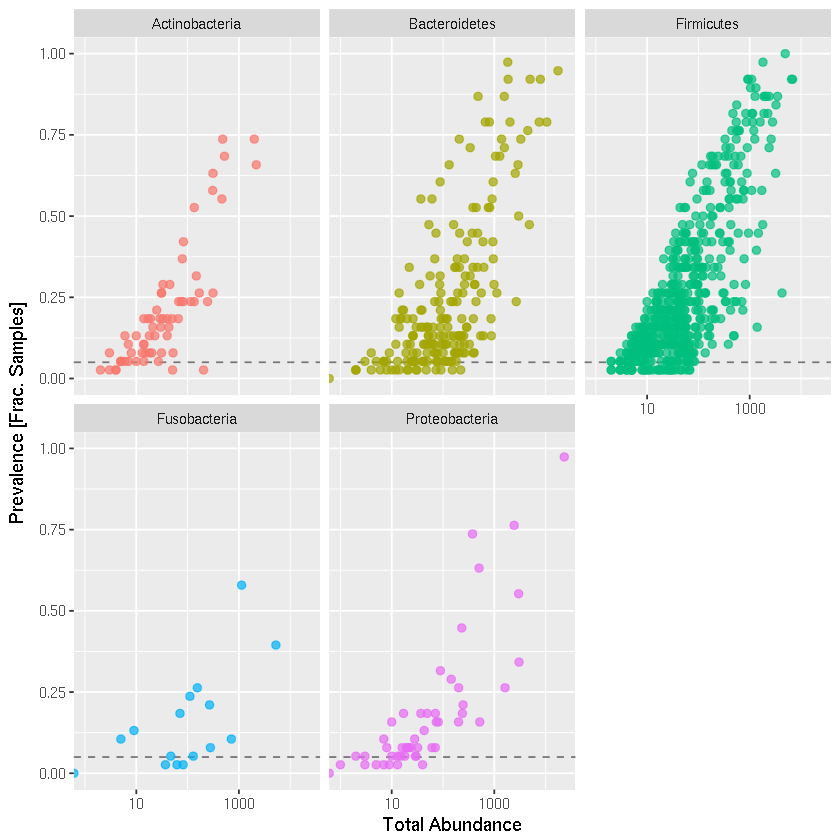

In [51]:
# Determining abundance threshold
prevdf1 = subset(prevdf, Phylum %in% get_taxa_unique(psN_MainPhyla, "Phylum"))
ggplot(prevdf1, aes(TotalAbundance, Prevalence / nsamples(psN_hasPhylum),color=Phylum)) +
  # Include a guess for parameter
  geom_hline(yintercept = 0.05, alpha = 0.5, linetype = 2) + geom_point(size = 2, alpha = 0.7) +
  scale_x_log10() +  xlab("Total Abundance") + ylab("Prevalence [Frac. Samples]") +
  facet_wrap(~Phylum) + theme(legend.position="none")

## Constructing psN2 
(phyloseq object of relative abundances)

And psN1 (phyloseq object of counts)

In [52]:
psN %>%
# add all the immune data
phylo_join(immune.table, by = "pub_id") %>%
# filter to just microbiome visit 1 and experemental treatments
subset_samples(muVisitRank == 1) %>%
subset_samples(ct == "T") %>%
# only otus from known taxa that show up frequently enough
subset_taxa(!is.na(Phylum)& !Phylum %in% c("", "uncharacterized")) %>%
subset_taxa(!Phylum %in% filterPhyla) %>%
# only otus that show up in at least 10% of samples
prevalence_filter_taxa %>%
# convert to relative abundance

tag_phyloseq%>%
# Instead of naming each taxon with its full sequence, we use the "tag" instead
swap.phyloseq.taxnames %>%
pass -> psN1 # Save pre relative abundance transformation

# add is-male
manColumn <- psN1 %>% sample_data %>% as('data.frame') %>% rownames_to_column  %>% mutate(isMale = testIsMaleVec(sex)) %>% dplyr::select(rowname, isMale)
psN1 <- phylo_join(psN1, manColumn, by = 'rowname')

## psN2 is like psN1 but with relative abundances
psN1 %>%
transform_sample_counts(function(x) {x/sum(x)}) %>%
# The "tag" is a new name that takes into account the rest of the taxonomy data
# the tag may need to be updated after any agglomeration
pass-> psN2



# Calculate weighted unifrac distances and role those in.
psN2.wuf <- phyloseq::distance(psN2, method = "wunifrac")
psN2.pcoa <- capscale(psN2.wuf ~ 1)
psN2.pcoa.df <- psN2.pcoa %>% scores(display = "sites") %>%
        as.data.frame %>% 
        rownames_to_column %>% 
        dplyr::select('rowname', 'MDS1', 'MDS2') %>%
        mutate(rMDS1 = rank(MDS1)) %>% # rank order of MDS1
        mutate(rrMDS1 = formatC(format = "d", rMDS1, flag = "0", width=ceiling(log10(max(rMDS1))))) %>%
        unite(newname, rrMDS1, rowname, sep = "_", remove = FALSE) %>%
        dplyr::select(-rrMDS1)

psN2 %>%
phylo_join(
    psN2.pcoa.df,
    by = 'rowname'
) -> psN2

## Even if the data are counts, 
## the weighted unifrac pcoa is still done on the relative abundances
psN1 %>%
phylo_join(
    psN2.pcoa.df,
    by = 'rowname'
) -> psN1

psN2
psN1

Warning message:
“Setting row names on a tibble is deprecated.”

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 536 taxa and 21 samples ]
sample_data() Sample Data:       [ 21 samples by 35 sample variables ]
tax_table()   Taxonomy Table:    [ 536 taxa by 10 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 536 tips and 535 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 536 taxa and 21 samples ]
sample_data() Sample Data:       [ 21 samples by 35 sample variables ]
tax_table()   Taxonomy Table:    [ 536 taxa by 10 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 536 tips and 535 internal nodes ]

How many participants that provided samples didn't have a day zero sample so we had to use something else?

In [53]:
psN2 %>% sample_data %>% data.frame %>% group_by(muVisit) %>% summarize(n = length(muVisit))

muVisit,n
2,3
9,11
12,7


## Agglomeration

In [54]:
# How many taxa do we see if we agglomerate at different levels
psN2 %>% tax_table %>% as.data.frame %>% dplyr::select(Phylum:Genus) %>% colnames -> taxLevels

data_frame(taxLevels) %>%
mutate(ntaxa = map(taxLevels,
    function(lev){
        psN2 %>% tax_glom(lev) %>% ntaxa
    }
                                             )) %>%
mutate(ntaxa = unlist(ntaxa)) %>%
pass -> NTaxaAtLevel
NTaxaAtLevel

taxLevels,ntaxa
Phylum,5
Class,12
Order,17
Family,36
Genus,90


In [55]:
data_frame(taxLevels = "Species", ntaxa = ntaxa(psN2), ps = list((psN2))) -> specRow
data_frame(taxLevels = "Species", ntaxa = ntaxa(psN1), psCount = list((psN1))) -> specRowC

In [56]:
D2K_savename <- function(distmat){
    # cascade names forward with the D2K operation
    require(MiRKAT)
    out <- MiRKAT::D2K(distmat)
    colnames(out) <- colnames(distmat)
    rownames(out) <- rownames(distmat)
    out
}

In [57]:
# # Data frame of phyloseq objects distances and kernels at a bunch of taxonomic levels
# NTaxaAtLevel %>%
# mutate(ps = map(ntaxa, ~tip_glom_saveid(psN2, k = .))) %>%
# # process the phyloseq objects so they have better names
# mutate(ps = map(ps, ~swap.phyloseq.taxnames(tag_phyloseq(remove_tag_phyloseq(.)), oldname = 'oldname2'))) %>%
# # add in the species data row (which should already have correct names)
# bind_rows(specRow) %>%
# # calculate jensen-shannon distance matrix
# mutate(jsd = map(ps, ~phyloseq::distance(., method = "jsd") )) %>%
# # convert to 2d matrix
# mutate(jsdMat = map(jsd, ~as.matrix(.))) %>%
# # calculate kernel
# mutate(kjsd = map(jsdMat, ~D2K_savename(.))) -> tmp

# tmp %>%
# mutate(psNoZero = map(ps, ~transform_sample_counts(., function(x) x+(1/1000)))) -> tmp

# tmp %>%
# ## chemometrics::clr just works, while compositions::clr throws a criptic error message here
# mutate(clr = map(psNoZero, ~ transform_otu_table(., chemometrics::clr))) %>%
# #mutate(clr = map(psNoZero, ~ transform_otu_table(., function(x) as.matrix(compositions::clr(x))))) %>%
# pass -> psDf0 # Original way

In [58]:
# Data frame of phyloseq objects distances and kernels at a bunch of taxonomic levels
# I use psN1 because I need count data for some downstream steps.
NTaxaAtLevel %>%
mutate(psCount = map(ntaxa, ~tip_glom_saveid(psN1, k = .))) %>%
# process the phyloseq objects so they have better names
mutate(psCount = map(psCount, ~swap.phyloseq.taxnames(tag_phyloseq(remove_tag_phyloseq(.)), oldname = 'oldname2'))) %>%
# add in the species data row (which should already have correct names)
bind_rows(specRowC) %>%
pass -> tmp

Loading required package: cluster
Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”

In [59]:
tmp %>%
# calculate jensen-shannon distance matrix
mutate(ps = map(psCount, ~transform_sample_counts(., function(x) {x/sum(x)}))) %>%
mutate(jsd = map(ps, ~phyloseq::distance(., method = "jsd") )) %>%
# convert to 2d matrix
mutate(jsdMat = map(jsd, ~as.matrix(.))) %>%
# calculate kernel
mutate(kjsd = map(jsdMat, ~D2K_savename(.))) -> tmp

tmp %>%
mutate(psNoZero = map(ps, ~transform_sample_counts(., function(x) x+(1/1000)))) %>%
## chemometrics::clr just works, while compositions::clr throws a criptic error message here
mutate(clr = map(psNoZero, ~ transform_otu_table(., chemometrics::clr))) %>%
#mutate(clr = map(psNoZero, ~ transform_otu_table(., function(x) as.matrix(compositions::clr(x))))) %>%
pass -> psDf

In [60]:
print(psDf)

# A tibble: 6 x 9
  taxLevels ntaxa psCount        ps      jsd    jsdMat   kjsd   psNoZero clr   
  <chr>     <int> <list>         <list>  <list> <list>   <list> <list>   <list>
1 Phylum        5 <S4: phyloseq> <S4: p… <S3: … <dbl [2… <dbl … <S4: ph… <S4: …
2 Class        12 <S4: phyloseq> <S4: p… <S3: … <dbl [2… <dbl … <S4: ph… <S4: …
3 Order        17 <S4: phyloseq> <S4: p… <S3: … <dbl [2… <dbl … <S4: ph… <S4: …
4 Family       36 <S4: phyloseq> <S4: p… <S3: … <dbl [2… <dbl … <S4: ph… <S4: …
5 Genus        90 <S4: phyloseq> <S4: p… <S3: … <dbl [2… <dbl … <S4: ph… <S4: …
6 Species     536 <S4: phyloseq> <S4: p… <S3: … <dbl [2… <dbl … <S4: ph… <S4: …


In [61]:
psDf %>%
mutate(OTU = map(ps, ~data.frame(otu_table(.)))) %>%
mutate(Tax = map(ps, ~data.frame(tax_table(.)))) %>%
mutate(OTUCount = map (psCount, ~data.frame(otu_table(.)))) %>%
pass -> psDf1


## Add agglomerated info back into psN2

I'd like to do something like label by agglomerated families.
To do that, I'd have to add agglomerated levels to psN2 tax_table.

In [62]:
print(psDf1)

# A tibble: 6 x 12
  taxLevels ntaxa psCount  ps     jsd   jsdMat kjsd  psNoZero clr   OTU   Tax  
  <chr>     <int> <list>   <list> <lis> <list> <lis> <list>   <lis> <lis> <lis>
1 Phylum        5 <S4: ph… <S4: … <S3:… <dbl … <dbl… <S4: ph… <S4:… <dat… <dat…
2 Class        12 <S4: ph… <S4: … <S3:… <dbl … <dbl… <S4: ph… <S4:… <dat… <dat…
3 Order        17 <S4: ph… <S4: … <S3:… <dbl … <dbl… <S4: ph… <S4:… <dat… <dat…
4 Family       36 <S4: ph… <S4: … <S3:… <dbl … <dbl… <S4: ph… <S4:… <dat… <dat…
5 Genus        90 <S4: ph… <S4: … <S3:… <dbl … <dbl… <S4: ph… <S4:… <dat… <dat…
6 Species     536 <S4: ph… <S4: … <S3:… <dbl … <dbl… <S4: ph… <S4:… <dat… <dat…
# ... with 1 more variable: OTUCount <list>


In [63]:
psDf1 %>%
dplyr::filter (taxLevels != 'Species') %>%
dplyr::select(taxLevels, Tax) %>%
{quietly(unnest)}(Tax) %>%
magrittr::extract2("result") %>%
dplyr::select(taxLevels, tag, oldGroups) %>%
separate_rows(oldGroups, sep = ',') %>%
pass-> tmp

tmp %>% mutate(taxLevels = fct_relevel(taxLevels,
                                       c("Phylum", "Class", "Order", "Family", "Genus"))) %>%
mutate(oldGroups = trimws(oldGroups)) %>%
spread(key = taxLevels, value = tag) %>%

dplyr::rename(tag = oldGroups)-> agTax

In [64]:
# I apparently haven't though out phylo join for tax tables all the way
#psN2 <- phylo_join(psN2, agTax, type = "taxa", by = 'tag', suffix = c("", ".ag"))

In [65]:
tax_table(psN2) <- psN2 %>%
tax_table %>% as.data.frame %>% 
left_join(agTax, type = "taxa", by = 'tag', suffix = c("", ".ag")) %>%
column_to_rownames('tag') %>%
#as.data.frame %>%
as.matrix %>%
tax_table %>%
pass

Warning message:
“Column `tag` joining factor and character vector, coercing into character vector”

In [66]:
tax_table(psN1) <- tax_table(psN2)

# Data Curation Post mortum
How many taxa were still present after each filtering step?

In [67]:
# Find number of taxa in available samples
psN %>%
# add all the immune data
phylo_join(immune.table, by = "pub_id") %>%
# filter to just microbiome visit 1 and experemental treatments
subset_samples(muVisitRank == 1) %>%
subset_samples(ct == "T") %>%
prevalence_filter_taxa(thresh = 0) %>%
pass-> psInSamples
(NInSamples <- dim(otu_table(psInSamples))[2])

[1] 960

In [68]:
# Number of taxa with unidentified phyla
psInSamples %>%
subset_taxa(!is.na(Phylum)& !Phylum %in% c("", "uncharacterized")) %>%
pass -> psIdentifiedPhylum
(NUnkPhylum <- NInSamples - dim(otu_table(psIdentifiedPhylum))[2])

[1] 31

In [69]:
filterPhyla

[1] "Verrucomicrobia" "Tenericutes"     "Elusimicrobia"   "Synergistetes"

In [70]:
# Phyla removed because they are in filterPhyla 
# -- each of which show up fewer than 20 times in the data set
psIdentifiedPhylum %>%
subset_taxa(!Phylum %in% filterPhyla) %>%
pass -> psNotPhylaFiltered
(NFiltPhyla <- dim(otu_table(psIdentifiedPhylum))[2] - dim(otu_table(psNotPhylaFiltered))[2])

[1] 7

In [71]:
# Taxa removed because there were in fewer than 10% of the samples
psNotPhylaFiltered %>%
prevalence_filter_taxa %>%
pass -> psPFT
dim(otu_table(psNotPhylaFiltered))[2] - dim(otu_table(psPFT))[2]

[1] 386

# Immune figure
How to participants' immune profiles change over time?

In [72]:
# When were participants vaccinated?
# Copied from protocol apendix E
# visitno 1 is a screening visit, I assign it NaN
dayTable = data.frame(
    visitno = seq(from = 1, to = 14, by = 1),
    day = c(NaN, 0, 14, 28, 42, 84, 98, 168, 182, 196, 273, 364, 455, 545),
    month = c(NaN, 0, 0.5, 1, 1.5, 3, 3.5, 6, 6.5, 7, 9, 12, 15, 18)
)
vac <- data.frame(
    visitno = c(2, 4, 6, 8)
    )
vac <- left_join(vac, dayTable, by = 'visitno')

vac

visitno,day,month
2,0,0
4,28,1
6,84,3
8,168,6


In [73]:
# Representitive antigens for further considerations
# These are essentially zero (mag = 1) at baseline
ants1 <- c('Con.6.gp120.B', 'ZM96.gp140', 'gp70_B.CaseA_V1_V2')
# These have measurable baseline magnitudes
ants2 <- c('gp41', 'p24')

In [74]:
donor.immune <-  psN2 %>% sample_data %>% as('data.frame') %>% dplyr::select(pub_id) %>%
left_join(immune.data, by = 'pub_id')
donor.immune %>% head

Warning message:
“Column `pub_id` has different attributes on LHS and RHS of join”

pub_id,visitno,rx_code,type,antigen,mag,mag_bl,response,day,month,ct,response_j,assay
282,5,T1,IgA,gp41,352.00,109.5,0,42,1.5,T,-0.18339353,BAMA
282,7,T1,IgA,gp41,276.50,109.5,0,98,3.5,T,-0.10360764,BAMA
282,9,T1,IgA,gp41,333.25,109.5,0,182,6.5,T,0.19882813,BAMA
282,12,T1,IgA,gp41,1.00,109.5,0,364,12.0,T,0.15338760,BAMA
282,5,T1,IgA,p24,313.50,329.8,0,42,1.5,T,0.02648181,BAMA
282,7,T1,IgA,p24,377.50,329.8,0,98,3.5,T,-0.10988643,BAMA


In [75]:
psN %>% sample_data %>%
as('data.frame') %>% 
filter(!is.na(pub_id)) %>%
pull(pub_id) %>%
unique %>%
pass -> microbiomeCohort

In [76]:
immune.data %>% filter(pub_id %in% microbiomeCohort) %>%
pass -> donor.immune

donor.immune %>% head

visitno,rx_code,type,antigen,mag,mag_bl,response,day,month,ct,response_j,assay,pub_id
5,T1,IgA,gp41,352.00,109.5,0,42,1.5,T,-0.18339353,BAMA,282
7,T1,IgA,gp41,276.50,109.5,0,98,3.5,T,-0.10360764,BAMA,282
9,T1,IgA,gp41,333.25,109.5,0,182,6.5,T,0.19882813,BAMA,282
12,T1,IgA,gp41,1.00,109.5,0,364,12.0,T,0.15338760,BAMA,282
5,T1,IgA,p24,313.50,329.8,0,42,1.5,T,0.02648181,BAMA,282
7,T1,IgA,p24,377.50,329.8,0,98,3.5,T,-0.10988643,BAMA,282


Saving 6.67 x 6.67 in image


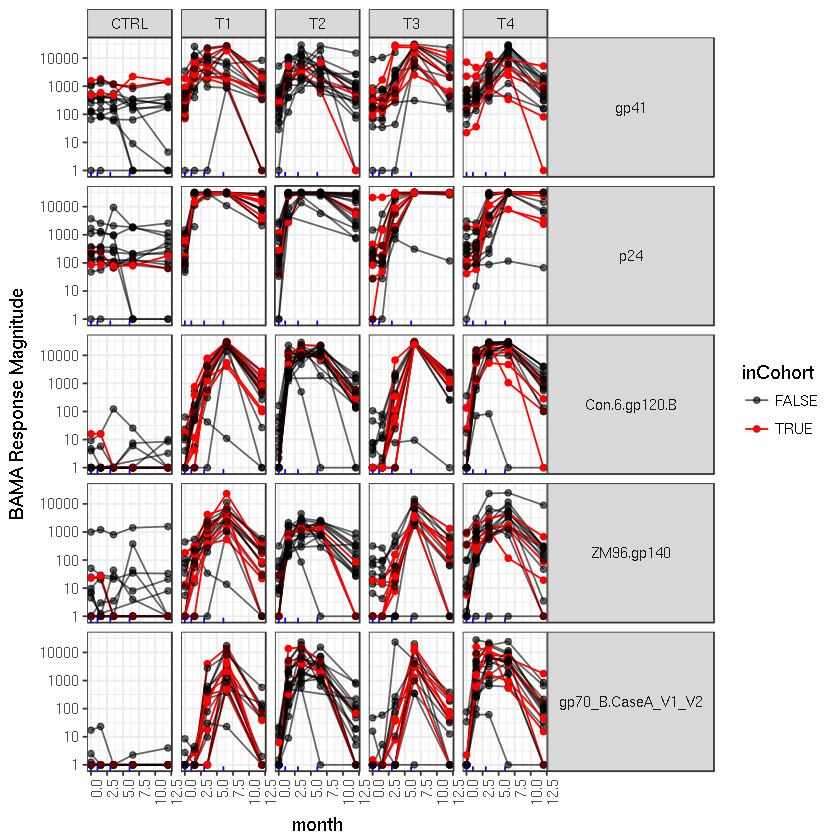

In [77]:
iggplot <- immune.data %>%
mutate(inCohort = pub_id %in% microbiomeCohort) %>%
filter(type == 'IgG', antigen %in% c(ants1, ants2)) %>%
mutate(antigen = factor(antigen, levels = c(ants2, ants1))) %>% # reorder facets
ggplot(aes(x = month, y =mag, group = pub_id, colour = inCohort, alpha = inCohort)) +
geom_line() +
geom_point() +
geom_rug(data = vac, aes(x = month), inherit.aes = F, color = 'blue') +
facet_grid(antigen ~ rx_code, labeller = label_wrap_gen()) +
theme_bw() +
theme(strip.text.y = element_text(angle = 0),
      axis.text.x = element_text(angle = 90, hjust = 1)) +
scale_y_log10(breaks = 10^(0:5)) +
scale_colour_manual(values = c("black", "red")) +
scale_alpha_manual(values = c(.6, 1)) + 
labs(y = "BAMA Response Magnitude")

iggplot

ggsave('figures/useiggsAllParticipants.png')
# To fix. Control groups don't show up in this version.

Saving 6.67 x 6.67 in image


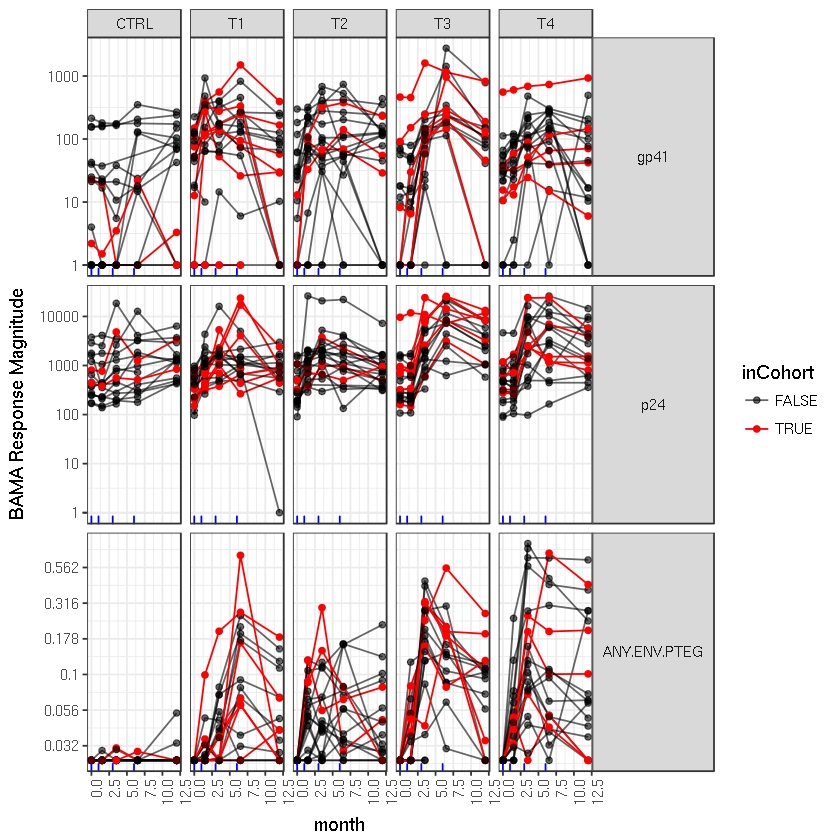

In [78]:
iggplot <- immune.data %>%
mutate(inCohort = pub_id %in% microbiomeCohort) %>%
filter(type %in% c('IgA', 'CD4+') & antigen %in% c(ants2, 'ANY.ENV.PTEG'))%>%
mutate(antigen = factor(antigen, levels = c(ants2, 'ANY.ENV.PTEG'))) %>% # reorder facets
ggplot(aes(x = month, y =mag, group = pub_id, colour = inCohort, alpha = inCohort)) +
geom_line() +
geom_point() +
geom_rug(data = vac, aes(x = month), inherit.aes = F, color = 'blue') +
facet_grid(antigen ~ rx_code, labeller = label_wrap_gen(), scales = 'free_y') +
theme_bw() +
theme(strip.text.y = element_text(angle = 0),
      axis.text.x = element_text(angle = 90, hjust = 1)) +
scale_y_log10(breaks = 10^c(
    seq(from = -2, to = 0, by = 0.25), seq(from = 0, to = 5, by = 1)
), labels = function(x) round(as.numeric(x), digits=3)) +
scale_colour_manual(values = c("black", "red")) +
scale_alpha_manual(values = c(.6, 1)) +
labs(y = "BAMA Response Magnitude")

iggplot

ggsave('figures/useIgACD4AllParticipants.png')
# To fix. Control groups don't show up in this version.

Saving 6.67 x 6.67 in image


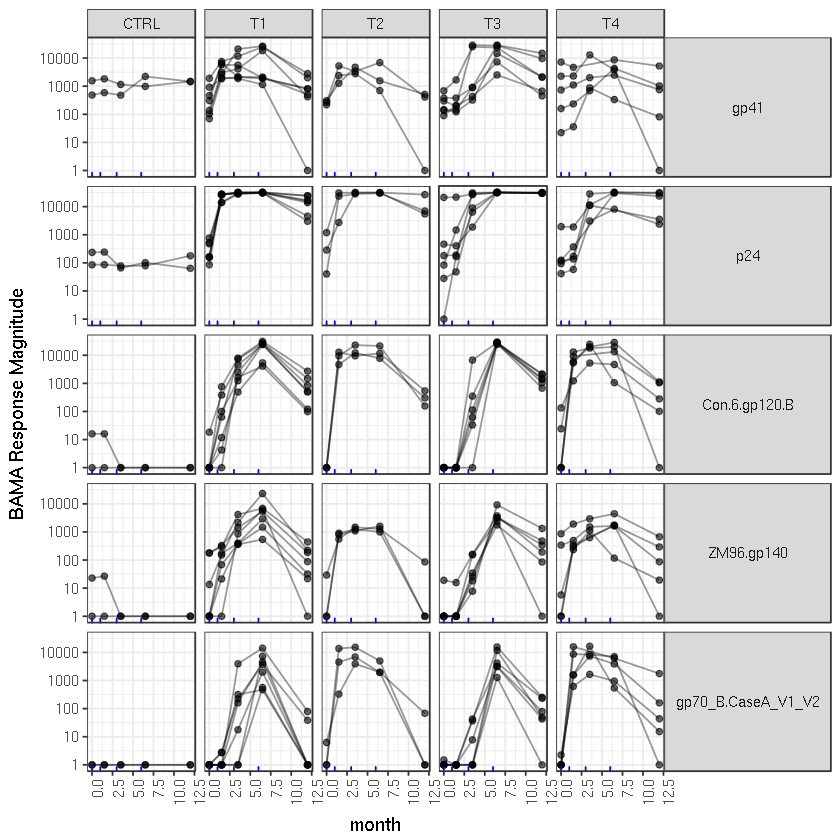

In [79]:
iggplot <- donor.immune %>% filter(type == 'IgG', antigen %in% c(ants1, ants2)) %>%
mutate(antigen = factor(antigen, levels = c(ants2, ants1))) %>% # reorder facets
ggplot(aes(x = month, y =mag, group = pub_id)) + geom_point(alpha = 0.6) + geom_line(alpha = 0.4) +
geom_rug(data = vac, aes(x = month), inherit.aes = F, color = 'blue') +
facet_grid(antigen ~ rx_code, labeller = label_wrap_gen()) +
theme_bw() + theme(strip.text.y = element_text(angle = 0), axis.text.x = element_text(angle = 90, hjust = 1)) +
scale_y_log10(breaks = 10^(0:5)) +
labs(y = "BAMA Response Magnitude")
iggplot
ggsave('figures/useiggs.png')
# To fix. Control groups don't show up in this version.

## Number of participants per group

### All participants

In [80]:
immune.data %>% 
group_by(rx_code) %>%
summarize(Unique_ids = n_distinct(pub_id))

rx_code,Unique_ids
CTRL,16
T1,20
T2,20
T3,20
T4,20


### Participants with microbiome data

In [81]:
donor.immune %>% 
group_by(rx_code) %>%
summarize(Unique_ids = n_distinct(pub_id))

rx_code,Unique_ids
CTRL,2
T1,7
T2,3
T3,6
T4,5


# Weighted Unifrac

In [82]:
psN2.wuf <- phyloseq::distance(psN2, method = "wunifrac")

In [83]:
psN2.pcoa <- capscale(psN2.wuf ~ 1)

In [84]:
# How much variance si explained by each weighted unifrac axis
# Note, ten axes cover 95% of the variance. 
# I'm not going to look beyond that for any test.
data.frame(eig = psN2.pcoa$CA$eig) %>%
rownames_to_column('axis') %>%
mutate(proportion = eig/sum(eig)) %>%
mutate(cumulative = cumsum(proportion))

axis,eig,proportion,cumulative
MDS1,0.837317681,0.2911225525,0.2911226
MDS2,0.494340264,0.1718745497,0.4629971
MDS3,0.374098625,0.1300683707,0.5930655
MDS4,0.273563056,0.0951136911,0.6881792
MDS5,0.260966349,0.0907340086,0.7789132
MDS6,0.164756392,0.0572832779,0.8361965
MDS7,0.144299295,0.0501706580,0.8863671
MDS8,0.094422652,0.0328293119,0.9191964
MDS9,0.058944717,0.0204941766,0.9396906
MDS10,0.050652188,0.0176109911,0.9573016


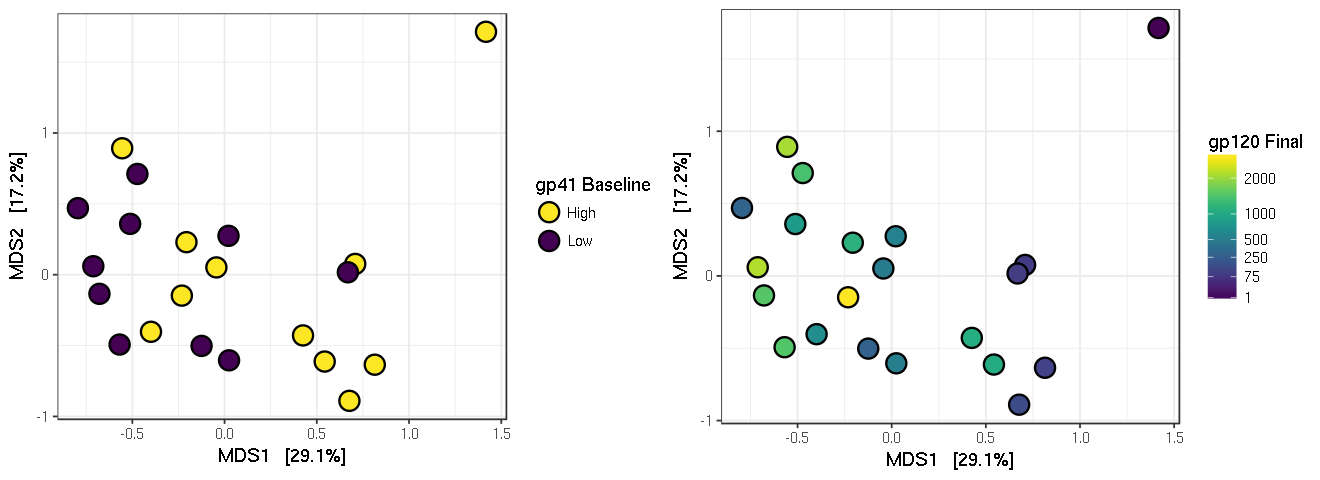

In [85]:
# Note the square-root scale for gp120
my_breaks = c(1, 75, 250, 500, 1000,2000)
wuford_gp41 <- plot_ordination(psN2 %>%
                           mutate_phyloseq_sample(
                               mc41 = factor(medcode_hl(IgG_gp41_Month_0)),
                                                log120 = (IgG_Con.6.gp120.B_Month_6.5)),
                 psN2.pcoa) + coord_fixed(sqrt(psN2.pcoa$CA$eig[2]/psN2.pcoa$CA$eig[1])) +
geom_point(aes(fill = mc41), size = 5, stroke = 1, shape = 21) + 
#scale_shape_manual(name = 'Sex', values = c(21, 24)) +
 viridis::scale_fill_viridis(name = 'gp41 Baseline', direction =-1, discrete = TRUE) +
#scale_fill_manual(name = 'gp41 Primary', values = c('orange', 'blue')) + 
theme_bw()

# Note the square-root scale for gp120

my_breaks = c(1, 75, 250, 500, 1000,2000)
wuford_gp120 <- plot_ordination(psN2 %>%
                           mutate_phyloseq_sample(
                               mc41 = factor(medcode_hl(IgG_gp41_Month_0)),
                                                log120 = (IgG_Con.6.gp120.B_Month_12)),
                 psN2.pcoa) + coord_fixed(sqrt(psN2.pcoa$CA$eig[2]/psN2.pcoa$CA$eig[1])) +
geom_point(aes(fill = log120), size = 5, stroke = 1, shape = 21) + 
viridis::scale_fill_viridis(name = 'gp120 Final', direction = 1, trans = "sqrt",
                           breaks = my_breaks, labels = my_breaks) +
#scale_colour_manual(name = 'gp41 Primary', values = c('black', 'grey70')) + 
theme_bw()

par <- options()
options(repr.plot.width=11, repr.plot.height= 4)
g <- grid.arrange(wuford_gp41, wuford_gp120, ncol = 2)
#g
ggsave('figures/wunifrac_Agp41_Bgp120_pcoa.png', g, width = 8, height = 4)

# Kernel Regression and Weighted Unifrac GLM

In [86]:
wufKN2 <- D2K(as.matrix(psN2.wuf))

In [87]:
muDoners <- unique(sample_data(psN2)$pub_id)

In [88]:
immune.data %>%
filter(pub_id %in% muDoners) %>%
filter(
    (type == 'IgG' & 
    antigen %in% ants1 &
    month %in% c(6.5,12)
    ) |
    (type %in% c('IgG', 'IgA') &
     antigen %in% ants2 &
     month %in% c(0,6.5,12)
    ) |
    type == 'CD4+' &
    antigen == 'ANY.ENV.PTEG' &
    month %in% c(6.5, 12)
      )-> use.immune
head(use.immune)

visitno,rx_code,type,antigen,mag,mag_bl,response,day,month,ct,response_j,assay,pub_id
9,T1,IgA,gp41,333.25,109.5,0,182,6.5,T,0.19882813,BAMA,282
12,T1,IgA,gp41,1.00,109.5,0,364,12.0,T,0.15338760,BAMA,282
9,T1,IgA,p24,658.00,329.8,0,182,6.5,T,-0.17841981,BAMA,282
12,T1,IgA,p24,862.20,329.8,0,364,12.0,T,-0.08504074,BAMA,282
9,T1,IgG,Con.6.gp120.B,27127.50,1.0,1,182,6.5,T,1.10518516,BAMA,282
12,T1,IgG,Con.6.gp120.B,1488.00,1.0,1,364,12.0,T,1.09794453,BAMA,282


In [89]:
# Do permanova and related tests to a variable of interest
# This function is pretty specific to this analysis, so I'm going to leave it
# here in the notebook file
CapVar <- function(x, nperm = 9999, transformation = medcode2, family = 'binomial'){
    ## Pull out the needed data
    
    psN2.wMDS <- psN2 %>% phylo_join(scores(psN2.pcoa, display = "sites", choices = 1:10) %>%
                    as.data.frame %>% rownames_to_column, by = 'rowname')
    
    medWuf <- NA
    rankWuf <- NA
    locPS <- phylo_join(psN2.wMDS, x, by = 'pub_id') 
    ydata0 <- sample_data(locPS)$mag
    yna <- is.na(ydata0)
    #loc.wuf <- wufKN2
    #loc.jsd <- jsdKN2
    ydata <- ydata0
    
    ydata <- ydata0[!yna]
    loc.wuf2 <- psN2.wuf %>% as.matrix %>% .[!yna, !yna]
    
    medWuf <- adonis(loc.wuf2 ~ transformation(ydata), permutations = nperm)
    #medWuf$aov.tab[1,c('R2', 'Pr(>F)')]
    
    ## Capscale returns the same results as adonis (permanova), but also gives some other interesting results
    
    medWufCap <- capscale(loc.wuf2 ~ transformation(ydata))
    capanova <- anova(medWufCap, permutations = nperm)
    
    samDf <- locPS %>% sample_data %>% as('data.frame') %>% rownames_to_column %>%
     left_join(
        vegan::scores(medWufCap, display = 'sites') %>% as.data.frame %>% dplyr::select(CAP1) %>%
        rownames_to_column, by = 'rowname') %>% .[!yna,]
    
#     # Is giving only positive results with CAP1, not sure why
#     glmAnova <- glm(medcode(ydata) ~  MDS1 + CAP1, data = samDf, family = 'binomial') %>% anova(test = "Chisq")
    loc_glm <- glm(transformation(ydata) ~  MDS1, data = samDf, family = family)
    glmAnova <- loc_glm %>% anova(test = "Chisq")
    #glmAnova['CAP1', 'Deviance']/out_capanova['NULL', 'Resid. Dev']
    
    ## check against mirkat
    loc.Kwuf2 <- wufKN2[!yna, !yna]
    mirkatP <- MiRKAT(y = transformation(ydata), Ks = loc.Kwuf2, out_type = "C", method = 'permutation', nperm = nperm)
    
    #list(medWuf, capanova, mirkatP)
    
    pred_pct <- predict(loc_glm, type = "response")
    pred_01 <- as.numeric(predict(loc_glm, type = "response") > 0.5)
    
    accuracy <- mean(transformation(ydata) == pred_01)
    
        null_glm <- update(loc_glm, ~1)

    # Canonical caluclation of McFadden's R2 for the GLM
    McFadden = 1- (logLik(loc_glm)/ logLik(null_glm))
    
    # A GLM of all weighted unifrac components
    
    
    data.frame(
        caps.P = capanova['Model', 'Pr(>F)'],
        adonisP = medWuf$aov.tab[1, 'Pr(>F)'],
        mir.P = mirkatP,
        caps.F = capanova['Model', 'F'],
        caps.R2 = medWufCap$CCA$tot.chi/medWufCap$tot.chi, 
        wuf1.P = glmAnova['MDS1', 'Pr(>Chi)'],
        wuf1.DR = glmAnova['MDS1', 'Deviance'] / glmAnova['NULL', 'Resid. Dev'],
        wuf1.McFadden = McFadden,
        accuracy,
        wuf1.coef = coef(loc_glm)[2]
        #cap1.P = glmAnova['CAP1', 'Pr(>Chi)'],
        #cap1.R2 = glmAnova['CAP1', 'Deviance'] / glmAnova['NULL', 'Resid. Dev']
    )
    }
    

In [90]:
use.immune %>%
filter(type == 'IgG' & antigen == 'gp41'& month == 0 & ct == 'T') -> test.immune1

In [91]:
# Just confirming that the function works before it goes in a giant loop. I'd delete this,
# but i'll just end up needing it again if I do.
ptm = proc.time()
tps <- CapVar(test.immune1, nperm = 9999, transformation = medcode, family = 'binomial')
proc.time() - ptm
tps

   user  system elapsed 
  4.317   0.020   4.340 

,caps.P,adonisP,mir.P,caps.F,caps.R2,wuf1.P,wuf1.DR,wuf1.McFadden,accuracy,wuf1.coef
MDS1,0.0528,0.052,0.0445,1.843635,0.08845076,0.01454191,0.205444,0.205444,0.6666667,2.160527


In [92]:
use.immune %>%
filter(type == 'CD4+' & month == 6.5 & ct == 'T') -> test.immune.pteg

In [93]:
# Just confirming that the function works before it goes in a giant loop. I'd delete this,
# but i'll just end up needing it again if I do.
ptm = proc.time()
tps <- CapVar(test.immune.pteg, nperm = jnperm, transformation = medcode, family = 'binomial')
proc.time() - ptm
tps

   user  system elapsed 
  3.918   0.000   3.920 

,caps.P,adonisP,mir.P,caps.F,caps.R2,wuf1.P,wuf1.DR,wuf1.McFadden,accuracy,wuf1.coef
MDS1,0.2462,0.2481,0.2441,1.231637,0.06087679,0.1995347,0.05662489,0.05662489,0.5714286,-0.9754128


In [94]:
# Run above function against every relevant variable.
ptm <- proc.time()

use.immune %>% 
filter(ct == 'T') %>%
group_by(type, antigen, month) %>%
do(data.frame(CapVar(., nperm = jnperm))) -> permKernTable
permKernTable

proc.time() - ptm

type,antigen,month,caps.P,adonisP,mir.P,caps.F,caps.R2,wuf1.P,wuf1.DR,wuf1.McFadden,accuracy,wuf1.coef
CD4+,ANY.ENV.PTEG,6.5,0.2405,0.2429,0.2520,1.2316372,0.06087679,0.199534718,0.0566248928,0.0566248928,0.5714286,-0.9754128
CD4+,ANY.ENV.PTEG,12.0,0.2581,0.2565,0.2487,1.2255316,0.06374501,0.210899019,0.0564542507,0.0564542507,0.6000000,-0.9532295
IgA,gp41,0.0,0.9489,0.9501,0.9594,0.4489014,0.02308107,0.655882911,0.0068318094,0.0068318094,0.6190476,0.3273075
IgA,gp41,6.5,0.2284,0.2242,0.2297,1.2726945,0.06277875,0.152494741,0.0704334725,0.0704334725,0.5714286,-1.1000504
IgA,gp41,12.0,0.7546,0.7539,0.7582,0.6996390,0.03741457,0.871396691,0.0009452047,0.0009452047,0.4500000,-0.1201828
IgA,p24,0.0,0.9049,0.9078,0.9122,0.5215572,0.02671699,0.309636229,0.0355149830,0.0355149830,0.6190476,0.7662777
IgA,p24,6.5,0.9168,0.9189,0.9175,0.5064104,0.02596123,0.676523611,0.0059889311,0.0059889311,0.4761905,-0.3051297
IgA,p24,12.0,0.3732,0.3819,0.3726,1.0510126,0.05516833,0.378932251,0.0279220300,0.0279220300,0.6000000,-0.6676646
IgG,Con.6.gp120.B,6.5,0.0038,0.0036,0.0035,2.9388952,0.13395821,0.001617104,0.3420033673,0.3420033673,0.8571429,-3.1161660
IgG,Con.6.gp120.B,12.0,0.0334,0.0291,0.0315,2.0391949,0.09692362,0.009180327,0.2335286835,0.2335286835,0.7619048,-2.3083625


   user  system elapsed 
 67.606   0.060  67.668 

The above function runs several extra tests. Results as follows:

type antigen visitno - things we run over

caps.P - Capscale test asks whether if we rotate things a bit and then try to use the best axis to compare to the data. Its similar to the wuf1.P value, but with some rotation

adonisP - p-value for a permanova test. Similar to mirkat p-value. One key exception is that igg_gp41_Month_0 falls on different sides of the 0.05 threshold.

mir.P is the p value for the kernel regression test, as run in the MiRKAT package. 
(Zhao et al., 2015)

caps.F and caps R2 are the f and r squared values for the capscale test.

wuf.P - is the p value of a glm comparing weighted unifrac component one against variables of interest. This test appears to always be statistically significantly positive when the mirkat test is positve.

wuf1.DR - one way of calculating an R2 value from a glm. We devide the deviance by the residual deviance

wuf1.McFadden - is a McFadden's pseudo R^2. This turns out to be identical to the previous calculation.

accuracy - the fraction of the time that the glm predicts something falls above or below the median correctly. This turns out to not be super informative. Everything has around a 60% accuracy.

wuf1.coef - the coefficient of the glm model. The sign is relevant. Things with postive sign are associated with high values of weighted unifrac axis 1.

In [95]:
# Clean up so we just see the results of the kernel regression 
concisePermKernTable <- permKernTable %>% ungroup %>%
mutate(Kernel_Q = p2q(mir.P), MDS1_Q = p2q(wuf1.P)) %>%
dplyr::select(Type = type, Antigen = antigen,Month = month, Kernel_P = mir.P, Kernel_Q,
              MDS1_P = wuf1.P, MDS1_Q, GlmMDS1_R2 = wuf1.McFadden, MDS1_Coef = wuf1.coef) %>%
as.data.frame %>% 
pass -> concisePermKernTable
write.csv(format(concisePermKernTable, digits = 3), 'tables/concisePermkernTable.csv')

### Table 1

In [96]:
# export conditionally formatted table as html

colNames1 = c(' ' = 3, 'Kernel' = 2, 'MDS' = 4)
colNames2 = c('Type', 'Antigen', 'Month', 'P', 'Q', 'P', 'Q', 'R2', 'Coef' )

concisePermKernTable %>%
mutate(
    # this row needs to happen first, since the reformatting of the nother numbers makes them harder to call
    MDS1_Coef = cell_spec(format(MDS1_Coef, digits = 3), "html",
                           color = ifelse(MDS1_P < 0.05, 
                                         ifelse(MDS1_Coef < 0, 'red', 'blue'),
                                         'black')),
    Kernel_P = cell_spec(format_round(Kernel_P, 3), "html",
                                  bold = ifelse(Kernel_P < 0.05, T, F),
                                  background = ifelse(Kernel_P < 0.05, 'yellow', '')
                                 ),
    Kernel_Q = cell_spec(format_round(Kernel_Q, 3), "html",
                                  bold = ifelse(Kernel_Q < 0.2, T, F),
                                  background = ifelse(Kernel_Q < 0.2, 'lightyellow', '')
                                 ),
     MDS1_P  = cell_spec(format_round(MDS1_P, 3), "html",
                                  bold = ifelse(MDS1_P < 0.05, T, F),
                                  background = ifelse(MDS1_P < 0.05, 'yellow', '')
                                 ),
    MDS1_Q = cell_spec(format_round(MDS1_Q, 3), "html",
                                  bold = ifelse(MDS1_Q < 0.2, T, F),
                                  background = ifelse(MDS1_Q < 0.2, 'lightyellow', '')
                                 ),
    #Month = cell_spec(format_round(Month,0), "html")
    Month = cell_spec(Month, "html")

    
      ) %>%
mutate(Antigen = gsub('ANY.ENV.PTEG', 'Any ENV PTEG', Antigen)) %>%
mutate(Antigen = gsub('gp70_B.CaseA_V1_V2', 'gp70 B.CaseA V1-V2', Antigen)) -> toTable

toTable %>%

kable("html", escape = F, digits = 3, align = 'c', col.names = colNames2) %>%
kable_styling("striped", "hover", full_width = F) %>%
add_header_above(colNames1) %>%
collapse_rows(columns = 1:2, latex_hline = "full") -> concisePermKernTable.html

concisePermKernTable.html %>% 
as.character() %>%
display_html()

concisePermKernTable.html %>% cat(file = 'tables/concisePermkernTable.html')

Kernel 
 MDS 
 
 
 Type 
 Antigen 
 Month 
 P 
 Q 
 P 
 Q 
 R2 
 Coef 
 
 
 
 
 CD4+ 
 Any ENV PTEG 
 6.5 
 0.252 
 0.470 
 0.200 
 0.048 
 0.057 
 -0.975 
 
 
 
 
 12 
 0.249 
 0.470 
 0.211 
 0.048 
 0.056 
 -0.953 
 
 
 IgA 
 gp41 
 0 
 0.959 
 0.959 
 0.656 
 0.093 
 0.007 
 0.327 
 
 
 
 
 6.5 
 0.230 
 0.470 
 0.152 
 0.045 
 0.070 
 -1.100 
 
 
 
 
 12 
 0.758 
 0.948 
 0.871 
 0.108 
 0.001 
 -0.120 
 
 
 
 p24 
 0 
 0.912 
 0.959 
 0.310 
 0.064 
 0.036 
 0.766 
 
 
 
 
 6.5 
 0.918 
 0.959 
 0.677 
 0.093 
 0.006 
 -0.305 
 
 
 
 
 12 
 0.373 
 0.573 
 0.379 
 0.069 
 0.028 
 -0.668 
 
 
 IgG 
 Con.6.gp120.B 
 6.5 
 0.004 
 0.070 
 0.002 
 0.004 
 0.342 
 -3.116 
 
 
 
 
 12 
 0.032 
 0.161 
 0.009 
 0.007 
 0.234 
 -2.308 
 
 
 
 gp41 
 0 
 0.047 
 0.161 
 0.015 
 0.007 
 0.205 
 2.161 
 
 
 
 
 6.5 
 0.048 
 0.161 
 0.032 
 0.013 
 0.158 
 -1.770 
 
 
 
 
 12 
 0.656 
 0.874 
 0.806 
 0.105 
 0.002 
 -0.179 
 
 
 
 gp70 B.CaseA V1-V2 
 6.5 
 0.884 
 0.959 
 0.599 
 0.093 
 0.010 
 -0.385 
 
 
 
 
 12 
 0.033 
 0.161 
 0.014 
 0.007 
 0.209 
 -2.138 
 
 
 
 p24 
 0 
 0.199 
 0.470 
 0.420 
 0.070 
 0.022 
 -0.597 
 
 
 
 
 6.5 
 0.430 
 0.615 
 0.389 
 0.069 
 0.027 
 -0.752 
 
 
 
 
 12 
 0.278 
 0.470 
 0.153 
 0.045 
 0.070 
 -1.098 
 
 
 
 ZM96.gp140 
 6.5 
 0.015 
 0.152 
 0.009 
 0.007 
 0.235 
 -2.317 
 
 
 
 
 12 
 0.282 
 0.470 
 0.164 
 0.045 
 0.067 
 -1.067

Latex version of the same table

In [97]:

docHead <- "\\documentclass[12pt]{article} % use larger type; default would be 10pt

\\usepackage[utf8]{inputenc} % set input encoding (not needed with XeLaTeX)
\\usepackage{booktabs}
\\usepackage{longtable}
\\usepackage{array}
\\usepackage{multirow}
\\usepackage[table]{xcolor}
\\usepackage{wrapfig}
\\usepackage{float}
\\usepackage{colortbl}
\\usepackage{pdflscape}
\\usepackage{tabu}
\\usepackage{threeparttable}
\\usepackage{threeparttablex}
\\usepackage[normalem]{ulem}
\\usepackage{makecell}

\\definecolor{green}{rgb}{1, 1, .9}

\\begin{document}
"

docTail <- "\\end{document}
"

In [98]:
# Make latex table

concisePermKernTable %>%
mutate(
    # this row needs to happen first, since the reformatting of the nother numbers makes them harder to call
    MDS1_Coef = cell_spec(format(MDS1_Coef, digits = 3), "latex",
                           color = ifelse(MDS1_P < 0.05, 
                                         ifelse(MDS1_Coef < 0, 'red', 'blue'),
                                         'black')),
    Kernel_P = cell_spec(format_round(Kernel_P, 3), "latex",
                                  bold = ifelse(Kernel_P < 0.05, T, F),
                                  background = ifelse(Kernel_P < 0.05, 'yellow', 'white')
                                 ),
    Kernel_Q = cell_spec(format_round(Kernel_Q, 3), "latex",
                                  bold = ifelse(Kernel_Q < 0.2, T, F),
                                  background = ifelse(Kernel_Q < 0.2, 'green', 'white')
                                 ),
     MDS1_P  = cell_spec(format_round(MDS1_P, 3), "latex",
                                  bold = ifelse(MDS1_P < 0.05, T, F),
                                  background = ifelse(MDS1_P < 0.05, 'yellow', 'white')
                                 ),
    MDS1_Q = cell_spec(format_round(MDS1_Q, 3), "latex",
                                  bold = ifelse(MDS1_Q < 0.2, T, F),
                                  background = ifelse(MDS1_Q < 0.2, 'green', 'white')
                                 ),
    #Month = cell_spec(format_round(Month,0), "html")
    Month = cell_spec(Month, "latex")

    
      ) %>%
mutate(Antigen = gsub('ANY.ENV.PTEG', 'Any ENV PTEG', Antigen)) %>%
mutate(Antigen = gsub('gp70_B.CaseA_V1_V2', 'gp70 B.CaseA V1-V2', Antigen)) -> toTable

toTable %>% 
kable("latex", escape = F, digits = 3, align = 'c', col.names = colNames2, booktabs = T) %>%
kable_styling(position = "left") %>%

add_header_above(colNames1) %>%
collapse_rows(columns = 1:2, latex_hline = "full") %>%
pass -> concisePermKernTable.tex

In [99]:
# Print latex table to tex file

cat(docHead, concisePermKernTable.tex, docTail, file = 'tables/concisePermkernTable1.tex')

In [100]:
concisePermKernTable %>% filter(Kernel_P < 0.05) -> shortPermkernTable
shortPermkernTable
write.csv(format(shortPermkernTable, digits = 3), 'tables/shortPermkernTable.csv')

Type,Antigen,Month,Kernel_P,Kernel_Q,MDS1_P,MDS1_Q,GlmMDS1_R2,MDS1_Coef
IgG,Con.6.gp120.B,6.5,0.0035,0.0700000,0.001617104,0.004019906,0.3420034,-3.116166
IgG,Con.6.gp120.B,12.0,0.0315,0.1613333,0.009180327,0.007229850,0.2335287,-2.308363
IgG,gp41,0.0,0.0466,0.1613333,0.014541910,0.007229850,0.2054440,2.160527
IgG,gp41,6.5,0.0484,0.1613333,0.032371397,0.013411829,0.1575363,-1.770284
IgG,gp70_B.CaseA_V1_V2,12.0,0.0332,0.1613333,0.013611862,0.007229850,0.2094579,-2.138000
IgG,ZM96.gp140,6.5,0.0152,0.1520000,0.008994987,0.007229850,0.2347817,-2.317269


## As above, but this time with gaussian - continuous dependent variables

In [101]:
ptm = proc.time()
tps <- CapVar(test.immune1, nperm = 999, transformation = function(x){jac_box_cox(x)}, family = 'gaussian')
proc.time() - ptm
tps

   user  system elapsed 
  0.624   0.004   0.629 

,caps.P,adonisP,mir.P,caps.F,caps.R2,wuf1.P,wuf1.DR,wuf1.McFadden,accuracy,wuf1.coef
MDS1,0.255,0.232,0.228,1.26187,0.06227805,0.03957279,0.1823071,0.06051405,0,0.9093061


In [102]:
# Run above function against every relevant variable.
ptm <- proc.time()

use.immune %>%
filter(ct == 'T') %>%
group_by(type, antigen, month) %>%
do(data.frame(CapVar(., nperm = jnperm,
                     transformation = function(x){jac_box_cox(x)},
                     family = 'gaussian'))) -> permKernTableGaus
permKernTableGaus

proc.time() - ptm

type,antigen,month,caps.P,adonisP,mir.P,caps.F,caps.R2,wuf1.P,wuf1.DR,wuf1.McFadden,accuracy,wuf1.coef
CD4+,ANY.ENV.PTEG,6.5,0.6007,0.6030,0.6029,0.8212809,0.04143430,5.792023e-01,0.015927778,0.0058914665,0.00000000,-1.990440e-01
CD4+,ANY.ENV.PTEG,12.0,0.1983,0.2020,0.1910,1.3330405,0.06895142,3.044964e-01,0.055336185,0.0212048318,0.00000000,-3.547800e-01
IgA,gp41,0.0,0.9908,0.9892,0.9888,0.2956250,0.01532083,6.289317e-01,0.012140901,0.0028124048,0.00000000,3.902553e-01
IgA,gp41,6.5,0.4545,0.4432,0.4516,0.9591736,0.04805678,6.287404e-01,0.012154285,0.0032169140,0.00000000,-2.977883e-01
IgA,gp41,12.0,0.6428,0.6444,0.6447,0.7582985,0.04042469,4.888847e-01,0.025920264,0.0065516637,0.00000000,4.795132e-01
IgA,p24,0.0,0.9559,0.9568,0.9586,0.3928376,0.02025684,4.292118e-01,0.031844923,-0.0084175149,0.00000000,1.053733e-02
IgA,p24,6.5,0.9768,0.9764,0.9782,0.3594980,0.01856959,8.824867e-01,0.001148681,0.0003173815,0.00000000,-8.366452e-02
IgA,p24,12.0,0.5658,0.5584,0.5632,0.8668668,0.04594651,3.106650e-01,0.054018011,0.0186198457,0.00000000,-4.144213e-01
IgG,Con.6.gp120.B,6.5,0.0571,0.0615,0.0602,1.8162378,0.08725101,2.802032e-02,0.202579164,0.0106770422,0.00000000,-7.299531e+03
IgG,Con.6.gp120.B,12.0,0.0005,0.0004,0.0005,3.6945126,0.16279321,1.182113e-05,0.502512860,0.0741095712,0.00000000,-3.179778e+01


   user  system elapsed 
 71.759   0.124  71.918 

In [103]:
# Clean up so we just see the results of the kernel regression 
concisePermKernTable <- permKernTableGaus %>% ungroup %>%
mutate(Kernel_Q = p2q(mir.P), MDS1_Q = p2q(wuf1.P)) %>%
dplyr::select(Type = type, Antigen = antigen, Month = month, Kernel_P = mir.P, Kernel_Q,
              MDS1_P = wuf1.P, MDS1_Q, MDS1_R2 = wuf1.McFadden, MDS1_Coef = wuf1.coef) %>%
as.data.frame %>% 
pass -> concisePermKernTableGaus

concisePermKernTableGaus

write.csv(format(concisePermKernTableGaus, digits = 3), 'tables/concisePermkernTableGaus.csv')

Type,Antigen,Month,Kernel_P,Kernel_Q,MDS1_P,MDS1_Q,MDS1_R2,MDS1_Coef
CD4+,ANY.ENV.PTEG,6.5,0.6029,0.8038667,5.792023e-01,2.253508e-01,0.0058914665,-1.990440e-01
CD4+,ANY.ENV.PTEG,12.0,0.1910,0.4977778,3.044964e-01,1.541264e-01,0.0212048318,-3.547800e-01
IgA,gp41,0.0,0.9888,0.9888000,6.289317e-01,2.253508e-01,0.0028124048,3.902553e-01
IgA,gp41,6.5,0.4516,0.6947692,6.287404e-01,2.253508e-01,0.0032169140,-2.977883e-01
IgA,gp41,12.0,0.6447,0.8058750,4.888847e-01,2.102051e-01,0.0065516637,4.795132e-01
IgA,p24,0.0,0.9586,0.9888000,4.292118e-01,1.977296e-01,-0.0084175149,1.053733e-02
IgA,p24,6.5,0.9782,0.9888000,8.824867e-01,2.965122e-01,0.0003173815,-8.366452e-02
IgA,p24,12.0,0.5632,0.8038667,3.106650e-01,1.541264e-01,0.0186198457,-4.144213e-01
IgG,Con.6.gp120.B,6.5,0.0602,0.3010000,2.802032e-02,6.023930e-02,0.0106770422,-7.299531e+03
IgG,Con.6.gp120.B,12.0,0.0005,0.0100000,1.182113e-05,7.624075e-05,0.0741095712,-3.179778e+01


### Table S1

In [104]:
# export conditionally formatted table as html
concisePermKernTableGaus %>%
mutate(
    # this row needs to happen first, since the reformatting of the nother numbers makes them harder to call
    MDS1_Coef = cell_spec(format(MDS1_Coef, digits = 3), "html",
                           color = ifelse(MDS1_P < 0.05, 
                                         ifelse(MDS1_Coef < 0, 'red', 'blue'),
                                         'black')),
    Kernel_P = cell_spec(format_round(Kernel_P, 3), "html",
                                  bold = ifelse(Kernel_P < 0.05, T, F),
                                  background = ifelse(Kernel_P < 0.05, 'yellow', '')
                                 ),
    Kernel_Q = cell_spec(format_round(Kernel_Q, 3), "html",
                                  bold = ifelse(Kernel_Q < 0.2, T, F),
                                  background = ifelse(Kernel_Q < 0.2, 'lightyellow', '')
                                 ),
     MDS1_P  = cell_spec(format_round(MDS1_P, 3), "html",
                                  bold = ifelse(MDS1_P < 0.05, T, F),
                                  background = ifelse(MDS1_P < 0.05, 'yellow', '')
                                 ),
    MDS1_Q = cell_spec(format_round(MDS1_Q, 3), "html",
                                  bold = ifelse(MDS1_Q < 0.2, T, F),
                                  background = ifelse(MDS1_Q < 0.2, 'lightyellow', '')
                                 ),
    Month = cell_spec(Month, "html")

    
      ) %>%
kable("html", escape = F, digits = 3, align = 'c') %>%
as.character() -> concisePermKernTableGaus.html

concisePermKernTableGaus.html %>% 
display_html() %>%
cat(file = 'tables/concisePermkernTableGaus.html')

Type,Antigen,Month,Kernel_P,Kernel_Q,MDS1_P,MDS1_Q,MDS1_R2,MDS1_Coef
CD4+,ANY.ENV.PTEG,6.5,0.603,0.804,0.579,0.225,0.006,-1.99e-01
CD4+,ANY.ENV.PTEG,12,0.191,0.498,0.304,0.154,0.021,-3.55e-01
IgA,gp41,0,0.989,0.989,0.629,0.225,0.003,3.90e-01
IgA,gp41,6.5,0.452,0.695,0.629,0.225,0.003,-2.98e-01
IgA,gp41,12,0.645,0.806,0.489,0.210,0.007,4.80e-01
IgA,p24,0,0.959,0.989,0.429,0.198,-0.008,1.05e-02
IgA,p24,6.5,0.978,0.989,0.882,0.297,0.000,-8.37e-02
IgA,p24,12,0.563,0.804,0.311,0.154,0.019,-4.14e-01
IgG,Con.6.gp120.B,6.5,0.060,0.301,0.028,0.060,0.011,-7.30e+03
IgG,Con.6.gp120.B,12,0.000,0.010,0.000,0.000,0.074,-3.18e+01


In [105]:
concisePermKernTableGaus %>% filter(Kernel_P < 0.05) -> shortPermkernTableGaus
shortPermkernTableGaus
write.csv(format(shortPermkernTableGaus, digits = 3), 'tables/shortPermkernTable.csv')

Type,Antigen,Month,Kernel_P,Kernel_Q,MDS1_P,MDS1_Q,MDS1_R2,MDS1_Coef
IgG,Con.6.gp120.B,12.0,0.0005,0.0100000,1.182113e-05,7.624075e-05,0.0741095712,-3.179778e+01
IgG,p24,6.5,0.0305,0.2033333,5.692922e-02,6.413855e-02,0.0009790688,-9.309477e+39
IgG,ZM96.gp140,6.5,0.0286,0.2033333,1.783694e-02,5.751993e-02,0.0873953957,-8.474126e-01


In [106]:
# Make latex table

concisePermKernTableGaus %>%
mutate(
    # this row needs to happen first, since the reformatting of the nother numbers makes them harder to call
    MDS1_Coef = cell_spec(format(MDS1_Coef, digits = 3), "latex",
                           color = ifelse(MDS1_P < 0.05, 
                                         ifelse(MDS1_Coef < 0, 'red', 'blue'),
                                         'black')),
    Kernel_P = cell_spec(format_round(Kernel_P, 3), "latex",
                                  bold = ifelse(Kernel_P < 0.05, T, F),
                                  background = ifelse(Kernel_P < 0.05, 'yellow', 'white')
                                 ),
    Kernel_Q = cell_spec(format_round(Kernel_Q, 3), "latex",
                                  bold = ifelse(Kernel_Q < 0.2, T, F),
                                  background = ifelse(Kernel_Q < 0.2, 'green', 'white')
                                 ),
     MDS1_P  = cell_spec(format_round(MDS1_P, 3), "latex",
                                  bold = ifelse(MDS1_P < 0.05, T, F),
                                  background = ifelse(MDS1_P < 0.05, 'yellow', 'white')
                                 ),
    MDS1_Q = cell_spec(format_round(MDS1_Q, 3), "latex",
                                  bold = ifelse(MDS1_Q < 0.2, T, F),
                                  background = ifelse(MDS1_Q < 0.2, 'green', 'white')
                                 ),
    #Month = cell_spec(format_round(Month,0), "html")
    Month = cell_spec(Month, "latex")

    
      ) %>%
mutate(Antigen = gsub('ANY.ENV.PTEG', 'Any ENV PTEG', Antigen)) %>%
mutate(Antigen = gsub('gp70_B.CaseA_V1_V2', 'gp70 B.CaseA V1-V2', Antigen)) -> toTable

toTable %>% 
kable("latex", escape = F, digits = 3, align = 'c', col.names = colNames2, booktabs = T) %>%
kable_styling(position = "left") %>%

add_header_above(colNames1) %>%
collapse_rows(columns = 1:2, latex_hline = "full") %>%
pass -> concisePermKernTableGaus.tex

In [107]:
# Print latex table to tex file

cat(docHead, concisePermKernTableGaus.tex, docTail, file = 'tables/concisePermkernTableGaus.tex')

## Chi Squared test for statistical associations between each pair of immune variables

In [108]:
use.immune %>% dplyr::select(pub_id, visitno, type, antigen, mag) -> tmp
full_join(tmp, tmp, by = 'pub_id') %>% 
group_by(visitno.x, type.x, antigen.x, visitno.y, type.y, antigen.y) %>%
nest %>%
mutate(x2 = map(data, function(df){unwarn(chisq.test(df$mag.x, df$mag.y))})) %>%
mutate(glance = map(x2, glance)) %>%
dplyr::select(-data, -x2) %>%
unnest(glance) %>%
#mutate(q.value = p2q(p.value)) %>% # reurns NaNs
pass -> compareImmuneX2

In [109]:
compareImmuneX2 %>% filter(
    type.x == 'IgG' &
    antigen.x == 'gp41' &
    type.y == 'IgG' &
    antigen.y == 'gp41'
)

visitno.x,type.x,antigen.x,visitno.y,type.y,antigen.y,statistic,p.value,parameter,method
9,IgG,gp41,9,IgG,gp41,420,0.23603033,400,Pearson's Chi-squared test
9,IgG,gp41,12,IgG,gp41,378,0.24676604,360,Pearson's Chi-squared test
9,IgG,gp41,2,IgG,gp41,420,0.23603033,400,Pearson's Chi-squared test
12,IgG,gp41,9,IgG,gp41,378,0.24676604,360,Pearson's Chi-squared test
12,IgG,gp41,12,IgG,gp41,378,0.02069535,324,Pearson's Chi-squared test
12,IgG,gp41,2,IgG,gp41,378,0.24676604,360,Pearson's Chi-squared test
2,IgG,gp41,9,IgG,gp41,420,0.23603033,400,Pearson's Chi-squared test
2,IgG,gp41,12,IgG,gp41,378,0.24676604,360,Pearson's Chi-squared test
2,IgG,gp41,2,IgG,gp41,420,0.23603033,400,Pearson's Chi-squared test


In [110]:
compareImmuneX2 %>%
filter(type.x == 'IgG' & type.y == 'IgG' & antigen.x != antigen.y) %>%
write_csv('tables/chisq_IgG_comparasons.csv')

# MDS GLM for each other MDS Axis

In [111]:
psN2 %>% phylo_join(scores(psN2.pcoa, display = "sites", choices = 1:10) %>%
                    as.data.frame %>% rownames_to_column, by = 'rowname') %>%
sample_data %>% as('data.frame') %>% rownames_to_column -> hereSam


In [112]:
data_frame(formula = paste("transformation(ydata) ~ MDS", 1:10, sep = ""))

formula
transformation(ydata) ~ MDS1
transformation(ydata) ~ MDS2
transformation(ydata) ~ MDS3
transformation(ydata) ~ MDS4
transformation(ydata) ~ MDS5
transformation(ydata) ~ MDS6
transformation(ydata) ~ MDS7
transformation(ydata) ~ MDS8
transformation(ydata) ~ MDS9
transformation(ydata) ~ MDS10


In [113]:
EachMDS <- function(x, nperm = 9999, transformation = medcode2, family = 'binomial'){
    ## Pull out the needed data
    
    psN2.wMDS <- psN2 %>% phylo_join(scores(psN2.pcoa, display = "sites", choices = 1:10) %>%
                    as.data.frame %>% rownames_to_column, by = 'rowname')
    
#     medWuf <- NA
#     rankWuf <- NA
    locPS <- phylo_join(psN2.wMDS, x, by = 'pub_id') 
    ydata0 <- sample_data(locPS)$mag
    yna <- is.na(ydata0)
    #loc.wuf <- wufKN2
    #loc.jsd <- jsdKN2
    ydata <- ydata0
    
    ydata <- ydata0[!yna]
    loc.wuf2 <- psN2.wuf %>% as.matrix %>% .[!yna, !yna]
    
     samDf <- locPS %>% sample_data %>% as('data.frame') %>% rownames_to_column %>%
    .[!yna,]

#     # Is giving only positive results with CAP1, not sure why
    loc_glm <- glm(as.formula("transformation(ydata) ~  MDS1"), data = samDf, family = family)
    glmAnova <- loc_glm %>% anova(test = "Chisq")
    
    # data_frame, rather than data.frame
    # https://stackoverflow.com/questions/48450308/iterating-over-formulas-in-purrr#48450308
    data_frame(formulaString = paste("transformation(ydata) ~ MDS", 1:10, sep = "")) %>%
     mutate(model = map(formulaString, function(fs){
         glm(as.formula(fs), data = samDf, family = family)})) %>%
    mutate(anova = map(model, anova)) %>%
    mutate(glance = map(model, glance)) %>%
    mutate(tidy = map(model, tidy)) %>%
    mutate(coef = map(model, ~ coef(summary(.))[2,])) %>%
    pass -> allmodels

    allmodels %>% dplyr::select("tidy") %>% unnest %>% filter(term != '(Intercept)')
    
 
    }
    

In [114]:
# Just confirming that the function works before it goes in a giant loop. I'd delete this,
# but i'll just end up needing it again if I do.
ptm = proc.time()
tps <- EachMDS(test.immune.pteg, nperm = 9999, transformation = medcode, family = 'binomial')
proc.time() - ptm

   user  system elapsed 
  0.426   0.000   0.426 

In [115]:
tps

term,estimate,std.error,statistic,p.value
MDS1,-0.9754128,0.7940833,-1.2283508,0.21931532
MDS2,0.3728636,0.7506141,0.4967448,0.61936906
MDS3,0.2332130,0.7318023,0.3186830,0.74996690
MDS4,-0.9790495,0.8155394,-1.2004932,0.22994785
MDS5,-1.4140374,0.9575616,-1.4767064,0.13975435
MDS6,1.6148495,0.9477460,1.7038843,0.08840271
MDS7,-0.4174758,0.7425212,-0.5622410,0.57395186
MDS8,1.7644362,1.0613061,1.6625140,0.09640976
MDS9,0.3521472,0.7404089,0.4756118,0.63435096
MDS10,0.8569519,0.8016224,1.0690219,0.28505979


In [116]:
use.immune %>%
group_by(type, antigen, month) %>%
nest %>%
mutate(coefs = map(data, ~ EachMDS(.))) %>%
dplyr::select(-data) %>% unnest(coefs) -> glmMDScoefs

In [117]:
ants1

[1] "Con.6.gp120.B"      "ZM96.gp140"         "gp70_B.CaseA_V1_V2"

In [118]:
glmMDScoefs %>%
gather(key = "key", value = "value", estimate:p.value) %>%
filter(key == "p.value") %>%
spread(key = term, value = value) %>%
dplyr::select(-key, -MDS10, MDS10) %>%
dplyr::rename(Type = type, Antigen = antigen, Month = month) %>%
mutate(Type = factor(Type, levels = c( "IgA", "IgG",  "CD4+"))) %>%
mutate(Antigen = factor(Antigen, levels = c(ants1, ants2, "ANY.ENV.PTEG"))) %>%
#Clean up labels
mutate(Antigen = stringr::str_replace_all(Antigen, "_", " ")) %>%
mutate(Antigen = stringr::str_replace_all(Antigen, "V1 V2", "V1-V2")) %>%
mutate(Antigen = stringr::str_replace_all(Antigen, "ANY.ENV.PTEG", "Any ENV PTEG")) %>%
arrange(Type) -> allMDS
allMDS

Type,Antigen,Month,MDS1,MDS2,MDS3,MDS4,MDS5,MDS6,MDS7,MDS8,MDS9,MDS10
IgA,gp41,0.0,0.65799433,0.5790607,0.4028779,0.8287783,0.70014966,0.65603300,0.20962299,0.43176401,0.04094774,0.84043068
IgA,gp41,6.5,0.17530332,0.3706277,0.7550858,0.5557380,0.12195706,0.19556122,0.42787602,0.37736584,0.90540480,0.93455992
IgA,gp41,12.0,0.87149360,0.2074865,0.4396120,0.3898685,0.81880133,0.75058308,0.61014154,0.11060043,0.10374374,0.16571849
IgA,p24,0.0,0.32472834,0.6900251,0.5699739,0.9520226,0.80647855,0.57120306,0.14077469,0.94004121,0.98051559,0.53072087
IgA,p24,6.5,0.67776125,0.2970636,0.6774744,0.3099132,0.63984334,0.62236668,0.93368348,0.21445005,0.89139811,0.34050424
IgA,p24,12.0,0.38953887,0.6829873,0.2588043,0.4465560,0.07901722,0.50064633,0.60754361,0.15567648,0.63011279,0.12866937
IgG,Con.6.gp120.B,6.5,0.01709165,0.6154469,0.3662748,0.6901515,0.32770209,0.49290032,0.85893782,0.68520295,0.72403914,0.20771686
IgG,Con.6.gp120.B,12.0,0.02980683,0.9821928,0.3502959,0.6741181,0.96472069,0.55854358,0.51249217,0.36222538,0.75314678,0.25977120
IgG,gp41,0.0,0.03961043,0.9101803,0.3689531,0.8099772,0.37454614,0.20949907,0.58838804,0.63131045,0.87321384,0.44972892
IgG,gp41,6.5,0.05803785,0.2655950,0.2681110,0.9179972,0.71447311,0.14393687,0.66999931,0.41701372,0.17862407,0.66594016


### Table S2

In [119]:
allMDS %>%
kable("html", escape = F, digits = 3, align = 'c') %>%
collapse_rows(columns = 1:2, latex_hline = "full") %>%
as.character() -> allMDS.html

allMDS.html %>% 
display_html()

allMDS.html %>% cat(file = 'tables/allMDS.html')

Type 
 Antigen 
 Month 
 MDS1 
 MDS2 
 MDS3 
 MDS4 
 MDS5 
 MDS6 
 MDS7 
 MDS8 
 MDS9 
 MDS10 
 
 
 
 
 IgA 
 gp41 
 0.0 
 0.658 
 0.579 
 0.403 
 0.829 
 0.700 
 0.656 
 0.210 
 0.432 
 0.041 
 0.840 
 
 
 
 
 6.5 
 0.175 
 0.371 
 0.755 
 0.556 
 0.122 
 0.196 
 0.428 
 0.377 
 0.905 
 0.935 
 
 
 
 
 12.0 
 0.871 
 0.207 
 0.440 
 0.390 
 0.819 
 0.751 
 0.610 
 0.111 
 0.104 
 0.166 
 
 
 
 p24 
 0.0 
 0.325 
 0.690 
 0.570 
 0.952 
 0.806 
 0.571 
 0.141 
 0.940 
 0.981 
 0.531 
 
 
 
 
 6.5 
 0.678 
 0.297 
 0.677 
 0.310 
 0.640 
 0.622 
 0.934 
 0.214 
 0.891 
 0.341 
 
 
 
 
 12.0 
 0.390 
 0.683 
 0.259 
 0.447 
 0.079 
 0.501 
 0.608 
 0.156 
 0.630 
 0.129 
 
 
 IgG 
 Con.6.gp120.B 
 6.5 
 0.017 
 0.615 
 0.366 
 0.690 
 0.328 
 0.493 
 0.859 
 0.685 
 0.724 
 0.208 
 
 
 
 
 12.0 
 0.030 
 0.982 
 0.350 
 0.674 
 0.965 
 0.559 
 0.512 
 0.362 
 0.753 
 0.260 
 
 
 
 gp41 
 0.0 
 0.040 
 0.910 
 0.369 
 0.810 
 0.375 
 0.209 
 0.588 
 0.631 
 0.873 
 0.450 
 
 
 
 
 6.5 
 0.058 
 0.266 
 0.268 
 0.918 
 0.714 
 0.144 
 0.670 
 0.417 
 0.179 
 0.666 
 
 
 
 
 12.0 
 0.806 
 0.328 
 0.412 
 0.189 
 0.961 
 0.261 
 0.747 
 0.051 
 0.424 
 0.050 
 
 
 
 gp70 B.CaseA V1-V2 
 6.5 
 0.602 
 0.890 
 0.289 
 0.592 
 0.397 
 0.603 
 0.422 
 0.164 
 0.042 
 0.965 
 
 
 
 
 12.0 
 0.036 
 0.698 
 0.729 
 0.631 
 0.216 
 0.307 
 0.964 
 0.179 
 0.440 
 0.229 
 
 
 
 p24 
 0.0 
 0.428 
 0.238 
 0.925 
 0.182 
 0.070 
 0.060 
 0.664 
 0.616 
 0.479 
 0.401 
 
 
 
 
 6.5 
 0.397 
 0.857 
 0.271 
 0.351 
 0.429 
 0.096 
 0.174 
 0.726 
 0.396 
 0.078 
 
 
 
 
 12.0 
 0.176 
 0.735 
 0.247 
 0.680 
 0.856 
 0.373 
 0.035 
 0.520 
 0.735 
 0.121 
 
 
 
 ZM96.gp140 
 6.5 
 0.030 
 0.563 
 0.217 
 0.964 
 0.203 
 0.923 
 0.878 
 0.864 
 0.100 
 0.408 
 
 
 
 
 12.0 
 0.186 
 0.330 
 0.304 
 0.734 
 0.757 
 0.354 
 0.558 
 0.363 
 0.020 
 0.126 
 
 
 CD4+ 
 Any ENV PTEG 
 6.5 
 0.219 
 0.619 
 0.750 
 0.230 
 0.140 
 0.088 
 0.574 
 0.096 
 0.634 
 0.285 
 
 
 
 
 12.0 
 0.231 
 0.608 
 0.491 
 0.266 
 0.061 
 0.922 
 0.658 
 0.154 
 0.774 
 0.686

In [120]:
allMDS %>%
kable("latex", escape = F, digits = 3, align = 'c', booktabs = T) %>%
collapse_rows(columns = 1:2, latex_hline = "full") %>%
pass -> allMDS.latex


allMDS.latex %>% cat(file = 'tables/allMDS.tex')

In [121]:
# Print latex table to tex file
cat(docHead, allMDS.latex, docTail, file = 'tables/allMDS.tex')

In [122]:
write_csv(allMDS, 'tables/allMDSGlmPValues.csv')

# Jensen Shannon Kernel Regression
at each taxonomic level

## Kenel Regression

In [123]:
MirMulti <- function(x, KsDf = psDf, ps = psN2, nperm = 9999){
    
    Ks = KsDf$kjsd
    
    # I  bind to the phyloseq object and then peel off again later to guerentee
    # that the y-data is in the same order as the Ks
    locPS <- phylo_join(ps, x, by = 'pub_id')
    
    ydata0 <- sample_data(locPS)$mag
    yna <- is.na(ydata0)

    ydata <- ydata0[!yna]
    loc.Ks <- lapply(Ks, function(K){K[!yna, !yna]})  
  
    bcxJSD <- MiRKAT(y = jac_box_cox(ydata), Ks = loc.Ks, out_type = "C", method = 'permutation', nperm = nperm)
    medJSD <- MiRKAT(y = medcode(ydata), Ks = loc.Ks, out_type = "D", method = 'permutation', nperm = nperm)
    mmDf = data.frame(
        taxLevels = KsDf$taxLevels,
        ntaxa = KsDf$ntaxa,
        bcxJSD = bcxJSD$indivP, medJSD = medJSD$indivP,
        bcxJSDOmni = bcxJSD$omnibus_p, medJSDOmni = medJSD$omnibus_p)
    mmDf
    
    }

In [124]:
# Test case

use.immune %>%
filter(type == 'IgG' & antigen == 'gp41'& visitno == 2 & ct == 'T') -> test.immune1

test.mm <- MirMulti(test.immune1, Ks = psDf, nperm = 999)

test.mm

taxLevels,ntaxa,bcxJSD,medJSD,bcxJSDOmni,medJSDOmni
Phylum,5,0.214,0.286,0.306,0.071
Class,12,0.670,0.571,0.306,0.071
Order,17,0.105,0.022,0.306,0.071
Family,36,0.127,0.030,0.306,0.071
Genus,90,0.228,0.034,0.306,0.071
Species,536,0.476,0.144,0.306,0.071


In [125]:
ptm = proc.time()

use.immune %>%
group_by(type, antigen, month) %>%
nest %>%
mutate(mir = map(data,
    ~MirMulti(., Ks = psDf, ps = psN2, nperm = 999)
)) %>%
dplyr::select(-data) %>% unnest(mir) %>%
pass -> mirLevels

proc.time() - ptm

   user  system elapsed 
  9.472   0.020   9.493 

In [126]:
mirLevels %>% dplyr::select(-ntaxa, -medJSD) %>% spread(key = taxLevels, value = bcxJSD)

type,antigen,month,bcxJSDOmni,medJSDOmni,Class,Family,Genus,Order,Phylum,Species
CD4+,ANY.ENV.PTEG,6.5,0.8380,0.4065,0.682,0.489,0.689,0.561,0.848,0.930
CD4+,ANY.ENV.PTEG,12.0,0.2265,0.4105,0.084,0.127,0.142,0.132,0.914,0.174
IgA,gp41,0.0,0.9960,0.8735,0.885,0.858,0.918,0.872,0.990,0.980
IgA,gp41,6.5,0.3190,0.4345,0.561,0.577,0.417,0.594,0.127,0.725
IgA,gp41,12.0,0.4930,0.9420,0.774,0.410,0.354,0.461,0.603,0.213
IgA,p24,0.0,0.9130,0.3425,0.923,0.790,0.911,0.875,0.927,0.583
IgA,p24,6.5,0.9855,0.8820,0.995,0.943,0.814,0.955,0.932,0.977
IgA,p24,12.0,0.7365,0.2495,0.367,0.600,0.648,0.501,0.525,0.973
IgG,Con.6.gp120.B,6.5,0.3145,0.0270,0.215,0.174,0.157,0.175,0.115,0.480
IgG,Con.6.gp120.B,12.0,0.0100,0.0620,0.039,0.006,0.007,0.005,0.003,0.046


In [127]:
mirLevels %>% dplyr::select(-ntaxa, -bcxJSD) %>% spread(key = taxLevels, value = medJSD)

type,antigen,month,bcxJSDOmni,medJSDOmni,Class,Family,Genus,Order,Phylum,Species
CD4+,ANY.ENV.PTEG,6.5,0.8380,0.4065,0.295,0.156,0.204,0.186,0.758,0.470
CD4+,ANY.ENV.PTEG,12.0,0.2265,0.4105,0.223,0.153,0.153,0.152,0.710,0.359
IgA,gp41,0.0,0.9960,0.8735,0.561,0.807,0.906,0.754,0.530,0.864
IgA,gp41,6.5,0.3190,0.4345,0.803,0.509,0.459,0.604,0.163,0.347
IgA,gp41,12.0,0.4930,0.9420,0.826,0.689,0.656,0.646,0.677,0.680
IgA,p24,0.0,0.9130,0.3425,0.874,0.531,0.747,0.635,0.679,0.119
IgA,p24,6.5,0.9855,0.8820,0.989,0.801,0.690,0.773,0.516,0.880
IgA,p24,12.0,0.7365,0.2495,0.085,0.250,0.410,0.236,0.523,0.809
IgG,Con.6.gp120.B,6.5,0.3145,0.0270,0.091,0.015,0.008,0.015,0.078,0.017
IgG,Con.6.gp120.B,12.0,0.0100,0.0620,0.190,0.020,0.040,0.018,0.121,0.394


I'd like to combine the above into one table, when it isn't 7:45.
Probably has soemething to do with merging columns or something.
Or maybe I just want to plot it as a figure.

In [128]:
mirLevels %>%
gather(metric, P, bcxJSD:medJSD) -> mirDat

In [129]:
mirDat %>% dplyr::select(type:month, bcxJSD = bcxJSDOmni, medJSD = medJSDOmni) %>%
group_by(type, antigen, month) %>%
summarize(bcxJSD = mean(bcxJSD), medJSD = mean(medJSD)) %>%
gather(metric, P, bcxJSD, medJSD) -> mirOmni

In [130]:
mirOmni

type,antigen,month,metric,P
CD4+,ANY.ENV.PTEG,6.5,bcxJSD,0.8380
CD4+,ANY.ENV.PTEG,12.0,bcxJSD,0.2265
IgA,gp41,0.0,bcxJSD,0.9960
IgA,gp41,6.5,bcxJSD,0.3190
IgA,gp41,12.0,bcxJSD,0.4930
IgA,p24,0.0,bcxJSD,0.9130
IgA,p24,6.5,bcxJSD,0.9855
IgA,p24,12.0,bcxJSD,0.7365
IgG,Con.6.gp120.B,6.5,bcxJSD,0.3145
IgG,Con.6.gp120.B,12.0,bcxJSD,0.0100


In [131]:
NTaxaAtLevel %>% bind_rows(specRow[,1:2]) %>% unite(nLev, taxLevels, ntaxa, remove = FALSE) -> NTaxaAtLevel2
NTaxaAtLevel2

nLev,taxLevels,ntaxa
Phylum_5,Phylum,5
Class_12,Class,12
Order_17,Order,17
Family_36,Family,36
Genus_90,Genus,90
Species_536,Species,536


In [132]:
bind_rows(
    permKernTable %>% mutate(metric = 'med'),
    permKernTableGaus %>% mutate(metric = 'bcx')
    ) %>%
dplyr::select(type, antigen, month, metric, mir.P) %>%
pass -> WufPData

In [133]:
fixant <- function(df){
    df %>%
    mutate(antigen = stringr::str_replace_all(antigen, "\\.", " ")) %>%
    mutate(antigen = stringr::str_replace_all(antigen, "_", " ")) %>%
    #mutate(metric =  stringr::str_replace_all(metric, "bcx", "")) %>%
    pass
}

fixstuff <- function(df){
    df %>%
    fixant %>%
    mutate(metric =  stringr::str_replace_all(metric, "JSD", "")) %>%
    pass
}

In [134]:
mirDat %>% fixant %>% head

type,antigen,month,taxLevels,ntaxa,bcxJSDOmni,medJSDOmni,metric,P
IgA,gp41,6.5,Phylum,5,0.319,0.4345,bcxJSD,0.127
IgA,gp41,6.5,Class,12,0.319,0.4345,bcxJSD,0.561
IgA,gp41,6.5,Order,17,0.319,0.4345,bcxJSD,0.594
IgA,gp41,6.5,Family,36,0.319,0.4345,bcxJSD,0.577
IgA,gp41,6.5,Genus,90,0.319,0.4345,bcxJSD,0.417
IgA,gp41,6.5,Species,536,0.319,0.4345,bcxJSD,0.725


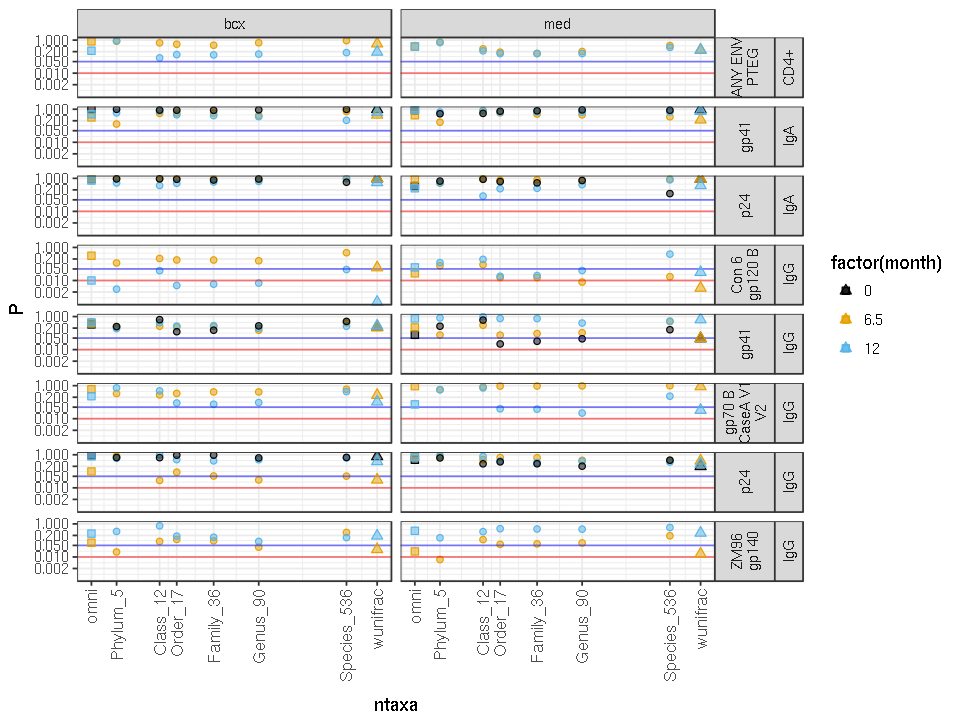

In [135]:
mirDat %>% 
#mutate(antigen = stringr::str_replace_all(antigen, "\\.", " ")) %>% 
fixstuff %>%
ggplot(aes(x = ntaxa, y = P, col = factor(month), fill = factor(month))) +
geom_point(pch = 21) +
facet_grid(type + antigen ~ metric, labeller = labeller(antigen = label_wrap_gen(width = 10))) + 
scale_x_log10(breaks = c(3, NTaxaAtLevel2$ntaxa, 1000), labels = c("omni", NTaxaAtLevel2$nLev, "wunifrac")) +
scale_y_log10(breaks = c(0.002, 0.01, 0.05, 0.2, 1)) + 
geom_hline(yintercept=0.05, col = 'blue', alpha = 0.5) + geom_hline(yintercept=0.01, col = 'red', alpha = 0.5) +
#geom_hline(data = mirOmni, aes(yintercept = P, col = factor(month))) +
#annotation_logticks(sides = 'bl') +
#geom_rug(data = mirOmni, aes(y = P, col = factor(month)), inherit.aes = F) +
geom_point(data = mirOmni %>% ungroup %>% fixstuff,
           aes(x = 3, y = P, col = factor(month), fill = factor(month)), inherit.aes = F, pch = 22, size = 2) +
geom_point(data = WufPData %>% ungroup %>% fixant,
           aes(x = 1000, y = mir.P, col = factor(month), fill = factor(month)), inherit.aes = F, pch = 24, size = 2) +

scale_colour_manual(values=cbPalette) + 
scale_fill_manual(values=alpha(cbPalette, 0.5)) + 
theme_bw() +
theme(axis.text.x = element_text(angle = 90, hjust = 1,, vjust = 0.5, size = 10),
     strip.text.y = (element_text(angle = 90))) -> pjsd0

options(repr.plot.width=8, repr.plot.height= 6)
pjsd0
options(par0)
# I'd like to add weighted unifrac as a tick mark on the right.

In [136]:
NTaxaAtLevel2

nLev,taxLevels,ntaxa
Phylum_5,Phylum,5
Class_12,Class,12
Order_17,Order,17
Family_36,Family,36
Genus_90,Genus,90
Species_536,Species,536


In [137]:
# New combined data frame that has omnibus, regular, and wunifrac all in one
bind_rows(
     mirDat %>% mutate(metric =  stringr::str_replace_all(metric, "JSD", "")) %>%
    mutate(test = "JSD"),
     mirOmni %>% ungroup %>% mutate(metric =  stringr::str_replace_all(metric, "JSD", "")) %>%
    mutate(taxLevels = "Omnibus") %>% mutate(test = "Omnibus"),
     WufPData %>% ungroup %>% dplyr::rename(P = mir.P) %>%
    mutate(taxLevels = "WUnifrac") %>% mutate(test = "WUnifrac")
) %>% 
mutate(antigen = factor(antigen, levels = c(ants2, ants1, "ANY.ENV.PTEG"))) %>%
mutate(type = factor(type, levels = c("IgA", "IgG", "CD4+"))) %>%
mutate(taxLevels = factor(taxLevels, levels = c("Omnibus", NTaxaAtLevel2$taxLevels, "WUnifrac"))) %>%
dplyr::select(-c(bcxJSDOmni:medJSDOmni))%>%
unite(nLev, taxLevels, ntaxa, remove = FALSE) %>%
mutate(nLev = stringr::str_replace(nLev, "_NA", "")) %>%
#mutate(antigen = stringr::str_replace_all(antigen, "\\.", " ")) %>%
#mutate(antigen = stringr::str_replace_all(antigen, "_", " ")) %>%
 mutate(antigen = factor(antigen, labels = stringr::str_replace_all(levels(antigen), "\\.", " "))) %>%
 mutate(antigen = factor(antigen, labels = stringr::str_replace_all(levels(antigen), "_", " "))) %>%


# mutate(antigen = factor(antigen, labels = (levels(antigen)))) %>%
# mutate(antigen = factor(antigen, labels = (levels(antigen)))) %>%

mutate(test = factor(test, levels = c('Omnibus', 'JSD', 'WUnifrac'))) %>%
pass -> mirDat2
mirDat2 %>% filter(type == 'CD4+')

Warning message in bind_rows_(x, .id):
“binding factor and character vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”

type,antigen,month,nLev,taxLevels,ntaxa,metric,P,test
CD4+,ANY ENV PTEG,6.5,Phylum_5,Phylum,5,bcx,0.8480,JSD
CD4+,ANY ENV PTEG,6.5,Class_12,Class,12,bcx,0.6820,JSD
CD4+,ANY ENV PTEG,6.5,Order_17,Order,17,bcx,0.5610,JSD
CD4+,ANY ENV PTEG,6.5,Family_36,Family,36,bcx,0.4890,JSD
CD4+,ANY ENV PTEG,6.5,Genus_90,Genus,90,bcx,0.6890,JSD
CD4+,ANY ENV PTEG,6.5,Species_536,Species,536,bcx,0.9300,JSD
CD4+,ANY ENV PTEG,12.0,Phylum_5,Phylum,5,bcx,0.9140,JSD
CD4+,ANY ENV PTEG,12.0,Class_12,Class,12,bcx,0.0840,JSD
CD4+,ANY ENV PTEG,12.0,Order_17,Order,17,bcx,0.1320,JSD
CD4+,ANY ENV PTEG,12.0,Family_36,Family,36,bcx,0.1270,JSD


In [138]:
mirDat2 %>% head

type,antigen,month,nLev,taxLevels,ntaxa,metric,P,test
IgA,gp41,6.5,Phylum_5,Phylum,5,bcx,0.127,JSD
IgA,gp41,6.5,Class_12,Class,12,bcx,0.561,JSD
IgA,gp41,6.5,Order_17,Order,17,bcx,0.594,JSD
IgA,gp41,6.5,Family_36,Family,36,bcx,0.577,JSD
IgA,gp41,6.5,Genus_90,Genus,90,bcx,0.417,JSD
IgA,gp41,6.5,Species_536,Species,536,bcx,0.725,JSD


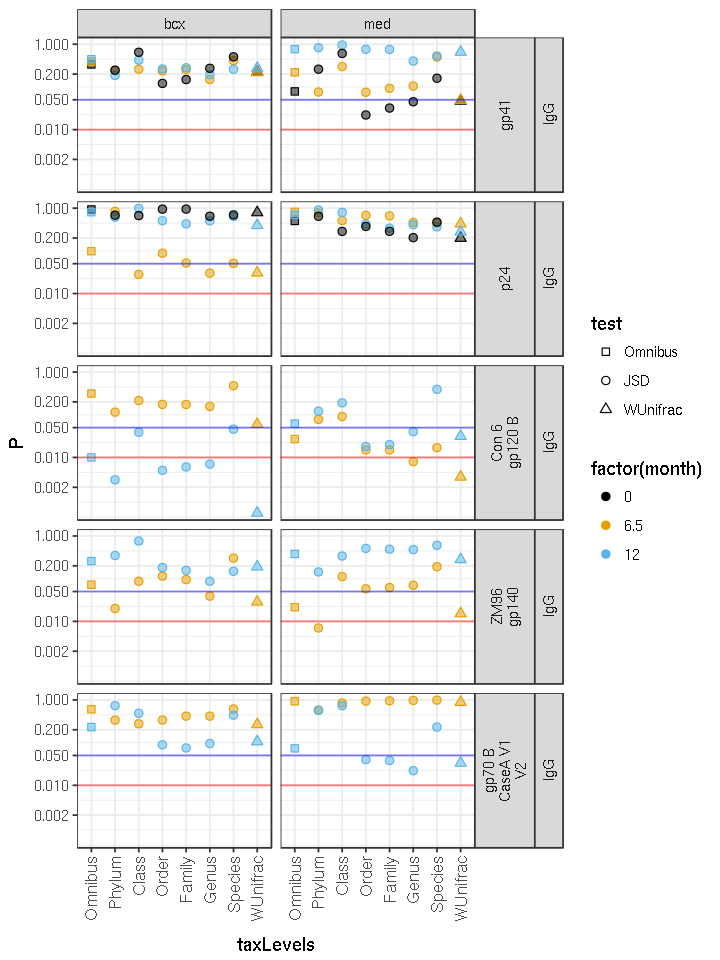

In [139]:
mirDat2 %>%
filter(type == "IgG") %>%
ggplot(aes(x = taxLevels, y = P, col = factor(month), fill = factor(month), shape = test)) +
geom_point(size = 2) +
facet_grid(type + antigen ~ metric, labeller = labeller(antigen = label_wrap_gen(width = 10))) + 
#scale_x_log10(breaks = c(3, NTaxaAtLevel2$ntaxa, 1000), labels = c("omni", NTaxaAtLevel2$nLev, "wunifrac")) +
scale_y_log10(breaks = c(0.002, 0.01, 0.05, 0.2, 1)) + 
geom_hline(yintercept=0.05, col = 'blue', alpha = 0.5) + geom_hline(yintercept=0.01, col = 'red', alpha = 0.5) +

scale_shape_manual(values = c(22, 21, 24)) +
scale_colour_manual(values=cbPalette) + 
scale_fill_manual(values=alpha(cbPalette, 0.5)) + 
theme_bw() +
theme(axis.text.x = element_text(angle = 90, hjust = 1,, vjust = 0.5, size = 10),
     strip.text.y = (element_text(angle = 90))) -> pjsd


options(repr.plot.width=6, repr.plot.height= 8)
pjsd

ggsave('figures/KernelPVsLevel.png', width = 6, height = 8)
options(par0)

X-axis is now spaced evenly

Table SX. P values of kernel regression tests. Circles indicate jensen shannon values at different taxonomic resolutions. Squares are the omnibus p-value for that cohort of tests. Triangles indicate kernel regression p-values for the corresponding weighted unifrac test.

The blue and red lines indicate p values of 5% and 1% respectively.

Observations: The weighted unifrac test is sensitive. In cases where only one taxonic level hits, weighted unifrac often also falls at some statistically significant value. The omnibus p value is often higher than the weighted unifrac one.
Weighted unifrac seems like a good test for identifying patterns at any level that relate to an outcome. The jensen shannon informs us about which level the pattern is observed.

# Local Tests

## Family, genera and species vs wuf1
I might even be able to drill down to every level.

In [140]:
model_each_species <- function(ps, f, pthresh = 1, q = FALSE){
    # Start with the otu table
ps %>%
# reshape it so we have clr values for every taxon-sample pair
otu_table %>% as.data.frame %>% rownames_to_column("Sample") %>% gather(Taxon, clr, -Sample) %>%
    # bind that to the sample data
    # doing this here seems remarkably inefficient, but its not creating a bottleneck so I'll leave it.
left_join(
    ps %>%
    # the sample data need to have MDS1 and MDS2 appended to them
    phylo_join(
    psN2.pcoa %>% scores(display = "sites") %>% # hardcoded psN2.pcoa
        as.data.frame %>% 
        rownames_to_column %>% 
        dplyr::select('rowname', 'MDS1', 'MDS2'),
    by = 'rowname'
) %>%
    # back to binding to sample data
    sample_data %>% as('data.frame') %>% rownames_to_column("Sample"),
     by = 'Sample') %>%

group_by(Taxon) %>%  # group and nest for model run
nest %>%
mutate(Mod = map(data, f)) %>% # apply model over each species
mutate(Glance = map(Mod, glance), Tidy = map(Mod, tidy)) %>% # extract relevant data from model
# view model
dplyr::select(Taxon, Tidy) %>% unnest %>%
mutate(term = gsub('[\\( \\)]','', term)) %>% # remove parentheses from "(Intercept)"
gather(meas, val, estimate:p.value) %>% 
unite(meas, term, meas) %>% spread(meas, val) %>% arrange(clr_estimate) %>% 
dplyr::select(Taxon, Intercept_estimate, clr_estimate, clr_std.error, clr_p.value) %>%
    # add q value
    {if(q) mutate(., clr_q.value = p2q(clr_p.value)) else .} %>%
    
 filter(clr_p.value < pthresh) %>%

     #Join taxonomy information
     left_join(
     ps %>% tax_table %>% as.data.frame %>% as.tibble %>% dplyr::select(Kingdom:Genus, Species, tag) %>%
         mutate(tag = as.character(tag)), # mutate so tag is and taxon are both character class
     by = c("Taxon" = "tag")) %>%
pass
 }

In [141]:
model_each_species_for_antigen <- function(antigen, ps = psN2){
    ps %>%
    model_each_species(function(df){glm(medcode2(get(antigen)) ~ clr, data = df, family = 'binomial')}, q = TRUE, pthresh = 1)
}

In [142]:
ColsToRun <- c('IgG_Con.6.gp120.B_Month_6.5', 'IgG_Con.6.gp120.B_Month_12', 'IgG_gp41_Month_0', 'IgG_gp41_Month_6.5', 'IgG_gp70_B.CaseA_V1_V2_Month_12', 'IgG_ZM96.gp140_Month_6.5', 'MDS1', 'isMale' ) 



In [143]:
model_each_species_case <- function(ps){
    
    ps %>% model_each_species(function(df){glm(MDS1 ~ clr, data = df, family = 'gaussian')}, q = TRUE, pthresh = 1) %>%
arrange(clr_estimate) %>%
mutate(Taxon = factor(Taxon, levels = Taxon[order(clr_estimate)])) %>%
    mutate(test = 'gaussian', antigen = 'MDS1') %>%
pass -> loc_mds1Glms
    
        ps %>% model_each_species(function(df){glm(log10(IgG_Con.6.gp120.B_Month_12 + 100) ~ clr, data = df, family = 'gaussian')}, q = TRUE, pthresh = 1) %>%
arrange(clr_estimate) %>%
 mutate(Taxon = factor(Taxon, levels = levels(loc_mds1Glms$Taxon))) %>%
    mutate(test = 'gaussian', antigen = 'Con.6.gp120.B_Month_12') %>%
 pass -> loc_gp120Glms
    
      tibble(antigen = ColsToRun) %>% mutate(model = map(antigen, ~model_each_species_for_antigen(., ps = ps))) %>%
  unnest %>% mutate(Taxon = factor(Taxon, levels = levels(loc_mds1Glms$Taxon))) %>%
        mutate(test = 'binomial') %>%
    pass-> loc_logitCoefs
    

    #list(loc_mds1Glms, loc_gp120Glms, loc_logitCoefs)
     bind_rows(loc_mds1Glms, loc_gp120Glms, loc_logitCoefs) %>% dplyr::select(test, antigen, everything())
    
}

In [144]:
#psDf %>% mutate(ps2 = map(ps, ~swap.phyloseq.taxnames(tag_phyloseq(remove_tag_phyloseq(.))))) -> test

In [145]:
#psDf[[1,"clr"]] %>% tax_table

In [146]:
psDf[[1]]

[1] "Phylum"  "Class"   "Order"   "Family"  "Genus"   "Species"

In [147]:
psDf %>% print

# A tibble: 6 x 9
  taxLevels ntaxa psCount        ps      jsd    jsdMat   kjsd   psNoZero clr   
  <chr>     <int> <list>         <list>  <list> <list>   <list> <list>   <list>
1 Phylum        5 <S4: phyloseq> <S4: p… <S3: … <dbl [2… <dbl … <S4: ph… <S4: …
2 Class        12 <S4: phyloseq> <S4: p… <S3: … <dbl [2… <dbl … <S4: ph… <S4: …
3 Order        17 <S4: phyloseq> <S4: p… <S3: … <dbl [2… <dbl … <S4: ph… <S4: …
4 Family       36 <S4: phyloseq> <S4: p… <S3: … <dbl [2… <dbl … <S4: ph… <S4: …
5 Genus        90 <S4: phyloseq> <S4: p… <S3: … <dbl [2… <dbl … <S4: ph… <S4: …
6 Species     536 <S4: phyloseq> <S4: p… <S3: … <dbl [2… <dbl … <S4: ph… <S4: …


In [148]:
ptm = proc.time()
psDf %>% dplyr::select(taxLevels, ntaxa, clr) %>% mutate(localmod = map(clr, model_each_species_case)) ->psDfLoc
proc.time() - ptm

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

   user  system elapsed 
 89.391   0.640  90.050 

In [149]:
print(psDfLoc)

# A tibble: 6 x 4
  taxLevels ntaxa clr            localmod             
  <chr>     <int> <list>         <list>               
1 Phylum        5 <S4: phyloseq> <tibble [50 × 15]>   
2 Class        12 <S4: phyloseq> <tibble [120 × 15]>  
3 Order        17 <S4: phyloseq> <tibble [170 × 15]>  
4 Family       36 <S4: phyloseq> <tibble [360 × 15]>  
5 Genus        90 <S4: phyloseq> <tibble [900 × 15]>  
6 Species     536 <S4: phyloseq> <tibble [5,360 × 15]>


In [150]:
psDfLoc %>% dplyr::select(-clr) %>% unnest(localmod) -> tmp

Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning mess

In [151]:
psDfLoc$taxLevels

[1] "Phylum"  "Class"   "Order"   "Family"  "Genus"   "Species"

In [152]:
tmp %>% mutate(taxLevels = factor(taxLevels, levels = psDfLoc$taxLevels)) -> LocalTests

In [153]:
LocalTests %>% 
filter(antigen != "MDS1") %>%
write_csv("tables/AllLocalTests.csv")

## I want to show the local tests vs antibodies.

In [154]:
LocalTests %>% head

taxLevels,ntaxa,test,antigen,Taxon,Intercept_estimate,clr_estimate,clr_std.error,clr_p.value,clr_q.value,Kingdom,Phylum,Class,Order,Family,Genus,Species
Phylum,5,gaussian,MDS1,Bacteroidetes,1.9797921,-0.7778703,0.2372915,0.003955489,0.007607443,Bacteria,Bacteroidetes,NA,NA,NA,NA,NA
Phylum,5,gaussian,MDS1,Porphyromonadaceae,-1.0229577,-0.5032637,0.1880937,0.014955140,0.014381330,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Porphyromonadaceae,NA,NA
Phylum,5,gaussian,MDS1,Actinobacteria,-0.2679471,-0.1391228,0.2077476,0.511123802,0.196605046,Bacteria,Actinobacteria,Actinobacteria,NA,NA,NA,NA
Phylum,5,gaussian,MDS1,Campylobacter,0.4456659,0.2474623,0.1058586,0.030497772,0.019551740,Bacteria,Proteobacteria,Epsilonproteobacteria,Campylobacterales,Campylobacteraceae,Campylobacter,NA
Phylum,5,gaussian,MDS1,Bacteria,-1.2850969,0.3997908,0.2629518,0.144878955,0.069660064,Bacteria,NA,NA,NA,NA,NA,NA
Phylum,5,gaussian,Con.6.gp120.B_Month_12,Bacteria,3.7823748,-0.2922472,0.1706909,0.103144366,0.171907277,Bacteria,NA,NA,NA,NA,NA,NA


Saving 6.67 x 6.67 in image


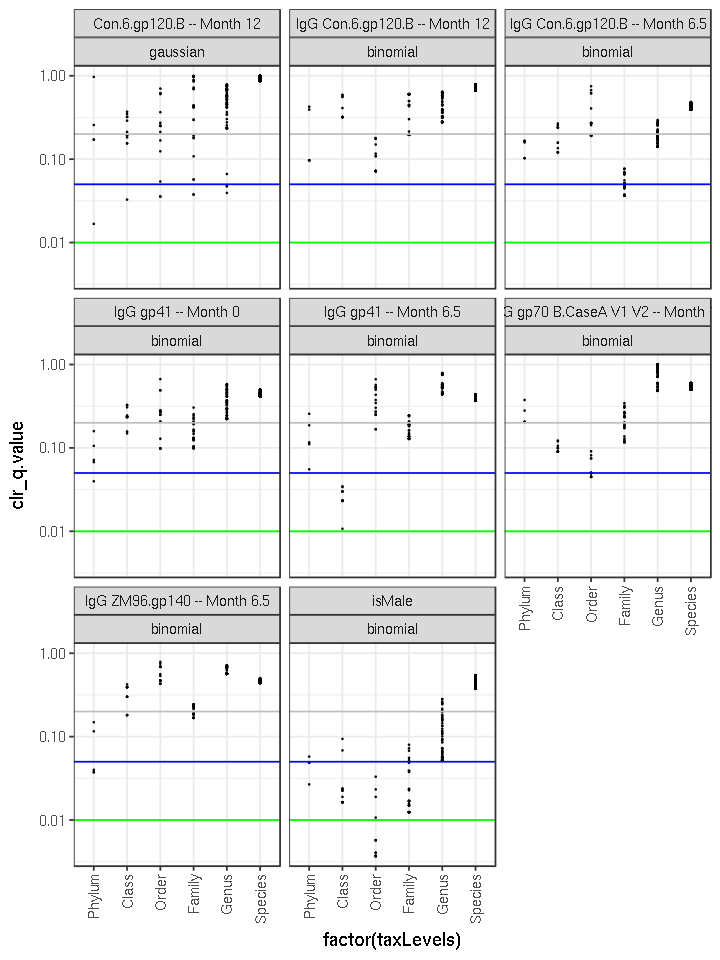

In [155]:
options(repr.plot.width=6, repr.plot.height=8)
LocalTests %>% 
filter(antigen != "MDS1") %>%
#Clean up labels
mutate(antigen = stringr::str_replace_all(antigen, "_", " ")) %>%
mutate(antigen = stringr::str_replace_all(antigen, " Month", " -- Month")) %>%
mutate(antigen = stringr::str_replace_all(antigen, " IgG ", "")) %>%
ggplot(aes(x = factor(taxLevels), y = clr_q.value)) + geom_point(size = 0.1) +
geom_hline(yintercept = 0.2, color = 'grey') +
 geom_hline(yintercept = 0.05, color = 'blue') + geom_hline(yintercept = 0.01, color = 'green') +
facet_wrap(~antigen + test) + scale_y_log10() +
theme_bw() +
theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5))

ggsave('figures/LocalQEveryLevel.png')

Saving 6.67 x 6.67 in image


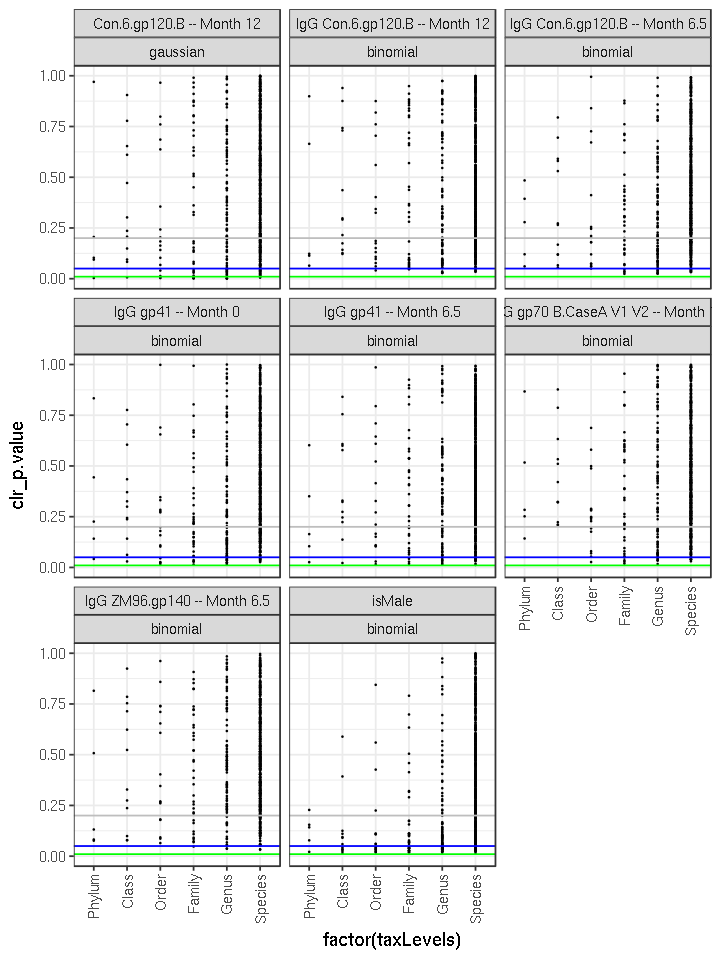

In [156]:
options(repr.plot.width=6, repr.plot.height=8)
LocalTests %>% 
filter(antigen != "MDS1") %>%
#Clean up labels
mutate(antigen = stringr::str_replace_all(antigen, "_", " ")) %>%
mutate(antigen = stringr::str_replace_all(antigen, " Month", " -- Month")) %>%
mutate(antigen = stringr::str_replace_all(antigen, " IgG ", "")) %>%
ggplot(aes(x = factor(taxLevels), y = clr_p.value)) + geom_point(size = 0.1) +
geom_hline(yintercept = 0.2, color = 'grey') +
 geom_hline(yintercept = 0.05, color = 'blue') + geom_hline(yintercept = 0.01, color = 'green') +
facet_wrap(~antigen + test) +# scale_y_log10() +
theme_bw() +
theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5))
ggsave('figures/LocalPEveryLevel.png')

Saving 6.67 x 6.67 in image


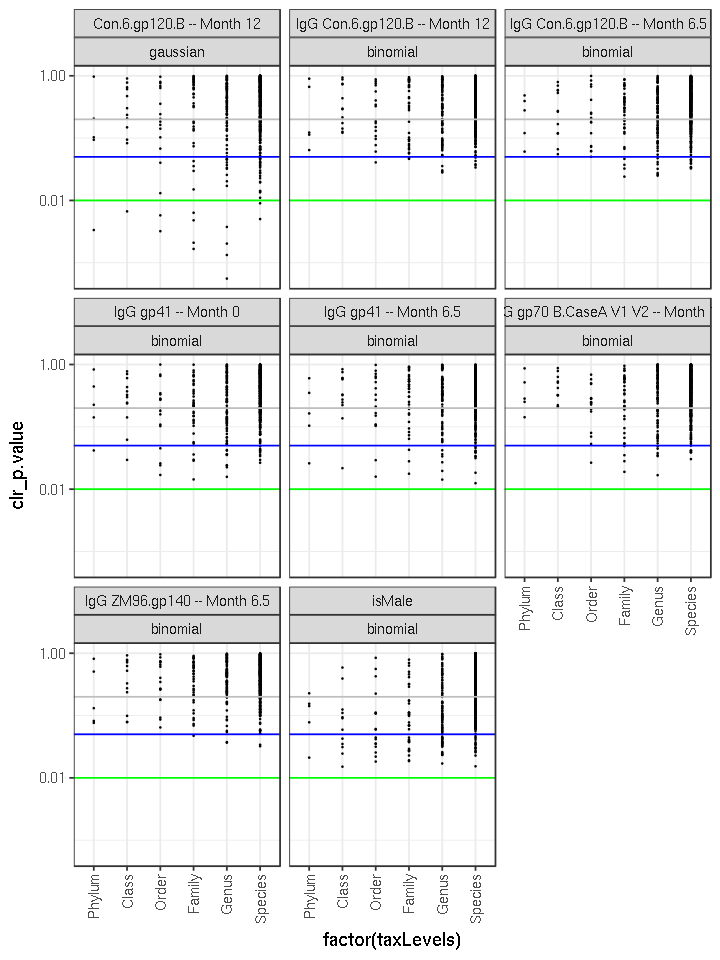

In [157]:
options(repr.plot.width=6, repr.plot.height=8)
LocalTests %>% 
filter(antigen != "MDS1") %>%
#Clean up labels
mutate(antigen = stringr::str_replace_all(antigen, "_", " ")) %>%
mutate(antigen = stringr::str_replace_all(antigen, " Month", " -- Month")) %>%
mutate(antigen = stringr::str_replace_all(antigen, " IgG ", "")) %>%
ggplot(aes(x = factor(taxLevels), y = clr_p.value)) + geom_point(size = 0.1) +
geom_hline(yintercept = 0.2, color = 'grey') +
 geom_hline(yintercept = 0.05, color = 'blue') + geom_hline(yintercept = 0.01, color = 'green') +
facet_wrap(~antigen + test) + scale_y_log10() +
theme_bw() +
theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5))
ggsave('figures/LocalPEveryLevel_LogScale.png')

In [158]:
order_taxa_by_mds1 <- function(df){
    # this has to be a model_each_species type of data frame
    df %>% filter(antigen == 'MDS1' & test == 'gaussian') %>%
    mutate(TaxonF = factor(Taxon, levels = Taxon[order(clr_estimate)])) -> mds1df
    df %>% mutate(TaxonF = factor(Taxon, levels = levels(mds1df$TaxonF)))
}

To my annoyance, everything is labeled with IgG except gp120_12

In [159]:
LocalTests %>%
filter(taxLevels == 'Family') %>%
order_taxa_by_mds1 %>%

filter(
    (antigen %in% c('IgG_gp41_Month_0', 'IgG_gp41_Month_6.5', 'IgG_Con.6.gp120.B_Month_6.5'))|
    (antigen == 'Con.6.gp120.B_Month_12' & test == 'gaussian')
      ) %>%
mutate(antigen = factor(antigen,
                        levels = c('IgG_gp41_Month_0', 'IgG_gp41_Month_6.5',
                                   'IgG_Con.6.gp120.B_Month_6.5', 'Con.6.gp120.B_Month_12'))) %>%
filter(clr_p.value < 0.05 & clr_q.value < 0.2) %>%
dplyr::select(antigen:clr_estimate) %>%
dplyr::select(-Intercept_estimate) %>%
mutate(cordir = sign(clr_estimate)) %>%
pass

antigen,Taxon,clr_estimate,cordir
Con.6.gp120.B_Month_12,Bacteroidetes.2,-0.3052386,-1
Con.6.gp120.B_Month_12,Firmicutes.2,-0.2921091,-1
Con.6.gp120.B_Month_12,Fusobacterium,-0.1817774,-1
Con.6.gp120.B_Month_12,Bacilli,-0.1585977,-1
Con.6.gp120.B_Month_12,Clostridia,-0.1464105,-1
Con.6.gp120.B_Month_12,Firmicutes.3,0.2002285,1
Con.6.gp120.B_Month_12,Bacteroides,0.2125381,1
Con.6.gp120.B_Month_12,Porphyromonadaceae.1,0.2518832,1
IgG_Con.6.gp120.B_Month_6.5,Firmicutes.2,-1.7703200,-1
IgG_Con.6.gp120.B_Month_6.5,Bacteroides,1.0970012,1


In [160]:
LocalTests %>% pull(antigen) %>% unique

[1] "MDS1"                            "Con.6.gp120.B_Month_12"         
[3] "IgG_Con.6.gp120.B_Month_6.5"     "IgG_Con.6.gp120.B_Month_12"     
[5] "IgG_gp41_Month_0"                "IgG_gp41_Month_6.5"             
[7] "IgG_gp70_B.CaseA_V1_V2_Month_12" "IgG_ZM96.gp140_Month_6.5"       
[9] "isMale"

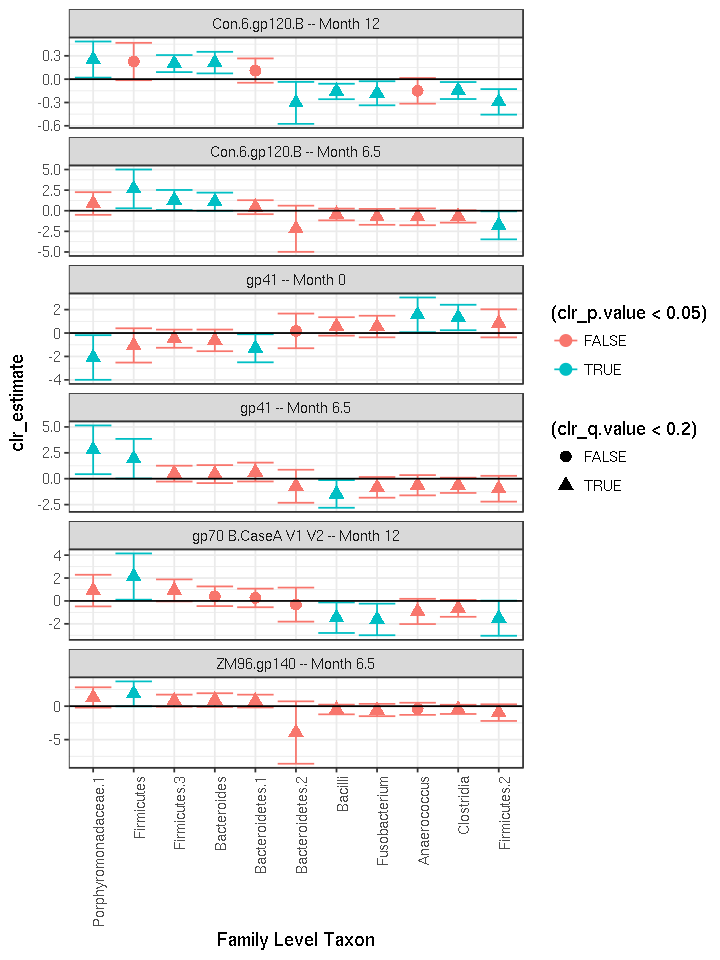

In [161]:
# Family Hits
LocalTests %>%
filter(taxLevels == 'Family') %>%
order_taxa_by_mds1 %>%

filter(
    (antigen %in% c('IgG_gp41_Month_0', 'IgG_gp41_Month_6.5', 'IgG_Con.6.gp120.B_Month_6.5', 
                    'IgG_ZM96.gp140_Month_6.5','IgG_gp70_B.CaseA_V1_V2_Month_12'))|
    (antigen == 'Con.6.gp120.B_Month_12' & test == 'gaussian')
      ) %>%
mutate(antigen = factor(antigen, levels = c(
    'IgG_gp41_Month_0', 'IgG_gp41_Month_6.5', 'IgG_Con.6.gp120.B_Month_6.5', 'Con.6.gp120.B_Month_12',
    'IgG_ZM96.gp140_Month_6.5','IgG_gp70_B.CaseA_V1_V2_Month_12'
))) %>%

pass -> tmp

#tmp$antigen %>% unique

tmp %>% filter(clr_p.value < 0.05 & clr_q.value < 0.2) %>%
pull(Taxon) %>% unique -> useFamily

tmp %>% filter(Taxon %in% useFamily) %>%

#Clean up labels
mutate(antigen = stringr::str_replace_all(antigen, "_", " ")) %>%
mutate(antigen = stringr::str_replace_all(antigen, " Month", " -- Month")) %>%
mutate(antigen = stringr::str_replace_all(antigen, "IgG ", "")) %>%

ggplot(aes(x = TaxonF, y = clr_estimate,
           color = (clr_p.value < 0.05), shape =(clr_q.value < 0.2))) +
geom_point(size = 3) + 
geom_errorbar(aes(ymin = clr_estimate - 2*clr_std.error, ymax = clr_estimate + 2*clr_std.error)) + 
theme_bw() +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) + geom_hline(yintercept = 0) +
facet_wrap(~antigen, ncol = 1, scales = 'free_y') + xlab("Family Level Taxon")
# Show the censored ones accross - so this would be everything with at least one hit
# but also show what they are in all cases.

ggsave('figures/anyFamilyIgg.png', width = 6, height = 8)

I think its worth digging into clostridia and Prophyromonidaceae with stacked bars

# Proportionality heatmap

Family level

Lets come back to this after we've done the local tests. Since we need them to color code the axes.

In [162]:
psDf %>% print

# A tibble: 6 x 9
  taxLevels ntaxa psCount        ps      jsd    jsdMat   kjsd   psNoZero clr   
  <chr>     <int> <list>         <list>  <list> <list>   <list> <list>   <list>
1 Phylum        5 <S4: phyloseq> <S4: p… <S3: … <dbl [2… <dbl … <S4: ph… <S4: …
2 Class        12 <S4: phyloseq> <S4: p… <S3: … <dbl [2… <dbl … <S4: ph… <S4: …
3 Order        17 <S4: phyloseq> <S4: p… <S3: … <dbl [2… <dbl … <S4: ph… <S4: …
4 Family       36 <S4: phyloseq> <S4: p… <S3: … <dbl [2… <dbl … <S4: ph… <S4: …
5 Genus        90 <S4: phyloseq> <S4: p… <S3: … <dbl [2… <dbl … <S4: ph… <S4: …
6 Species     536 <S4: phyloseq> <S4: p… <S3: … <dbl [2… <dbl … <S4: ph… <S4: …


In [163]:
psDf %>% filter(taxLevels == 'Family') %>% dplyr::select(ps) %>% pull %>%.[[1]]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 36 taxa and 21 samples ]
sample_data() Sample Data:       [ 21 samples by 35 sample variables ]
tax_table()   Taxonomy Table:    [ 36 taxa by 12 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 36 tips and 35 internal nodes ]

In [164]:
print(psDf)

# A tibble: 6 x 9
  taxLevels ntaxa psCount        ps      jsd    jsdMat   kjsd   psNoZero clr   
  <chr>     <int> <list>         <list>  <list> <list>   <list> <list>   <list>
1 Phylum        5 <S4: phyloseq> <S4: p… <S3: … <dbl [2… <dbl … <S4: ph… <S4: …
2 Class        12 <S4: phyloseq> <S4: p… <S3: … <dbl [2… <dbl … <S4: ph… <S4: …
3 Order        17 <S4: phyloseq> <S4: p… <S3: … <dbl [2… <dbl … <S4: ph… <S4: …
4 Family       36 <S4: phyloseq> <S4: p… <S3: … <dbl [2… <dbl … <S4: ph… <S4: …
5 Genus        90 <S4: phyloseq> <S4: p… <S3: … <dbl [2… <dbl … <S4: ph… <S4: …
6 Species     536 <S4: phyloseq> <S4: p… <S3: … <dbl [2… <dbl … <S4: ph… <S4: …


In [165]:
#nFamilyTaxa <- NTaxaAtLevel %>% filter(taxLevels == 'Family') %>% pull(ntaxa)

psDf %>% filter(taxLevels == 'Family') %>% dplyr::select(psNoZero) %>% pull %>%.[[1]] %>%
otu_table %>% as.data.frame %>%
pass -> myRel

ptm = proc.time()
phiBoot <- boot(data = myRel, statistic = boot_phi, R = 1000)
proc.time() - ptm

ptm = proc.time()
tidyCI <- unwarn(
    tidy(phiBoot,conf.int=TRUE,conf.method="bca")
    )
proc.time() - ptm

myRel %>% make_proportionality_matrix %>% 
         as.data.frame %>%
         rownames_to_column("TaxonX") %>% gather(TaxonY, phi, -TaxonX) %>%
    filter(TaxonX != TaxonY) %>% data.frame(tidyCI) -> namedTidyCI

   user  system elapsed 
 20.247   0.028  20.281 

   user  system elapsed 
 26.160   0.060  26.246 

In [166]:
head(LocalTests)

taxLevels,ntaxa,test,antigen,Taxon,Intercept_estimate,clr_estimate,clr_std.error,clr_p.value,clr_q.value,Kingdom,Phylum,Class,Order,Family,Genus,Species
Phylum,5,gaussian,MDS1,Bacteroidetes,1.9797921,-0.7778703,0.2372915,0.003955489,0.007607443,Bacteria,Bacteroidetes,NA,NA,NA,NA,NA
Phylum,5,gaussian,MDS1,Porphyromonadaceae,-1.0229577,-0.5032637,0.1880937,0.014955140,0.014381330,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Porphyromonadaceae,NA,NA
Phylum,5,gaussian,MDS1,Actinobacteria,-0.2679471,-0.1391228,0.2077476,0.511123802,0.196605046,Bacteria,Actinobacteria,Actinobacteria,NA,NA,NA,NA
Phylum,5,gaussian,MDS1,Campylobacter,0.4456659,0.2474623,0.1058586,0.030497772,0.019551740,Bacteria,Proteobacteria,Epsilonproteobacteria,Campylobacterales,Campylobacteraceae,Campylobacter,NA
Phylum,5,gaussian,MDS1,Bacteria,-1.2850969,0.3997908,0.2629518,0.144878955,0.069660064,Bacteria,NA,NA,NA,NA,NA,NA
Phylum,5,gaussian,Con.6.gp120.B_Month_12,Bacteria,3.7823748,-0.2922472,0.1706909,0.103144366,0.171907277,Bacteria,NA,NA,NA,NA,NA,NA


In [167]:
LocalTests %>% filter(test == 'gaussian' &
                        antigen == 'MDS1' &
                         clr_p.value <0.05 &
                        clr_q.value < 0.2&
                        taxLevels == "Family") -> tmp
tmp %>% pull(Taxon) -> MDS1Fam
tmp %>% filter(clr_estimate < 0) %>% pull(Taxon) -> lowMDS1Fam
tmp %>% filter(clr_estimate >= 0) %>% pull(Taxon) -> highMDS1Fam

https://stackoverflow.com/questions/48531987/incorporate-more-information-about-variables-on-axes-into-a-heatmap-in-ggplot/48532983#48532983

I'd like to do this, but for gp41 baseline and gp120 as well.

In [168]:
useFamily

[1] "Bacteroidetes.2"      "Firmicutes.2"         "Fusobacterium"       
 [4] "Bacilli"              "Clostridia"           "Firmicutes.3"        
 [7] "Bacteroides"          "Porphyromonadaceae.1" "Firmicutes"          
[10] "Bacteroidetes.1"      "Anaerococcus"

In [169]:
LocalTests %>% head

taxLevels,ntaxa,test,antigen,Taxon,Intercept_estimate,clr_estimate,clr_std.error,clr_p.value,clr_q.value,Kingdom,Phylum,Class,Order,Family,Genus,Species
Phylum,5,gaussian,MDS1,Bacteroidetes,1.9797921,-0.7778703,0.2372915,0.003955489,0.007607443,Bacteria,Bacteroidetes,NA,NA,NA,NA,NA
Phylum,5,gaussian,MDS1,Porphyromonadaceae,-1.0229577,-0.5032637,0.1880937,0.014955140,0.014381330,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Porphyromonadaceae,NA,NA
Phylum,5,gaussian,MDS1,Actinobacteria,-0.2679471,-0.1391228,0.2077476,0.511123802,0.196605046,Bacteria,Actinobacteria,Actinobacteria,NA,NA,NA,NA
Phylum,5,gaussian,MDS1,Campylobacter,0.4456659,0.2474623,0.1058586,0.030497772,0.019551740,Bacteria,Proteobacteria,Epsilonproteobacteria,Campylobacterales,Campylobacteraceae,Campylobacter,NA
Phylum,5,gaussian,MDS1,Bacteria,-1.2850969,0.3997908,0.2629518,0.144878955,0.069660064,Bacteria,NA,NA,NA,NA,NA,NA
Phylum,5,gaussian,Con.6.gp120.B_Month_12,Bacteria,3.7823748,-0.2922472,0.1706909,0.103144366,0.171907277,Bacteria,NA,NA,NA,NA,NA,NA


In [170]:
reshape2::melt

function (data, ..., na.rm = FALSE, value.name = "value") 
{
    UseMethod("melt", data)
}
<environment: namespace:reshape2>

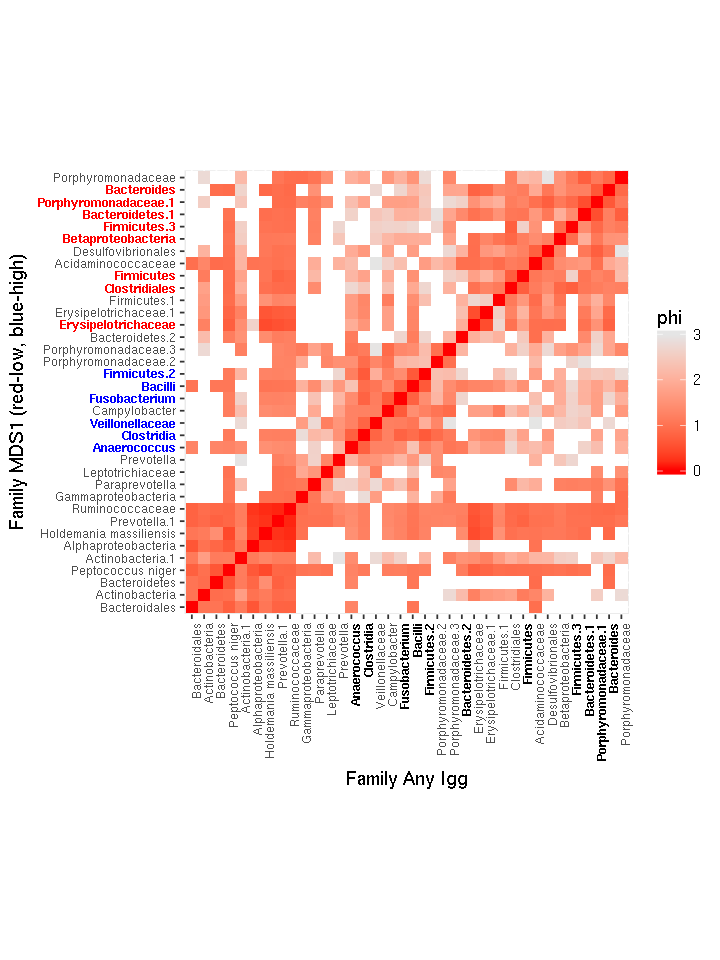

In [171]:
targStat <- "phi"
namedTidyCI %>% dplyr::select(TaxonX, TaxonY, targStat) %>% spread(key = TaxonY, value = targStat) %>%
remove_rownames %>% column_to_rownames("TaxonX") %>%
as.dist %>% as.matrix -> phidata

phi_dd <- as.dist(phidata)
phi_hc <- hclust(phi_dd)

phidata %>%
#.[phi_hc$order, phi_hc$order] %>% # this way also worked just fine
reshape2::melt() %>%
mutate(Var1 = factor(Var1, levels = unique(phi_hc$labels)[phi_hc$order])) %>%
mutate(Var2 = factor(Var2, levels = unique(phi_hc$labels)[phi_hc$order])) %>%
pass-> tmp

ggplot(tmp, aes(Var1, Var2, fill =(value))) + 
geom_tile() +
  scale_fill_gradient(high = "grey90", low = "red", 
    space = "Lab", 
    name="phi",
                    limits = c(NA, 3), na.value = "white") +
#  theme_minimal()+ # minimal theme
 theme(axis.text.x = element_text(
     angle = 90, vjust = 1, size = 7, hjust = 1,
     face = ifelse(levels(tmp$Var1) %in% useFamily, "bold", "plain"),
     colour = ifelse(levels(tmp$Var1) %in% useFamily, "black", "grey30")
                                 ),
       axis.text.y = element_text(
           size = 7,
           face = ifelse(levels(tmp$Var1) %in% MDS1Fam, "bold", "plain"),
           colour = ifelse(levels(tmp$Var1) %in% lowMDS1Fam, "red",
                          ifelse(levels(tmp$Var1) %in% highMDS1Fam, "blue", "grey30"))
       ))+
 coord_fixed() +
labs(x = "Family Any Igg",y = "Family MDS1 (red-low, blue-high)" )-> p_phi_1
p_phi_1
# ggsave("figures/phi_vs_mds1_and_igg.png", p_phi_1, width = 6, height = 6)

In [172]:
LocalTests %>%
filter(taxLevels == 'Family') %>%
order_taxa_by_mds1 %>%

filter(
    (antigen %in% c('IgG_gp41_Month_0', 'IgG_gp41_Month_6.5', 'IgG_Con.6.gp120.B_Month_6.5',
                   'IgG_ZM96.gp140_Month_6.5','IgG_gp70_B.CaseA_V1_V2_Month_12'))|
    (antigen == 'Con.6.gp120.B_Month_12' & test == 'gaussian')
      ) %>%
mutate(antigen = factor(antigen, levels = c('IgG_gp41_Month_0', 'IgG_gp41_Month_6.5', 'IgG_Con.6.gp120.B_Month_6.5', 'Con.6.gp120.B_Month_12',
                                           'IgG_ZM96.gp140_Month_6.5','IgG_gp70_B.CaseA_V1_V2_Month_12'))) %>%
pass -> tmp

tmp %>% dplyr::select(antigen, Taxon, clr_estimate, clr_p.value, clr_q.value) %>%
mutate(clr_sign = sign(clr_estimate)) %>%
mutate(isHit = ifelse(clr_p.value < 0.05 & clr_q.value < 0.2, 1, 0)) %>%
mutate(Taxon = factor(Taxon, levels = unique(phi_hc$labels)[phi_hc$order])) %>%
pass -> chorddata

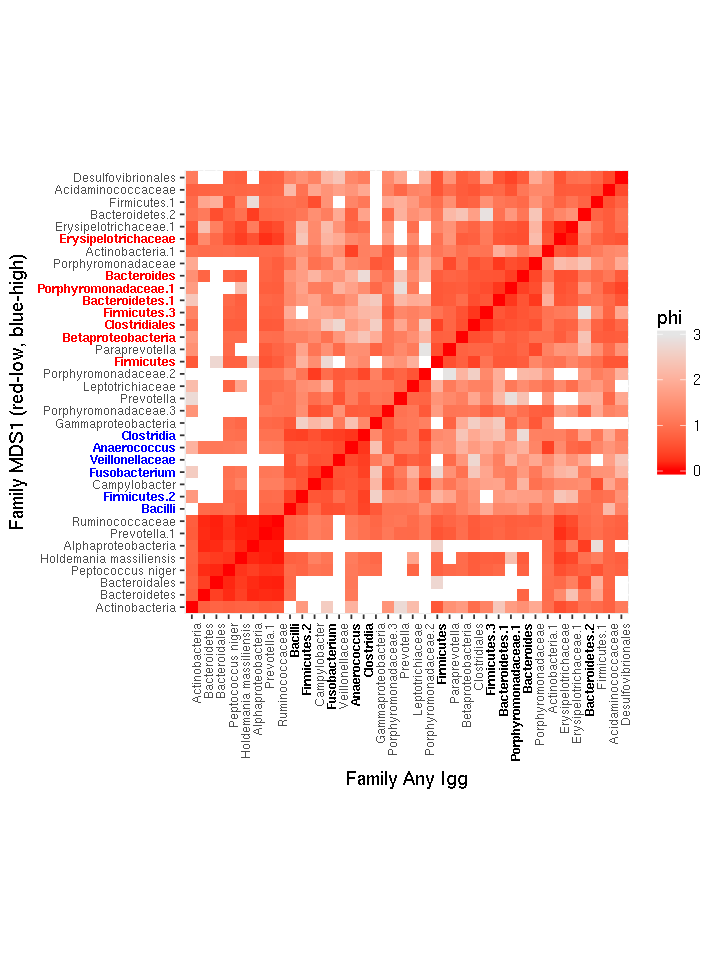

In [173]:
targStat <- "conf.low"
namedTidyCI %>% dplyr::select(TaxonX, TaxonY, targStat) %>% spread(key = TaxonY, value = targStat) %>%
remove_rownames %>% column_to_rownames("TaxonX") %>%
as.dist %>% as.matrix -> phidata

phi_dd <- as.dist(phidata)
phi_hc <- hclust(phi_dd)

phidata %>%
#.[phi_hc$order, phi_hc$order] %>% # this way also worked just fine
reshape2::melt() %>%
mutate(Var1 = factor(Var1, levels = unique(phi_hc$labels)[phi_hc$order])) %>%
mutate(Var2 = factor(Var2, levels = unique(phi_hc$labels)[phi_hc$order])) %>%
pass-> tmp

ggplot(tmp, aes(Var1, Var2, fill =(value))) + 
geom_tile() +
  scale_fill_gradient(high = "grey90", low = "red", 
    space = "Lab", 
    name="phi",
                    limits = c(NA, 3), na.value = "white") +
#  theme_minimal()+ # minimal theme
 theme(axis.text.x = element_text(
     angle = 90, vjust = 1, size = 7, hjust = 1,
     face = ifelse(levels(tmp$Var1) %in% useFamily, "bold", "plain"),
     colour = ifelse(levels(tmp$Var1) %in% useFamily, "black", "grey30")
                                 ),
       axis.text.y = element_text(
           size = 7,
           face = ifelse(levels(tmp$Var1) %in% MDS1Fam, "bold", "plain"),
           colour = ifelse(levels(tmp$Var1) %in% lowMDS1Fam, "red",
                          ifelse(levels(tmp$Var1) %in% highMDS1Fam, "blue", "grey30"))
       ))+
 coord_fixed() +
labs(x = "Family Any Igg",y = "Family MDS1 (red-low, blue-high)" )-> p_phi_low
p_phi_low

# ggsave("figures/phi_vs_mds1_and_igg.png", p_phi_1, width = 6, height = 6)

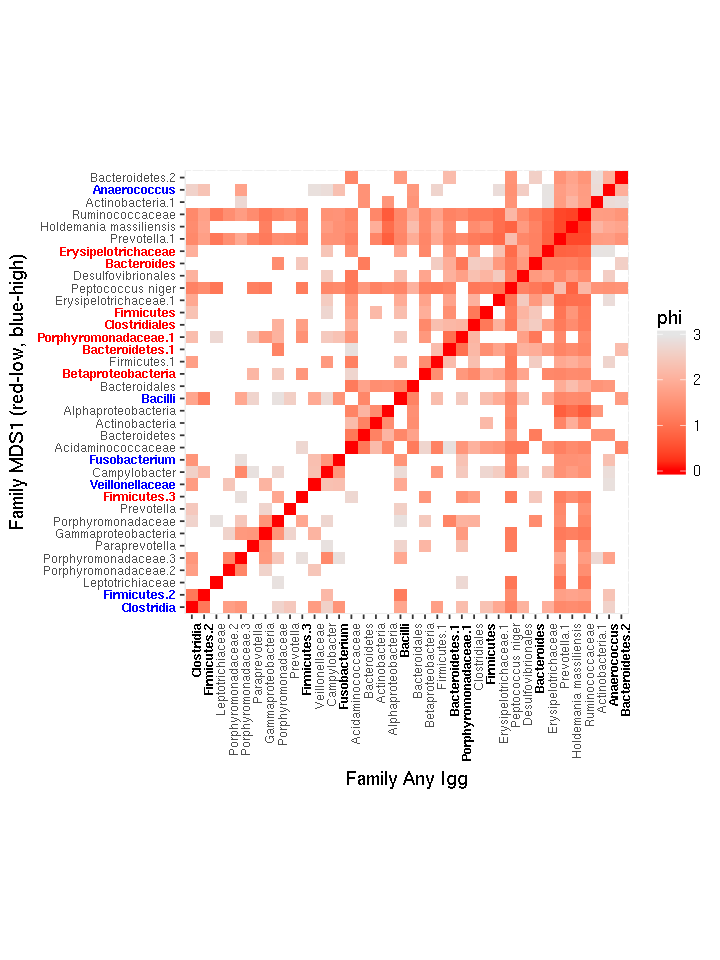

In [174]:
targStat <- "conf.high"
namedTidyCI %>% dplyr::select(TaxonX, TaxonY, targStat) %>% spread(key = TaxonY, value = targStat) %>%
remove_rownames %>% column_to_rownames("TaxonX") %>%
as.dist %>% as.matrix -> phidata

phi_dd <- as.dist(phidata)
phi_hc <- hclust(phi_dd)

phidata %>%
#.[phi_hc$order, phi_hc$order] %>% # this way also worked just fine
reshape2::melt() %>%
mutate(Var1 = factor(Var1, levels = unique(phi_hc$labels)[phi_hc$order])) %>%
mutate(Var2 = factor(Var2, levels = unique(phi_hc$labels)[phi_hc$order])) %>%
pass-> tmp

ggplot(tmp, aes(Var1, Var2, fill =(value))) + 
geom_tile() +
  scale_fill_gradient(high = "grey90", low = "red", 
    space = "Lab", 
    name="phi",
                    limits = c(NA, 3), na.value = "white") +
#  theme_minimal()+ # minimal theme
 theme(axis.text.x = element_text(
     angle = 90, vjust = 1, size = 7, hjust = 1,
     face = ifelse(levels(tmp$Var1) %in% useFamily, "bold", "plain"),
     colour = ifelse(levels(tmp$Var1) %in% useFamily, "black", "grey30")
                                 ),
       axis.text.y = element_text(
           size = 7,
           face = ifelse(levels(tmp$Var1) %in% MDS1Fam, "bold", "plain"),
           colour = ifelse(levels(tmp$Var1) %in% lowMDS1Fam, "red",
                          ifelse(levels(tmp$Var1) %in% highMDS1Fam, "blue", "grey30"))
       ))+
 coord_fixed() +
labs(x = "Family Any Igg",y = "Family MDS1 (red-low, blue-high)" )-> p_phi_high
p_phi_high
# ggsave("figures/phi_vs_mds1_and_igg.png", p_phi_1, width = 6, height = 6)

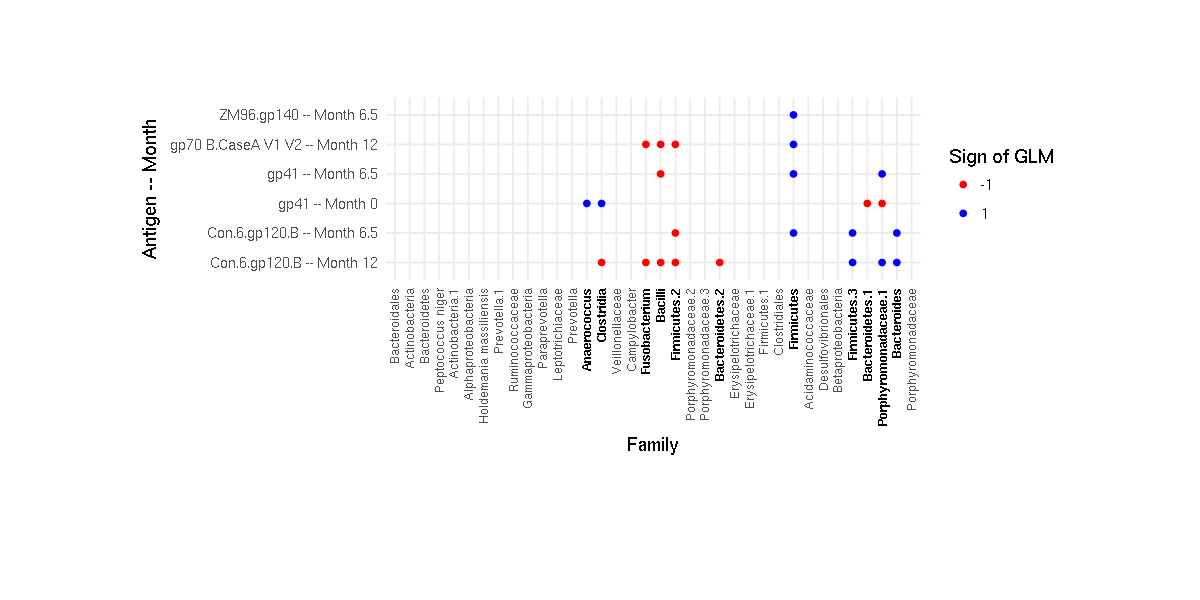

In [175]:
chorddata %>%
#Clean up labels
mutate(antigen = stringr::str_replace_all(antigen, "_", " ")) %>%
mutate(antigen = stringr::str_replace_all(antigen, " Month", " -- Month")) %>%
mutate(antigen = stringr::str_replace_all(antigen, "IgG ", "")) %>%

ggplot(
    aes(x = Taxon, y = antigen, alpha = factor(isHit), color = factor(clr_sign))) +
scale_alpha_discrete(range = c(0, 1)) +
guides(alpha = FALSE) +
theme_minimal() +
     coord_fixed(ratio = 2) +
scale_colour_manual(values = c("red", "blue")) +
 theme(axis.text.x = element_text(
     angle = 90, vjust = 0.5, size = 7, hjust = 1,
     face = ifelse(levels(chorddata$Taxon) %in% useFamily, "bold", "plain"),
     colour = ifelse(levels(chorddata$Taxon) %in% useFamily, "black", "grey30")),
     plot.margin = unit(c(0,3,1,3), "cm")
     ) +
#guides(col = TRUE) +
guides(color=guide_legend(title="Sign of GLM")) +
labs(x = "Family",y = "Antigen -- Month" ) +
geom_point() -> guitar_chords



par <- options()
options(repr.plot.width=10, repr.plot.height= 5)
guitar_chords
options(par)

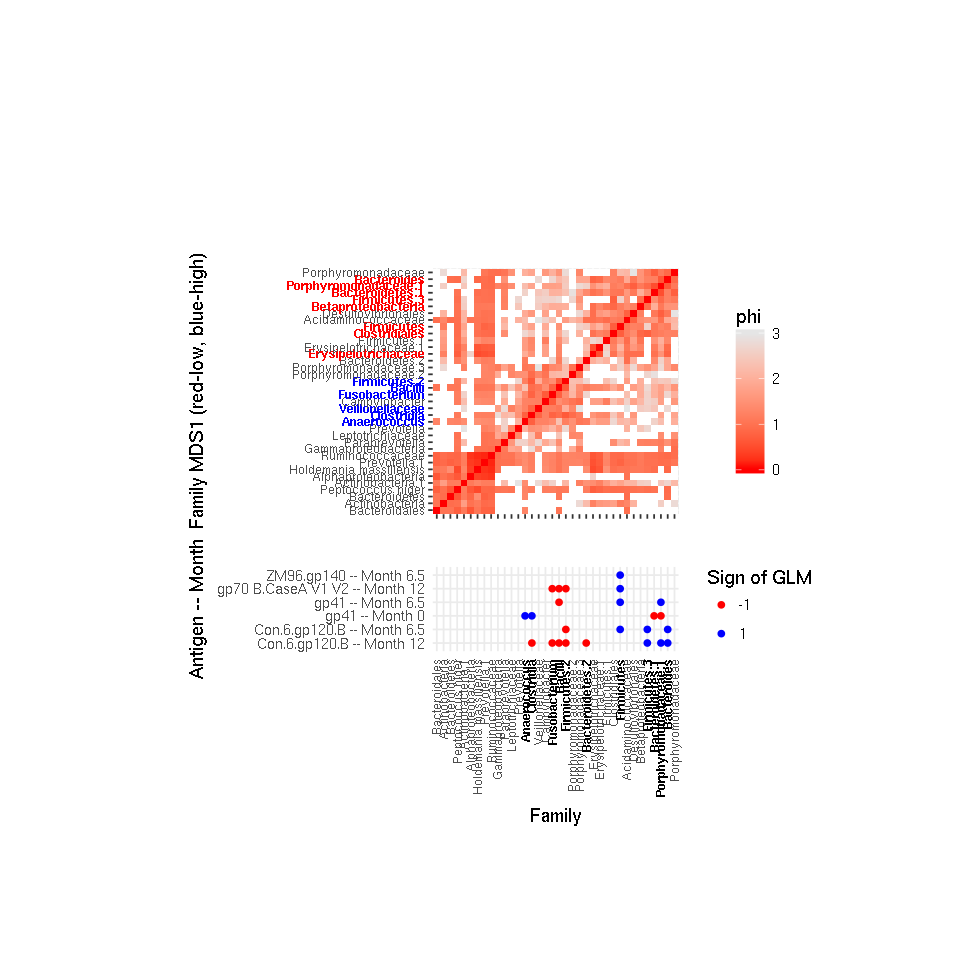

In [176]:
p_phi_1a <- p_phi_1 + 
theme(axis.text.x = element_blank(),
     axis.title.x = element_blank(),
     plot.margin = unit(c(1, 3, -5.5, 4), "cm"))

par <- options()
options(repr.plot.width=8, repr.plot.height= 8)

p_phi_cord <- cowplot::plot_grid(p_phi_1a, guitar_chords, nrow = 2, align = "v")

p_phi_cord

#phi_legend <- cowplot::get_legend(p_phi_1)
# cowplot::ggdraw(
#     cowplot::plot_grid(
#     cowplot::plot_grid(p_phi_1a, guitar_chords, ncol = 1, align = "v"),
#       cowplot::plot_grid(phi_legend, NULL, ncol = 1),
#       rel_widths = c(10,1)
#         ))

 ggsave('figures/phi_heatmap_withlegend.png', width = 10, height = 10)

options(par)

# Stacked bars

In [177]:
# More color-blind friendly colorbalettes
#http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=10
cb10 <- c('#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a')

cb12 <- c('#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928')

# Less color-blind friendly, but still nice.
#https://sashat.me/2017/01/11/list-of-20-simple-distinct-colors/
trub20 <- c('#e6194b','#3cb44b','#ffe119','#0082c8','#f58231','#911eb4','#46f0f0','#f032e6','#d2f53c','#fabebe','#008080','#e6beff','#aa6e28','#fffac8','#800000','#aaffc3','#808000','#ffd8b1','#000080','#808080','#FFFFFF','#000000')

In [178]:
options(repr.plot.width=8, repr.plot.height= 4)

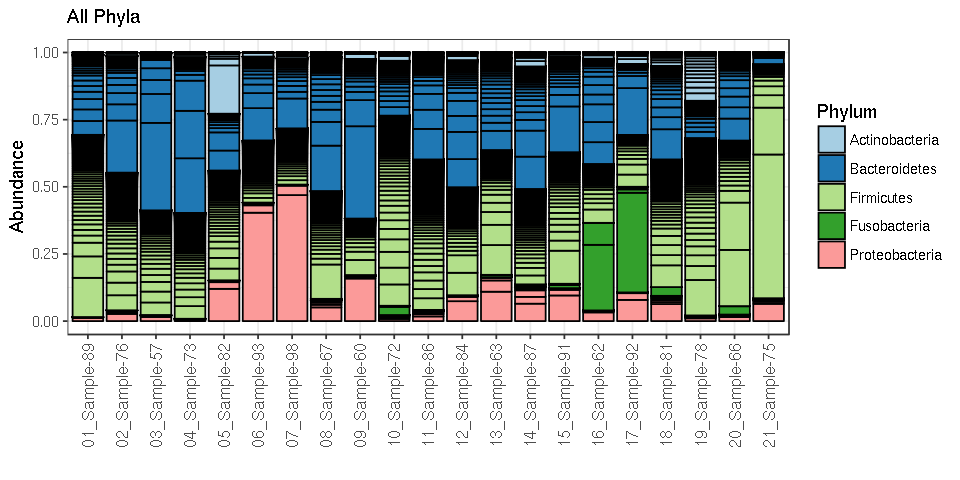

In [179]:
p_phy <- plot_bar(psN2, x = 'newname', fill = 'Phylum') + scale_fill_manual(values = cb10)  + xlab("") +
ggtitle("All Phyla")+ theme_bw() +
theme(axis.text.x = element_text(angle = 90, hjust = 1,, vjust = 0.5, size = 10),
     strip.text.y = (element_text(angle = 90)))
p_phy
#ggsave('plots/Phyla_by_wuf1.png')

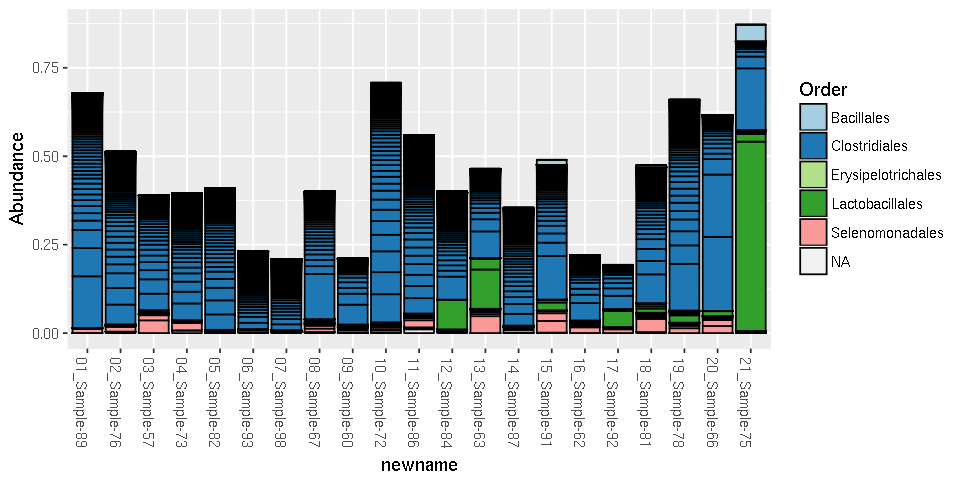

In [180]:
p_firm <-  subset_taxa(psN2, Phylum == 'Firmicutes') %>%
plot_bar( x = 'newname', fill = 'Order') + scale_fill_manual(values = cb10) #+ theme_bw()
p_firm
#ggsave('plots/MostFirmicutesAreClostridiales.png')

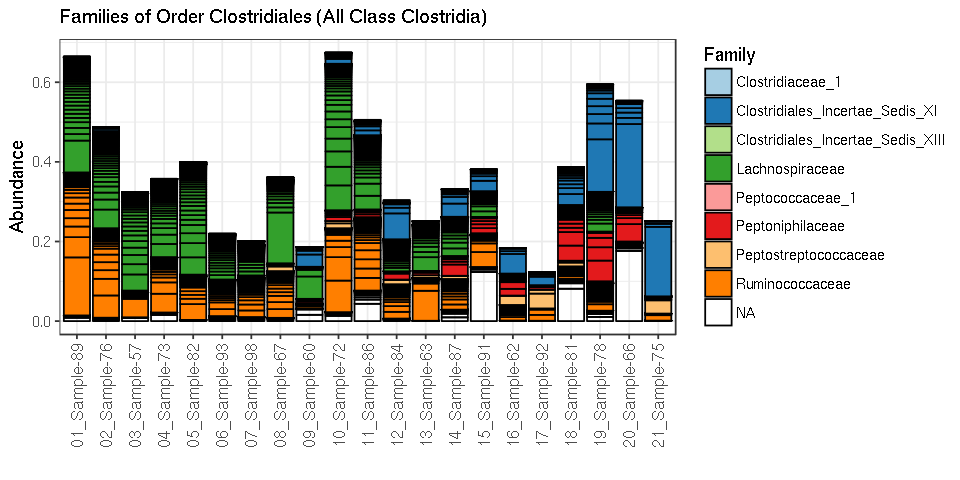

In [181]:
p_clostridia <-  subset_taxa(psN2, Class == 'Clostridia') %>%
plot_bar( x = 'newname', fill = 'Family') + scale_fill_manual(values = cb10)  + xlab("") +
ggtitle("Families of Order Clostridiales (All Class Clostridia)")+ theme_bw() +
theme(axis.text.x = element_text(angle = 90, hjust = 1,, vjust = 0.5, size = 10),
     strip.text.y = (element_text(angle = 90)))
p_clostridia

In [182]:
# p_porph <-  subset_taxa(psN2, Family == 'Porphyromonadaceae') %>%
# plot_bar( x = 'newname', fill = 'Genus') + scale_fill_manual(values = cb10) #+ theme_bw()
# p_porph

In [183]:
# p_bact <- subset_taxa(psN2, Phylum == 'Bacteroidetes') %>% # all class (Bacteroidia), order (Bacteroidales)
# plot_bar(x = 'newname', fill = 'Family') + scale_fill_manual(values = cb10) #+ theme_bw()
# p

# ggsave('figures/Bacteroidetes_Families.png')

Saving 6.67 x 6.67 in image


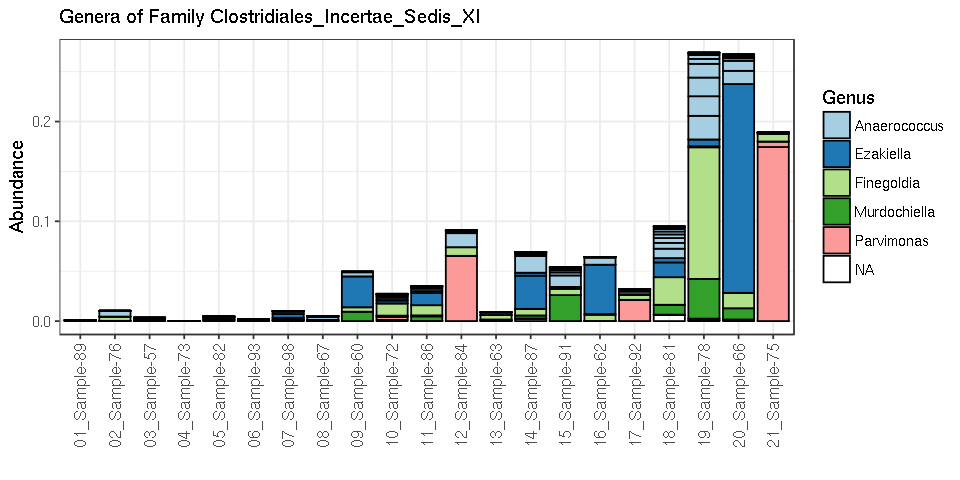

In [184]:
p_ClosXI <- subset_taxa(psN2, Family == 'Clostridiales_Incertae_Sedis_XI') %>%
plot_bar( x = 'newname', fill = 'Genus') + scale_fill_manual(values = cb10) + xlab("") +
ggtitle("Genera of Family Clostridiales_Incertae_Sedis_XI")+ theme_bw() +
theme(axis.text.x = element_text(angle = 90, hjust = 1,, vjust = 0.5, size = 10),
     strip.text.y = (element_text(angle = 90)))
p_ClosXI
ggsave('figures/Clostridiales_Incertae_Sedis_XI_Genus.png')

Saving 6.67 x 6.67 in image


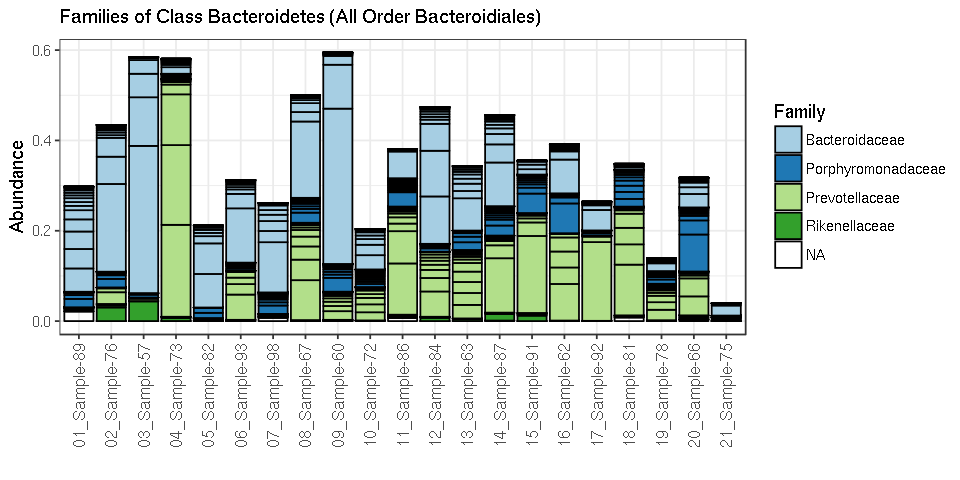

In [185]:

p_Bact <- subset_taxa(psN2, Phylum == 'Bacteroidetes') %>%
plot_bar( x = 'newname', fill = 'Family') + scale_fill_manual(values = cb10) + xlab("") +
ggtitle("Families of Class Bacteroidetes (All Order Bacteroidiales)")+ theme_bw() +
theme(axis.text.x = element_text(angle = 90, hjust = 1,, vjust = 0.5, size = 10),
     strip.text.y = (element_text(angle = 90)))
p_Bact
ggsave('figures/Bacteroides.png')

In [186]:
lay <- rbind(c(1,2), c(3,4))

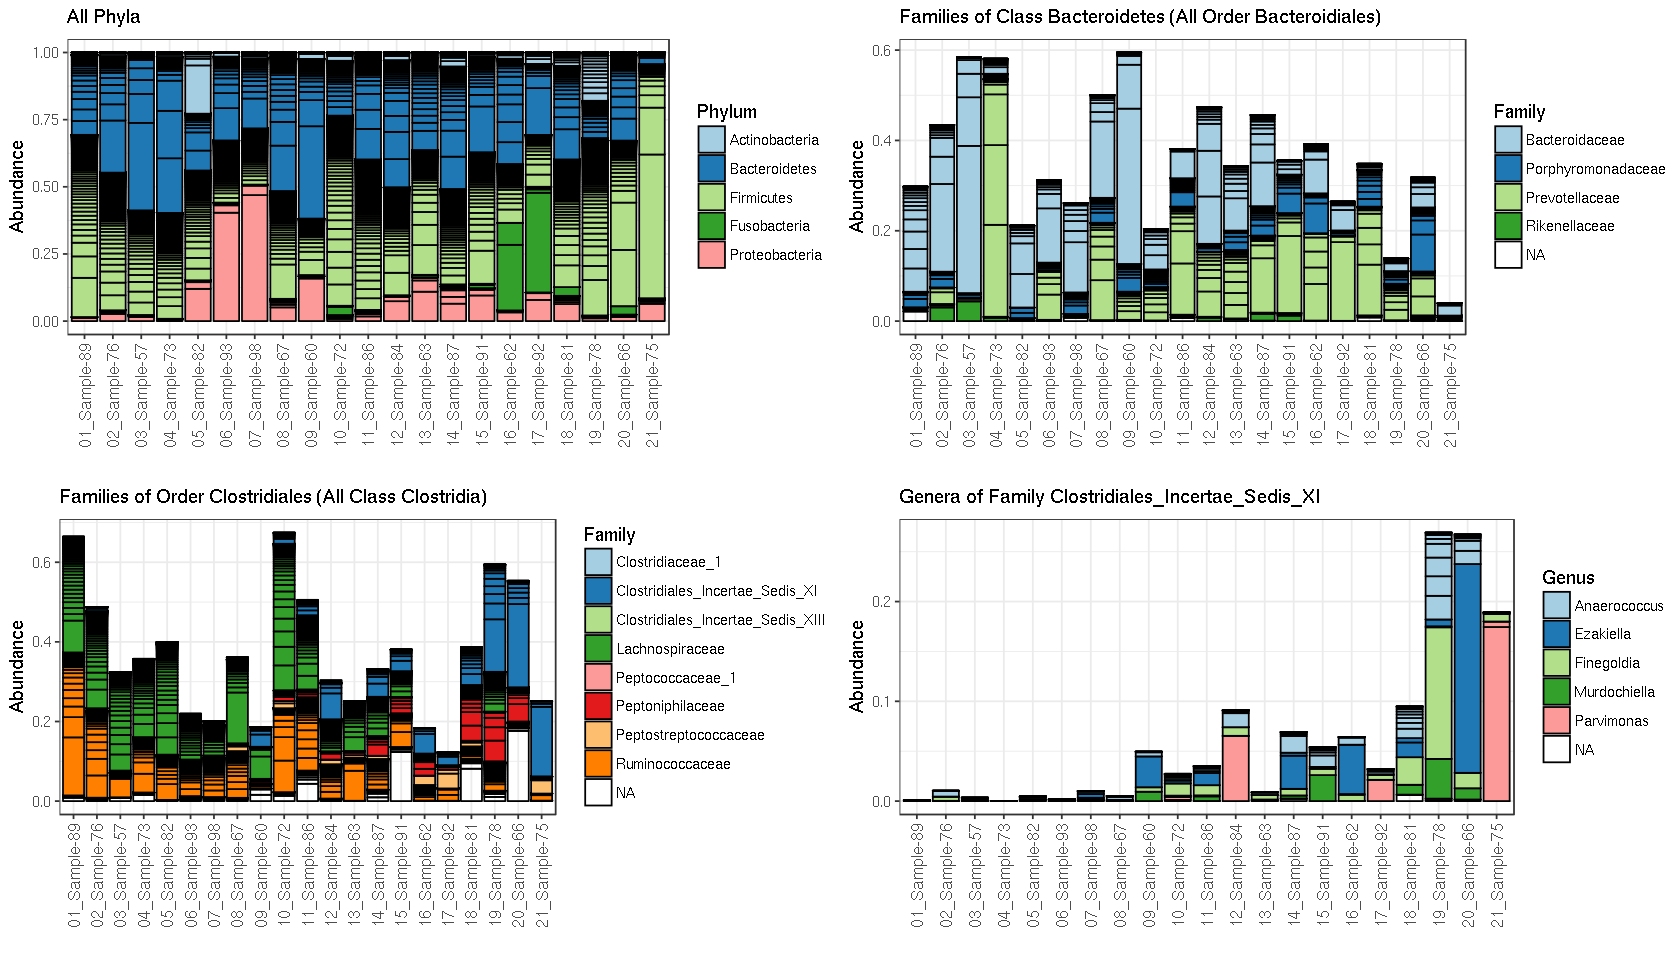

In [187]:
options(repr.plot.width=14, repr.plot.height= 8)
grid.arrange(p_phy, p_Bact,p_clostridia,p_ClosXI, layout_matrix = lay)

In [188]:
stacked_bars <- arrangeGrob(
    p_phy, p_Bact,p_clostridia,p_ClosXI, layout_matrix = lay
)
ggsave('figures/stacked_bars.png', stacked_bars, width = 14, height = 8)

# Exporting OTU tables and Taxa tables at each agglomeration level

In [189]:
psDf1 %>%
.[1:5,] %>%
mutate(Tax = map(Tax, ~dplyr::select(.,-oldname2))) %>%
print

# A tibble: 5 x 12
  taxLevels ntaxa psCount  ps     jsd   jsdMat kjsd  psNoZero clr   OTU   Tax  
  <chr>     <int> <list>   <list> <lis> <list> <lis> <list>   <lis> <lis> <lis>
1 Phylum        5 <S4: ph… <S4: … <S3:… <dbl … <dbl… <S4: ph… <S4:… <dat… <dat…
2 Class        12 <S4: ph… <S4: … <S3:… <dbl … <dbl… <S4: ph… <S4:… <dat… <dat…
3 Order        17 <S4: ph… <S4: … <S3:… <dbl … <dbl… <S4: ph… <S4:… <dat… <dat…
4 Family       36 <S4: ph… <S4: … <S3:… <dbl … <dbl… <S4: ph… <S4:… <dat… <dat…
5 Genus        90 <S4: ph… <S4: … <S3:… <dbl … <dbl… <S4: ph… <S4:… <dat… <dat…
# ... with 1 more variable: OTUCount <list>


In [190]:
# https://stackoverflow.com/questions/50341012/return-the-mapped-object-if-expression-inside-of-purrrpossibly-fails/50341205#50341205
rm_oldname2 <- function(x){
    f = possibly(function() dplyr::select(x, -oldname2), otherwise = x)
        f()
}

In [191]:
psDf1 %>%
#.[1:5,] %>%
mutate(Tax = map(Tax, rm_oldname2)) %>%
pass -> psDf1b

In [192]:
print(psDf1)

# A tibble: 6 x 12
  taxLevels ntaxa psCount  ps     jsd   jsdMat kjsd  psNoZero clr   OTU   Tax  
  <chr>     <int> <list>   <list> <lis> <list> <lis> <list>   <lis> <lis> <lis>
1 Phylum        5 <S4: ph… <S4: … <S3:… <dbl … <dbl… <S4: ph… <S4:… <dat… <dat…
2 Class        12 <S4: ph… <S4: … <S3:… <dbl … <dbl… <S4: ph… <S4:… <dat… <dat…
3 Order        17 <S4: ph… <S4: … <S3:… <dbl … <dbl… <S4: ph… <S4:… <dat… <dat…
4 Family       36 <S4: ph… <S4: … <S3:… <dbl … <dbl… <S4: ph… <S4:… <dat… <dat…
5 Genus        90 <S4: ph… <S4: … <S3:… <dbl … <dbl… <S4: ph… <S4:… <dat… <dat…
6 Species     536 <S4: ph… <S4: … <S3:… <dbl … <dbl… <S4: ph… <S4:… <dat… <dat…
# ... with 1 more variable: OTUCount <list>


In [193]:
# Show which species level OTUs are contained in each agglomerated group:
psDf1b %>%
.[1:5,] %>%
mutate(TaxIdx = map(Tax, function(df){
    df %>%
    mutate(tag = as.character(tag), oldGroups = as.character(oldGroups)) %>%
    dplyr::select(tag, oldGroups) %>%
    mutate(oldGroups = strsplit(oldGroups, ",")) %>%
    unnest(oldGroups)
})) %>%
dplyr::select(taxLevels, TaxIdx) %>%
unnest(TaxIdx) %>%
mutate(oldGroups = trimws(oldGroups)) %>% # Some of these have leading or trailing whitespace
spread(taxLevels, tag) %>%
dplyr::select(oldGroups, Phylum, Class, Order, Family, Genus) %>%
pass -> taxGroupMapping
write_csv(taxGroupMapping, 'tables/taxGroupMapping.csv')

In [194]:
# Print out each otu table (relative abundances).
walk2(psDf1b$taxLevels, psDf1b$OTU, 
      ~write.csv(.y, file = paste0("tables/OTU/otu_",.x, ".csv")))

In [195]:
# Print out each otu table (counts).
walk2(psDf1b$taxLevels, psDf1b$OTUCount, 
      ~write.csv(.y, file = paste0("tables/OTU/otuCount_",.x, ".csv")))

In [196]:
# Print out each taxonomy table.
walk2(psDf1b$taxLevels, psDf1b$Tax, 
      ~write_csv(.y, path = paste0("tables/Tax/tax_",.x, ".csv")))

In [197]:
# Print out tax table with agglomeration levels included
psN2 %>% tax_table %>% as.data.frame %>% write_csv("tables/Tax/taxAg_all.csv")

# Fukuyama Additions
adaptive gPCA and sparse LDA

## agPCA

In [198]:
library(adaptiveGPCA)

In [199]:
transform_compositional = function(ps) {
  otu_table(ps) = otu_table(
    get_taxa(ps) / rowSums(get_taxa(ps)),
    taxa_are_rows = FALSE
  )
 ps
}

In [200]:
psDf %>% print

# A tibble: 6 x 9
  taxLevels ntaxa psCount        ps      jsd    jsdMat   kjsd   psNoZero clr   
  <chr>     <int> <list>         <list>  <list> <list>   <list> <list>   <list>
1 Phylum        5 <S4: phyloseq> <S4: p… <S3: … <dbl [2… <dbl … <S4: ph… <S4: …
2 Class        12 <S4: phyloseq> <S4: p… <S3: … <dbl [2… <dbl … <S4: ph… <S4: …
3 Order        17 <S4: phyloseq> <S4: p… <S3: … <dbl [2… <dbl … <S4: ph… <S4: …
4 Family       36 <S4: phyloseq> <S4: p… <S3: … <dbl [2… <dbl … <S4: ph… <S4: …
5 Genus        90 <S4: phyloseq> <S4: p… <S3: … <dbl [2… <dbl … <S4: ph… <S4: …
6 Species     536 <S4: phyloseq> <S4: p… <S3: … <dbl [2… <dbl … <S4: ph… <S4: …


In [201]:
ps_log_cca <- psN1 %>%
transform_sample_counts(function(x) log(1+x)) %>%
    transform_compositional() %>% mutate_phyloseq_sample(
                               mc41 = factor(medcode_hl(IgG_gp41_Month_0)),
                                                log120 = (IgG_Con.6.gp120.B_Month_12))

In [202]:
otutab = otu_table(ps_log_cca)
Q = ape::vcv(phy_tree(ps_log_cca))
Q = Q / sum(diag(Q)) * ncol(Q)
Qeig = eigen(Q)
X = scale(otutab, scale = FALSE)
out.adaptive = adaptivegpca(X, Qeig, k = 4)
out.adaptive$r

[1] 0.1764764

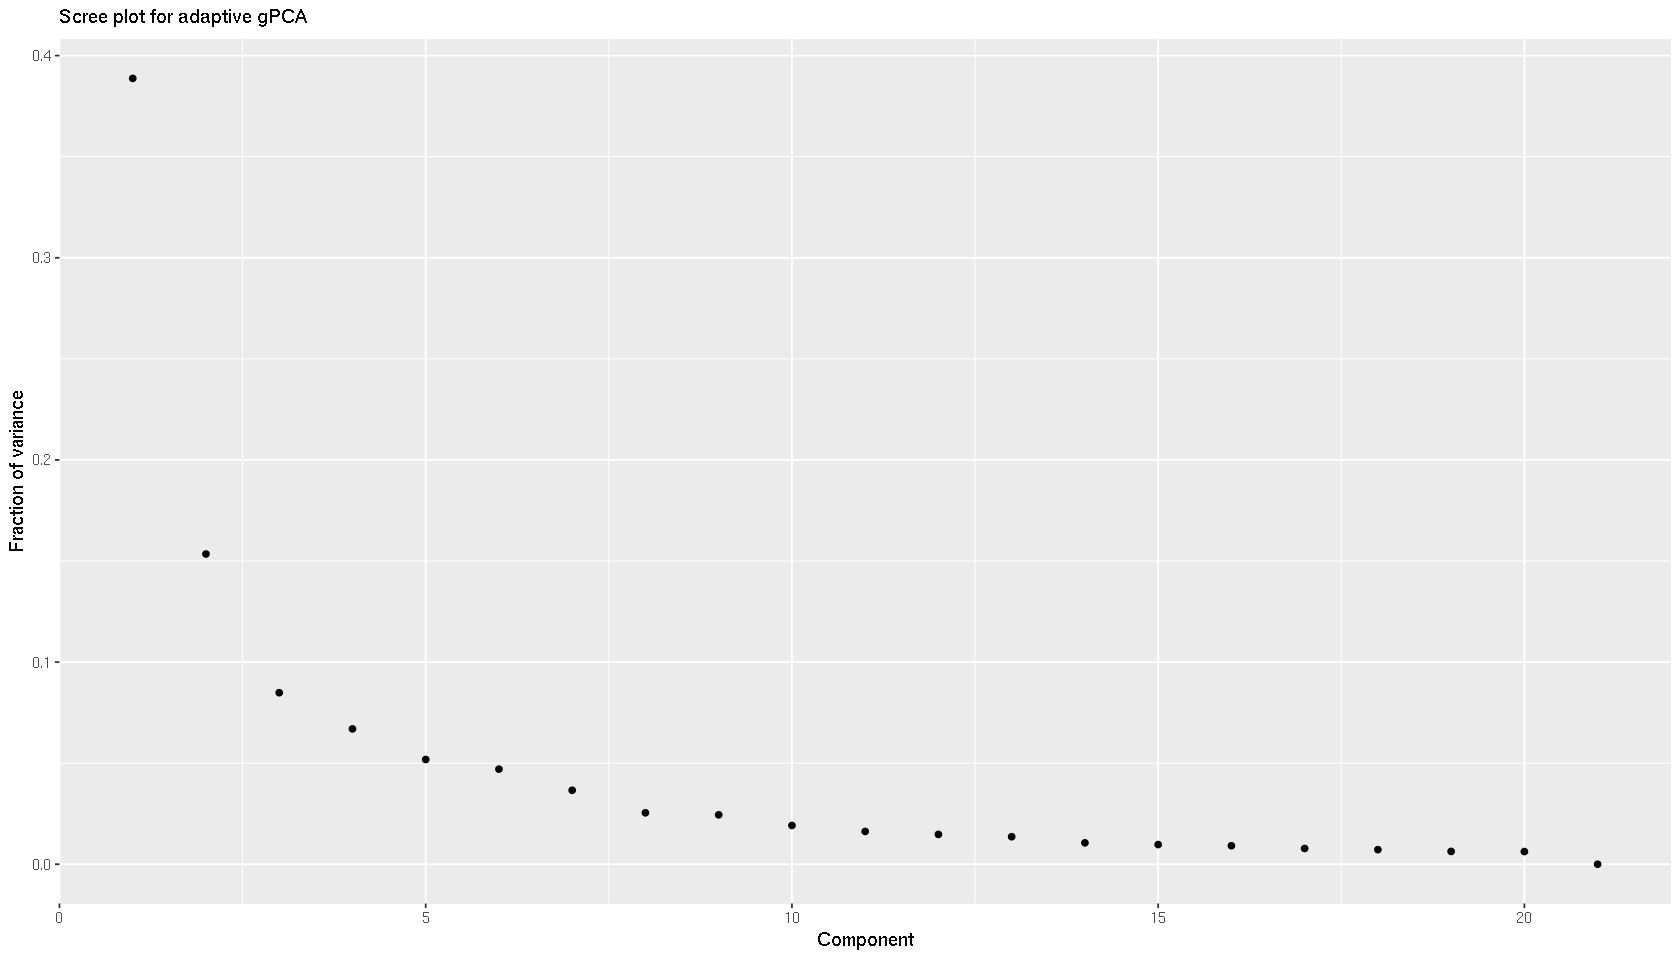

In [203]:
adaptive.evals = out.adaptive$vars
qplot(y = adaptive.evals / sum(adaptive.evals), x = seq_along(adaptive.evals)) +
  labs("x" = "Component", "y" = "Fraction of variance") +
  ggtitle("Scree plot for adaptive gPCA")

In [206]:
##Fig2B
perc1 = round(adaptive.evals[1] / sum(adaptive.evals) * 100, digits = 1)
perc2 = round(adaptive.evals[2] / sum(adaptive.evals) * 100, digits = 1)
Fig2B<- ggplot(data.frame(out.adaptive$U, sample_data(ps_log_cca))) +
  geom_point(aes(x = Axis1, y = Axis2, fill = mc41), size = 5, stroke = 1, shape = 21) +
  xlab(paste0("Axis.1 [", perc1, "%]")) +
  ylab(paste0("Axis.2 [", perc2, "%]")) + 
viridis::scale_fill_viridis(name = 'gp41 Baseline', direction =-1, discrete = TRUE) +
coord_fixed(sqrt(out.adaptive$vars[2]/out.adaptive$vars[1]))+
theme_bw()

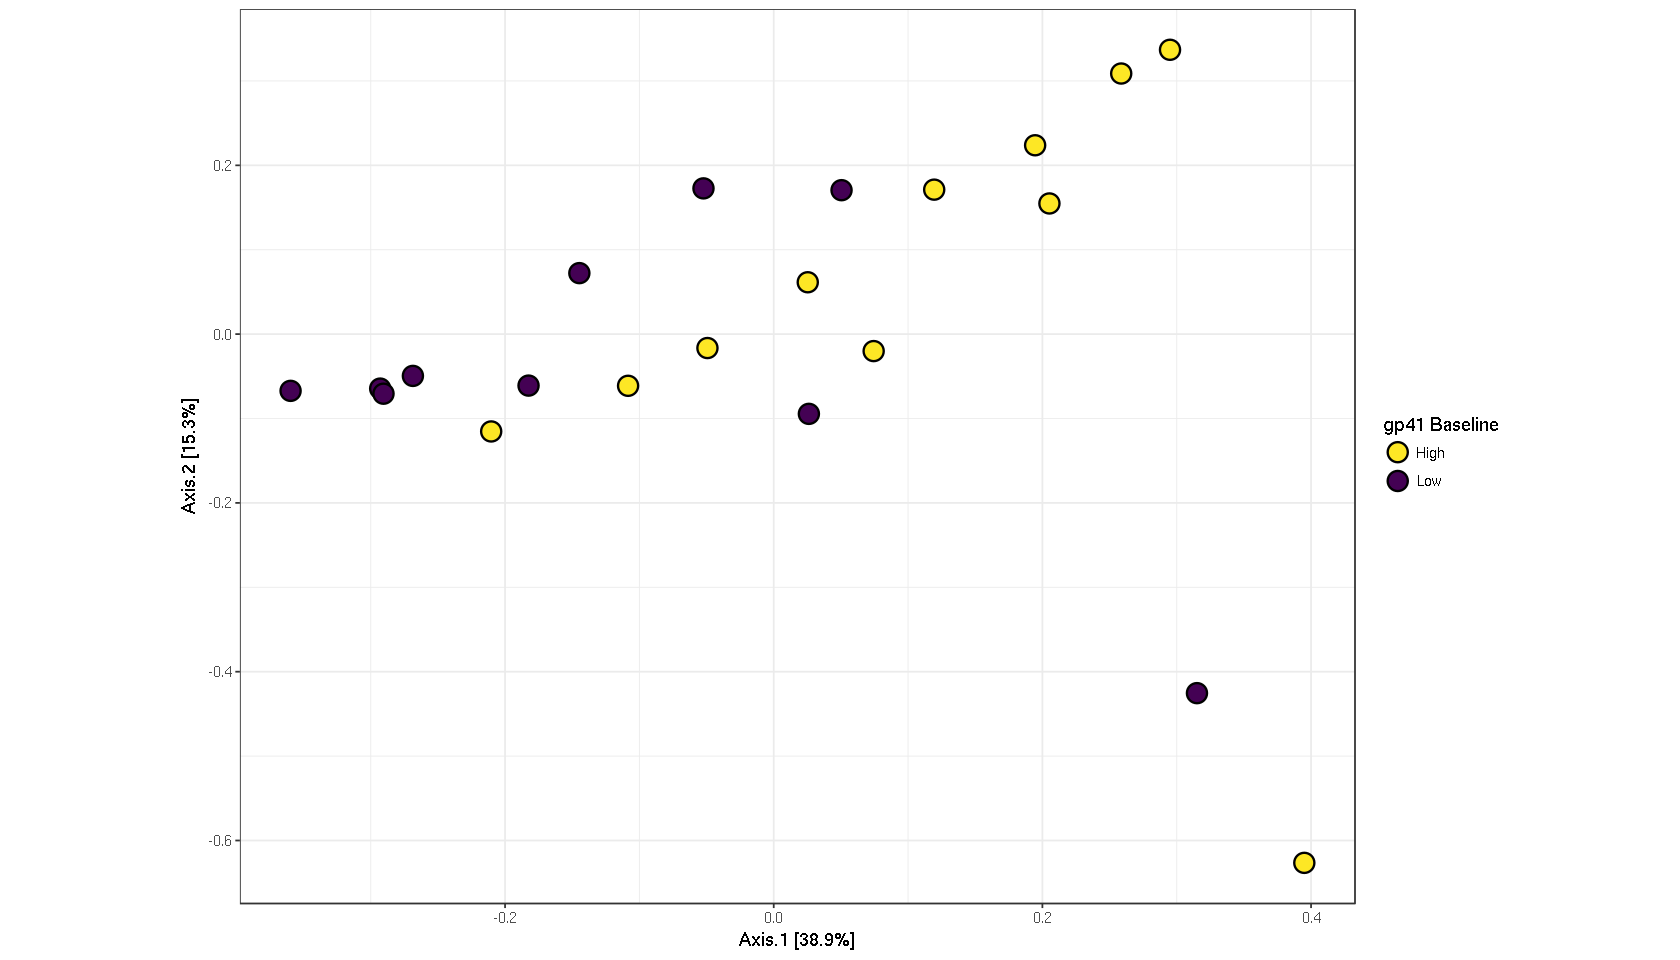

In [207]:
Fig2B

### agSamples

In [208]:
##Fig2B
perc1 = round(adaptive.evals[1] / sum(adaptive.evals) * 100, digits = 1)
perc2 = round(adaptive.evals[2] / sum(adaptive.evals) * 100, digits = 1)
Fig2B<- ggplot(data.frame(out.adaptive$U, sample_data(ps_log_cca))) +
  geom_point(aes(x = Axis1, y = Axis2, fill = log120), size = 5, stroke = 1, shape = 21) +
  xlab(paste0("Axis.1 [", perc1, "%]")) +
  ylab(paste0("Axis.2 [", perc2, "%]")) + 
viridis::scale_fill_viridis(name = 'gp120 Final', direction =1) +
coord_fixed(sqrt(out.adaptive$vars[2]/out.adaptive$vars[1]))+
theme_bw()

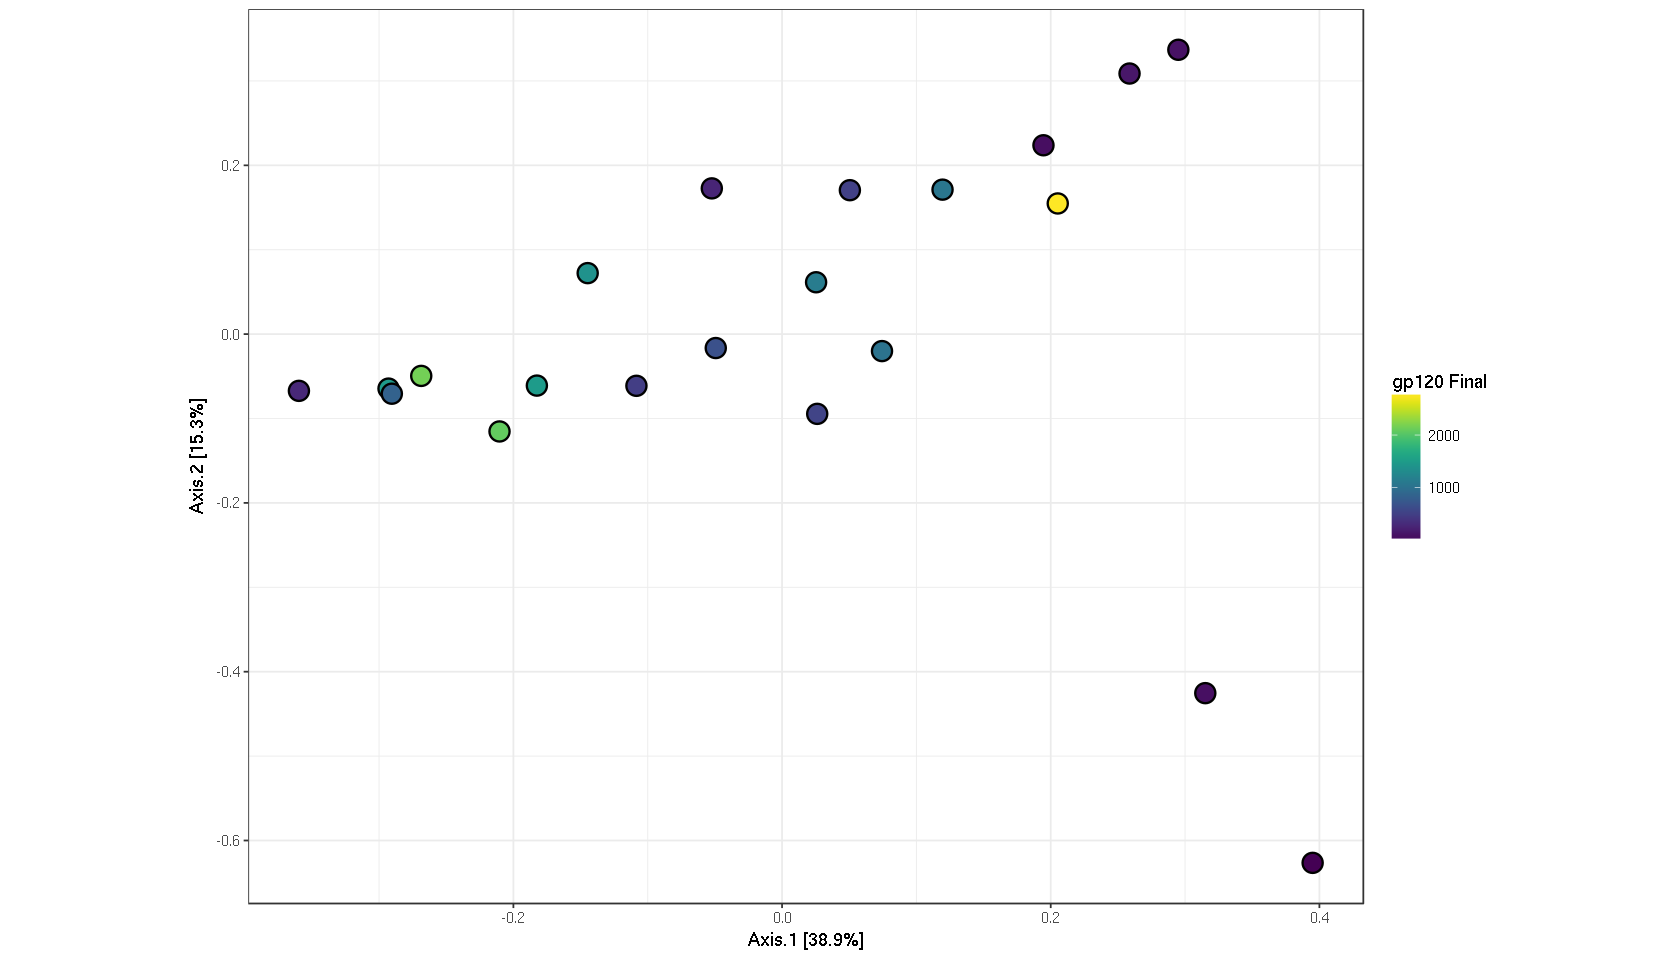

In [209]:
Fig2B

These look less clean than the weighted unifrac. The canary yellow high gp120 final is now clustered with the low gp120 final elements.

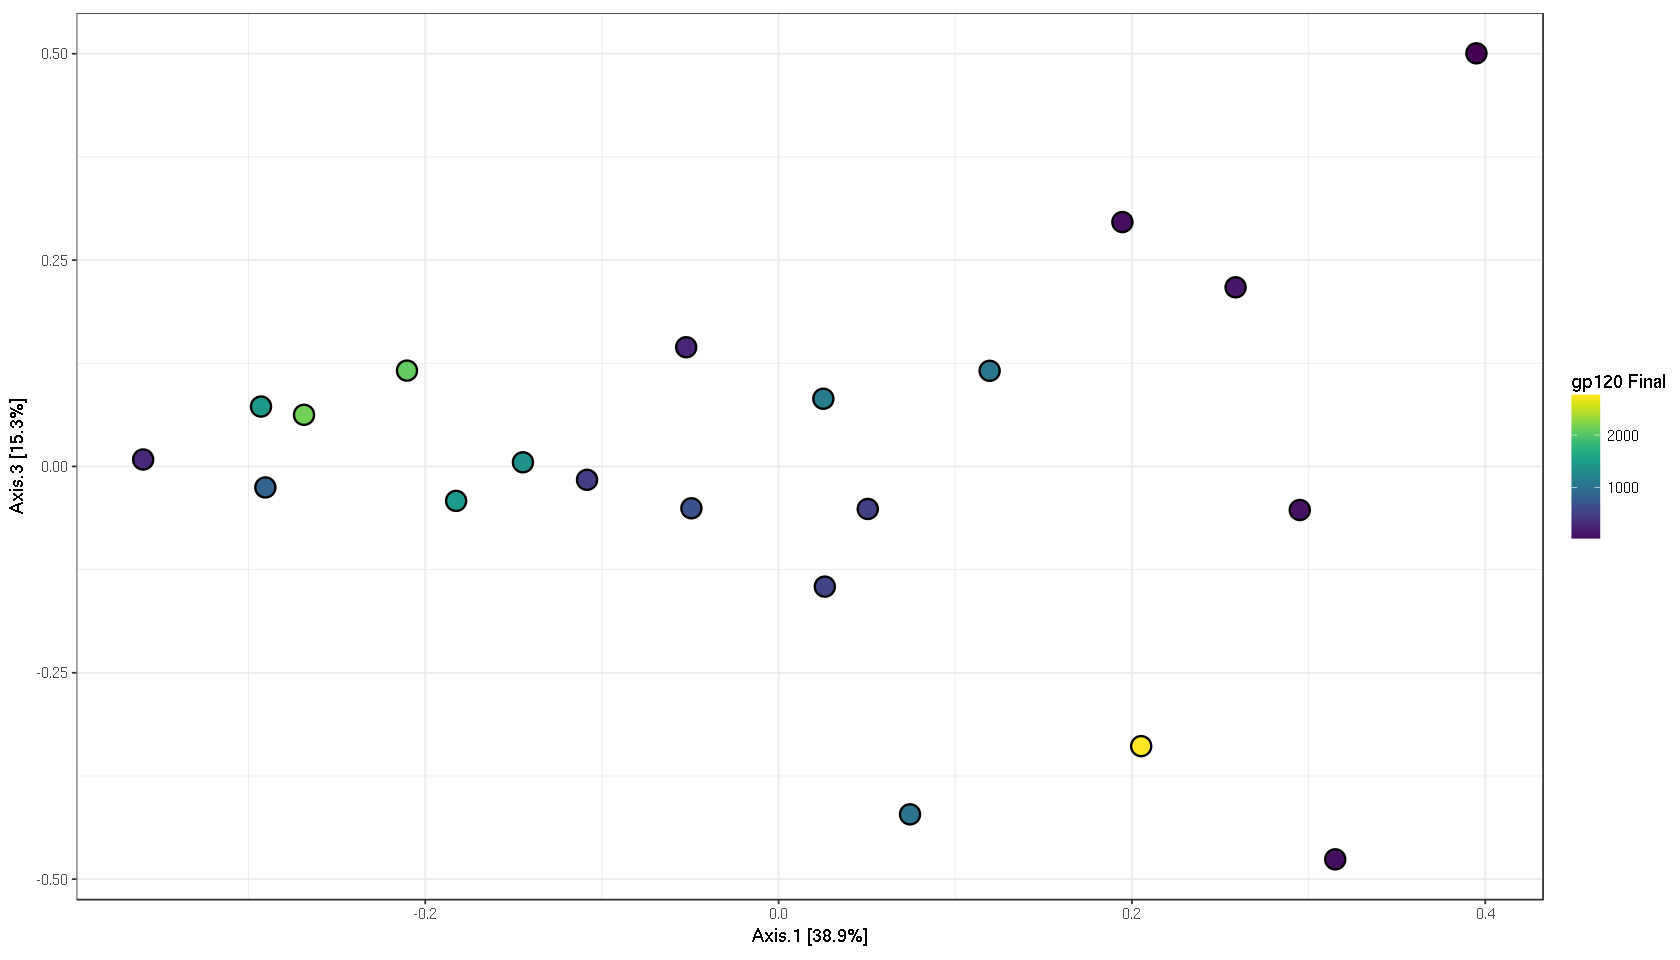

In [210]:
##Vs axis 3
perc1 = round(adaptive.evals[1] / sum(adaptive.evals) * 100, digits = 1)
perc2 = round(adaptive.evals[2] / sum(adaptive.evals) * 100, digits = 1)
Fig2B<- ggplot(data.frame(out.adaptive$U, sample_data(ps_log_cca))) +
  geom_point(aes(x = Axis1, y = Axis3, fill = log120), size = 5, stroke = 1, shape = 21) +
  xlab(paste0("Axis.1 [", perc1, "%]")) +
  ylab(paste0("Axis.3 [", perc2, "%]")) + 
viridis::scale_fill_viridis(name = 'gp120 Final', direction =1) +
coord_fixed(sqrt(out.adaptive$vars[3]/out.adaptive$vars[1]))+
theme_bw()
Fig2B

Showing taxa

In [211]:
psN2 %>% tax_table %>% as.data.frame %>% dplyr::filter(Class == 'Clostridia') %>% pull(Family) %>% unique

[1] Lachnospiraceae                   Clostridiaceae_1                 
[3] <NA>                              Peptococcaceae_1                 
[5] Clostridiales_Incertae_Sedis_XI   Peptoniphilaceae                 
[7] Clostridiales_Incertae_Sedis_XIII Peptostreptococcaceae            
[9] Ruminococcaceae                  
36 Levels: Acidaminococcaceae Actinomycetaceae ... Veillonellaceae

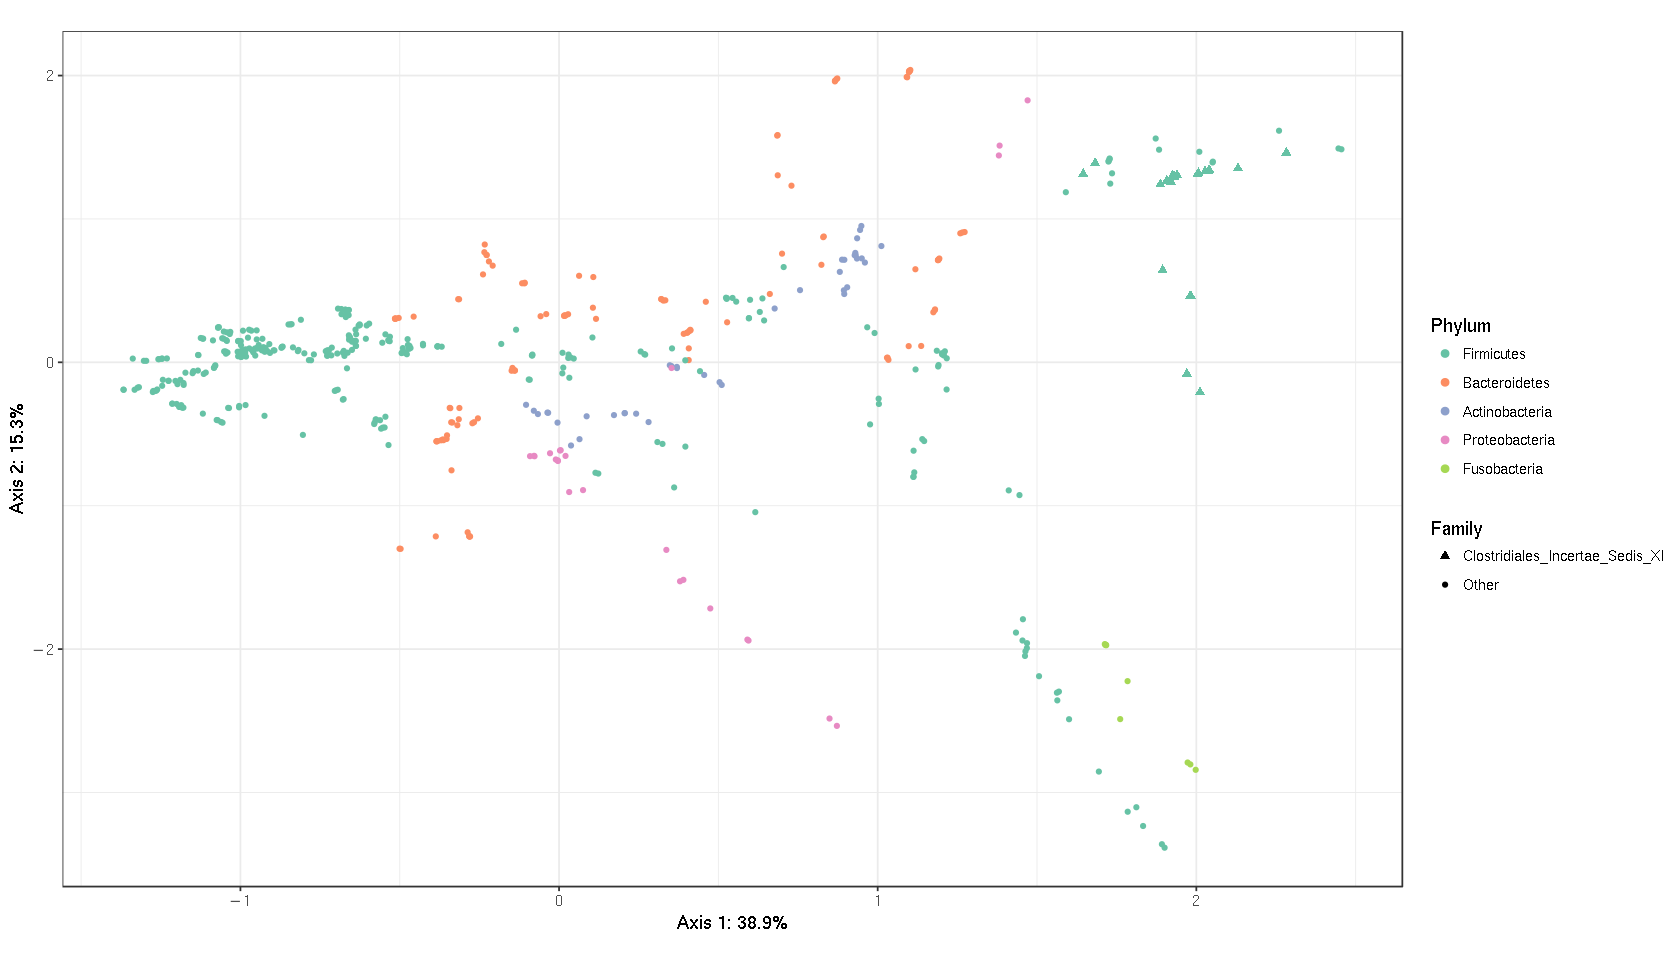

In [212]:
#Fig3C
agpca_phyla = data.frame(out.adaptive$QV, tax_table(ps_log_cca)[, c("Phylum", "Family")])

## Order phyla by abundance, and only label top 7
phyla_order = table(agpca_phyla$Phylum) %>%
  sort(decreasing = TRUE) %>%
  names()
agpca_phyla$Phylum = factor(
  agpca_phyla$Phylum,
  levels = c(phyla_order[1:7], "Other")
)
agpca_phyla$Phylum[is.na(agpca_phyla$Phylum)] <- "Other"

agpca_phyla$Family <- as.character(agpca_phyla$Family)
agpca_phyla$Family[agpca_phyla$Family != "Clostridiales_Incertae_Sedis_XI"] <- "Other"
agpca_phyla$Family[is.na(agpca_phyla$Family)] <- "Other"

trimmed_scientific <- function(l) {
  l <- gsub("e-[0-9]+", "", l)
  parse(text = l)
}

fig3c <- ggplot(agpca_phyla) +
  geom_point(
    data = agpca_phyla %>% filter(Phylum == "Other"),
    aes(x = Axis1, y = Axis2),
    size = 1, alpha = 0.6, col = "#5E5E5E"
  ) +
  geom_point(
    data = agpca_phyla %>% filter(Phylum != "Other"),
    aes(x = Axis1, y = Axis2, col = Phylum, shape = Family),
    size = 1.8
  ) +
  scale_color_brewer(palette = "Set2") +
  scale_shape_manual(values = c(17, 20)) +
  scale_x_continuous(labels = trimmed_scientific) +
  scale_y_continuous(labels = trimmed_scientific) +
  labs(
    "x" = paste0("Axis 1: ", perc1, "%"),
    "y" = paste0("Axis 2: ", perc2, "%"),
    "col" = "Phylum"
  ) + coord_fixed(0.45) + theme_bw()
fig3c  

### Ag Taxa

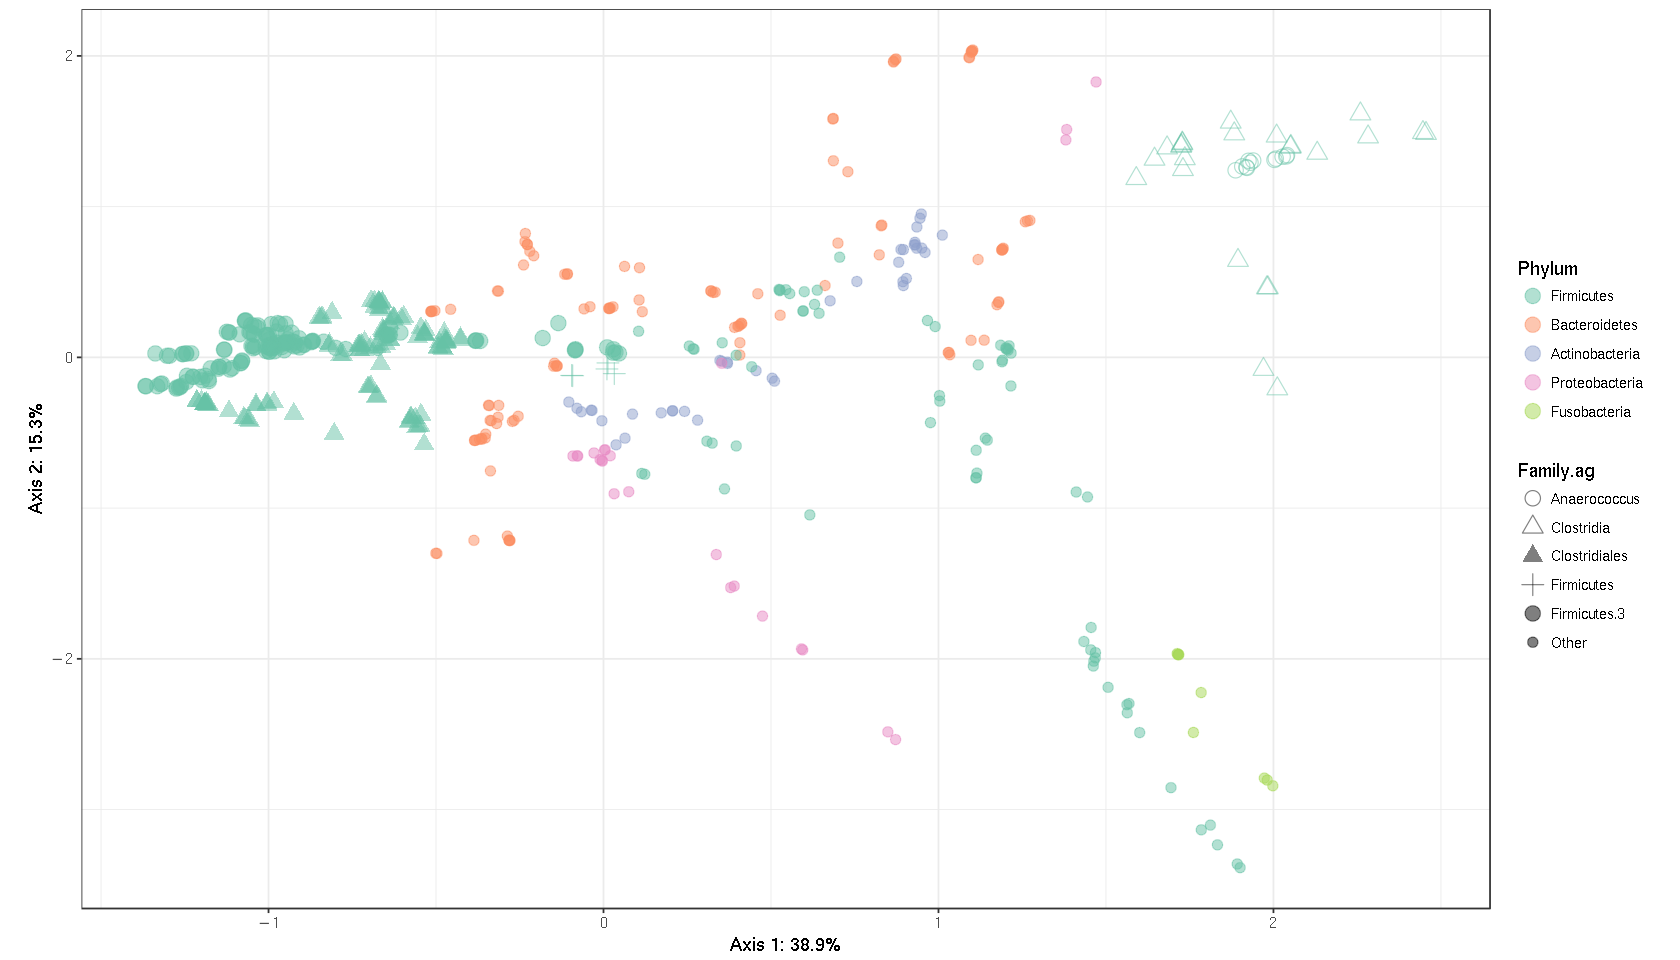

In [214]:
#Fig3C
agpca_phyla = data.frame(out.adaptive$QV, tax_table(ps_log_cca)[, c("Phylum", "Family.ag")])

## Order phyla by abundance, and only label top 7
phyla_order = table(agpca_phyla$Phylum) %>%
  sort(decreasing = TRUE) %>%
  names()
agpca_phyla$Phylum = factor(
  agpca_phyla$Phylum,
  levels = c(phyla_order[1:7], "Other")
)
agpca_phyla$Phylum[is.na(agpca_phyla$Phylum)] <- "Other"

agpca_phyla$Family.ag <- as.character(agpca_phyla$Family.ag)
agpca_phyla$Family.ag[!agpca_phyla$Family.ag %in%
                      c( "Clostridia", "Anaerococcus",
                        "Firmicutes","Firmicutes.3", "Clostridiales")] <- "Other"
agpca_phyla$Family.ag[is.na(agpca_phyla$Family.ag)] <- "Other"

trimmed_scientific <- function(l) {
  l <- gsub("e-[0-9]+", "", l)
  parse(text = l)
}

fig3c <- ggplot(agpca_phyla) +
  geom_point(
    data = agpca_phyla %>% filter(Phylum == "Other"),
    aes(x = Axis1, y = Axis2),
    size = 1, alpha = 0.4, col = "#5E5E5E"
  ) +
  geom_point(
    data = agpca_phyla %>% filter(Phylum != "Other"),
    aes(x = Axis1, y = Axis2, col = Phylum, shape = Family.ag),
    size = 4, alpha = 0.5
  ) +
  scale_color_brewer(palette = "Set2") +
  scale_shape_manual(values = c(1, 2, 17, 3, 19, 20)) +
  scale_x_continuous(labels = trimmed_scientific) +
  scale_y_continuous(labels = trimmed_scientific) +
  labs(
    "x" = paste0("Axis 1: ", perc1, "%"),
    "y" = paste0("Axis 2: ", perc2, "%"),
    "col" = "Phylum"
  ) + coord_fixed(0.45) + theme_bw()
fig3c  

Turns out both Anaerococcus and Clostrida family level groups are both Clostridiales Incertae Sedis 11 mostly plus peptonopholus

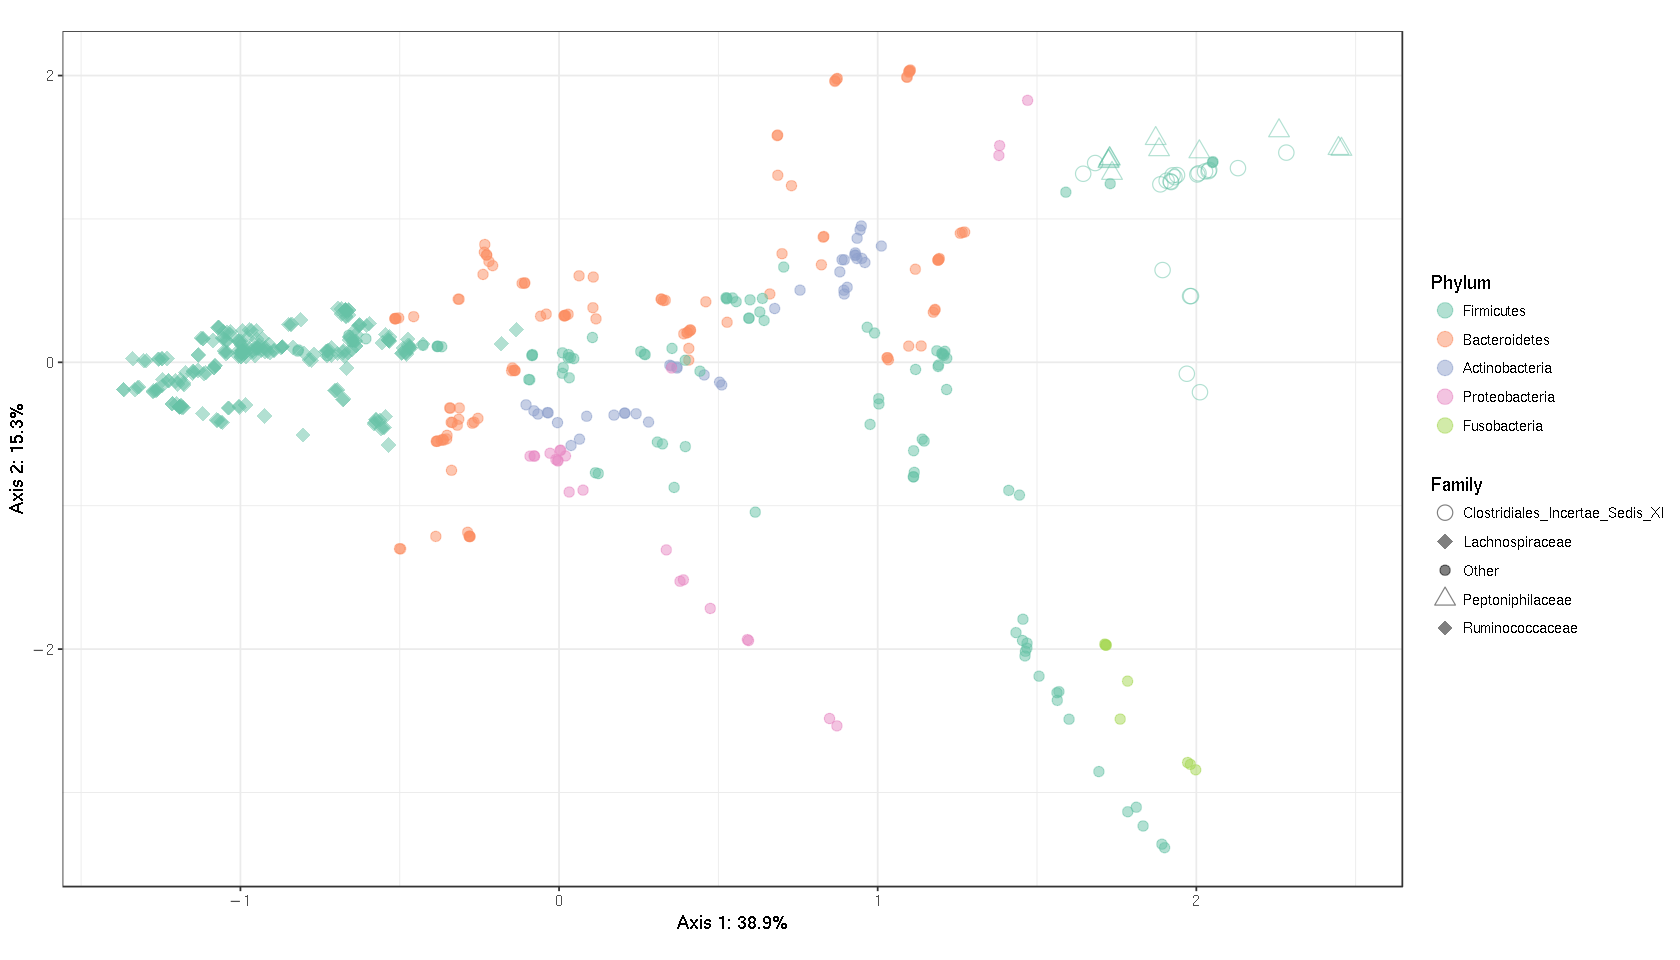

In [215]:
#Fig3C
agpca_phyla = data.frame(out.adaptive$QV, tax_table(ps_log_cca)[, c("Phylum", "Family")])

## Order phyla by abundance, and only label top 7
phyla_order = table(agpca_phyla$Phylum) %>%
  sort(decreasing = TRUE) %>%
  names()
agpca_phyla$Phylum = factor(
  agpca_phyla$Phylum,
  levels = c(phyla_order[1:7], "Other")
)
agpca_phyla$Phylum[is.na(agpca_phyla$Phylum)] <- "Other"

agpca_phyla$Family <- as.character(agpca_phyla$Family)
agpca_phyla$Family[!agpca_phyla$Family %in%
                      c( "Clostridiales_Incertae_Sedis_XI","Peptoniphilaceae",
                        "Ruminococcaceae", "Lachnospiraceae")] <- "Other"
agpca_phyla$Family[is.na(agpca_phyla$Family)] <- "Other"

trimmed_scientific <- function(l) {
  l <- gsub("e-[0-9]+", "", l)
  parse(text = l)
}

fig3c <- ggplot(agpca_phyla) +
  geom_point(
    data = agpca_phyla %>% filter(Phylum == "Other"),
    aes(x = Axis1, y = Axis2),
    size = 1, alpha = 0.4, col = "#5E5E5E"
  ) +
  geom_point(
    data = agpca_phyla %>% filter(Phylum != "Other"),
    aes(x = Axis1, y = Axis2, col = Phylum, shape = Family),
    size = 4, alpha = 0.5
  ) +
  scale_color_brewer(palette = "Set2") +
  scale_shape_manual(values = c(1, 18, 20, 2, 18)) +
  scale_x_continuous(labels = trimmed_scientific) +
  scale_y_continuous(labels = trimmed_scientific) +
  labs(
    "x" = paste0("Axis 1: ", perc1, "%"),
    "y" = paste0("Axis 2: ", perc2, "%"),
    "col" = "Phylum"
  ) + coord_fixed(0.45) + theme_bw()
fig3c  

## Sparse Discriminant Analysis

In [272]:
library(treeDA)

In [357]:
subjects = unique(sample_data(psN1)$pub_id)
X = as(log(1+otu_table(psN1)), 'matrix')


In [355]:
psN1 %>% otu_table %>% as('matrix') %>% {log(1+.)} -> X
for(idx in 1:dim(X)[1]){
       X[idx, ] = scale(X[idx, ], scale = FALSE)
    }

In [356]:
X[1:5, 1:5]

,Lachnospiraceae,Lachnospiraceae.1,Lachnospiraceae.2,Lachnospiraceae.3,Lachnospiraceae.4
Sample-57,0.16650349,-0.5266437,0.1665035,2.80556082,-0.52664369
Sample-60,-0.56405580,-0.5640558,-0.5640558,0.12909138,-0.56405580
Sample-62,0.04640506,-0.6467421,-0.6467421,-0.64674212,-0.64674212
Sample-63,0.33597478,-0.7626375,0.6236569,-0.06949032,-0.06949032
Sample-66,-0.66036255,-0.6603625,-0.6603625,1.13139692,0.03278463


In [378]:
pvec = 1:18 # the loop crashes at 19, so I stop at 18
cvloss = matrix(NA, nrow = length(pvec), ncol = length(subjects))
colnames(cvloss) = rownames(X)
rownames(cvloss) = pvec
A = treeDA:::makeDescendantMatrix(phy_tree(psN1))

In [379]:
for(i in seq_along(pvec)){
for(s in 1:dim(X)[1]) {
        cat(sprintf("Training \t subject: %s \t p: %s\n", s, pvec[i]))

        trainidx = which(1:dim(X)[1] !=s)
        out.treeda = treeda(
          factor(medcode_hl(sample_data(psN1)$IgG_gp41_Month_0))[trainidx],
          X[trainidx,],
          phy_tree(psN1),
          p = pvec[i],
          check.consist = FALSE,
          scale = FALSE,
          A = A
        )

        prediction = predict(out.treeda, X[])$classes[-trainidx]
        cvloss[i,s] = sum(prediction != medcode_hl(sample_data(psN1)$IgG_gp41_Month_0)[-trainidx])
    } # for s
    } # for i

Training 	 subject: 1 	 p: 1
Training 	 subject: 2 	 p: 1
Training 	 subject: 3 	 p: 1
Training 	 subject: 4 	 p: 1
Training 	 subject: 5 	 p: 1
Training 	 subject: 6 	 p: 1
Training 	 subject: 7 	 p: 1
Training 	 subject: 8 	 p: 1
Training 	 subject: 9 	 p: 1
Training 	 subject: 10 	 p: 1
Training 	 subject: 11 	 p: 1
Training 	 subject: 12 	 p: 1
Training 	 subject: 13 	 p: 1
Training 	 subject: 14 	 p: 1
Training 	 subject: 15 	 p: 1
Training 	 subject: 16 	 p: 1
Training 	 subject: 17 	 p: 1
Training 	 subject: 18 	 p: 1
Training 	 subject: 19 	 p: 1
Training 	 subject: 20 	 p: 1
Training 	 subject: 21 	 p: 1
Training 	 subject: 1 	 p: 2
Training 	 subject: 2 	 p: 2
Training 	 subject: 3 	 p: 2
Training 	 subject: 4 	 p: 2
Training 	 subject: 5 	 p: 2
Training 	 subject: 6 	 p: 2
Training 	 subject: 7 	 p: 2
Training 	 subject: 8 	 p: 2
Training 	 subject: 9 	 p: 2
Training 	 subject: 10 	 p: 2
Training 	 subject: 11 	 p: 2
Training 	 subject: 12 	 p: 2
Training 	 subject: 13 	 p: 

In [382]:
cvloss

,Sample-57,Sample-60,Sample-62,Sample-63,Sample-66,Sample-67,Sample-72,Sample-73,Sample-75,Sample-76,⋯,Sample-81,Sample-82,Sample-84,Sample-86,Sample-87,Sample-89,Sample-91,Sample-92,Sample-93,Sample-98
1,0,0,0,1,0,0,0,0,0,0,⋯,0,1,1,0,1,0,0,1,0,0
2,1,0,0,1,0,1,0,0,0,0,⋯,0,1,1,1,1,0,0,1,0,0
3,1,0,0,1,0,1,0,0,0,0,⋯,0,1,1,1,1,0,0,1,0,0
4,1,0,1,1,0,1,0,0,0,0,⋯,0,1,1,1,1,0,0,1,0,0
5,1,0,0,1,0,1,0,0,0,0,⋯,0,1,1,1,1,0,0,1,0,0
6,1,0,0,1,0,1,0,0,0,0,⋯,0,1,1,1,1,0,0,1,0,0
7,1,1,1,1,0,1,0,0,0,0,⋯,0,1,1,1,1,0,0,1,0,0
8,1,1,1,1,0,1,0,0,0,0,⋯,0,1,1,1,1,0,0,1,0,0
9,1,1,1,1,0,1,0,0,0,0,⋯,0,1,0,1,1,0,0,1,0,0
10,1,1,1,1,0,1,0,0,0,0,⋯,0,1,0,1,1,1,0,1,0,0


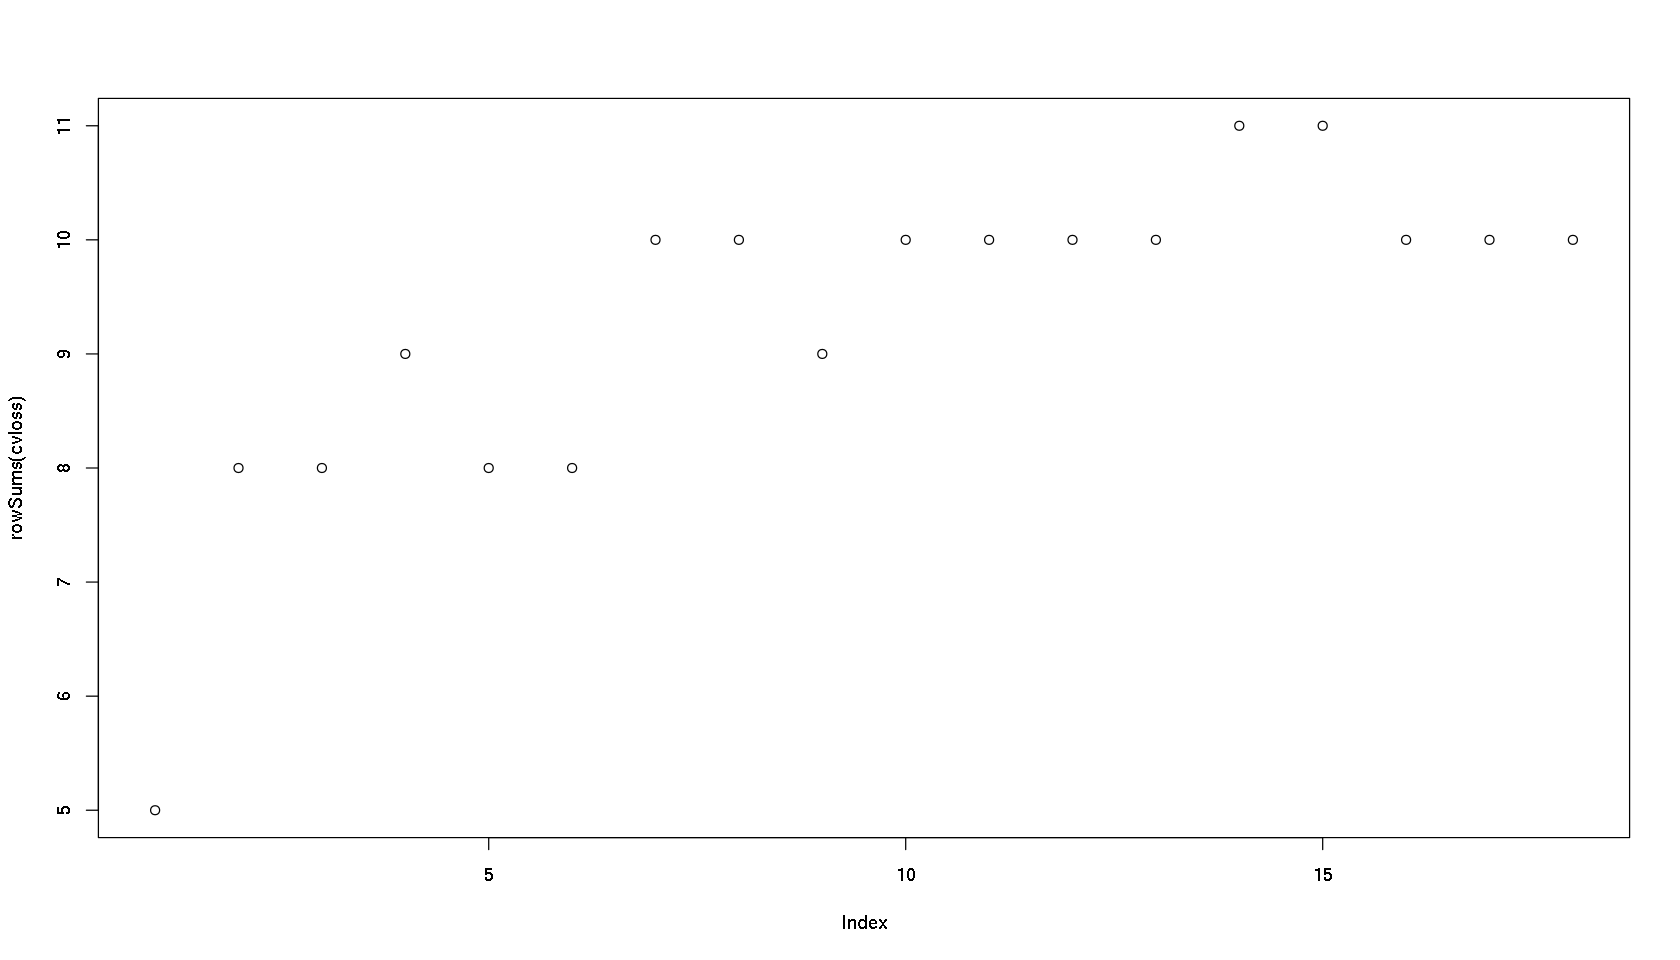

In [384]:
# five wrong guesses when only one parameter is used, more with more parameters
plot(rowSums(cvloss))

In [381]:
which.min(rowSums(cvloss))

1 
1

In [385]:
treeda.final = treeda(
    factor(medcode_hl(sample_data(psN1)$IgG_gp41_Month_0)),
    X,
    phy_tree(psN1),
    p = which.min(rowSums(cvloss)),
    check.consist = FALSE,
    A = A
)

In [386]:
treeda.final

An object of class treeda
-------------------------
1 predictors in the expanded space
were selected, corresponding to 4 
leaves on the tree
-------------------------
Confusion matrix:
      predicted
truth  High Low
  High    8   3
  Low     2   8

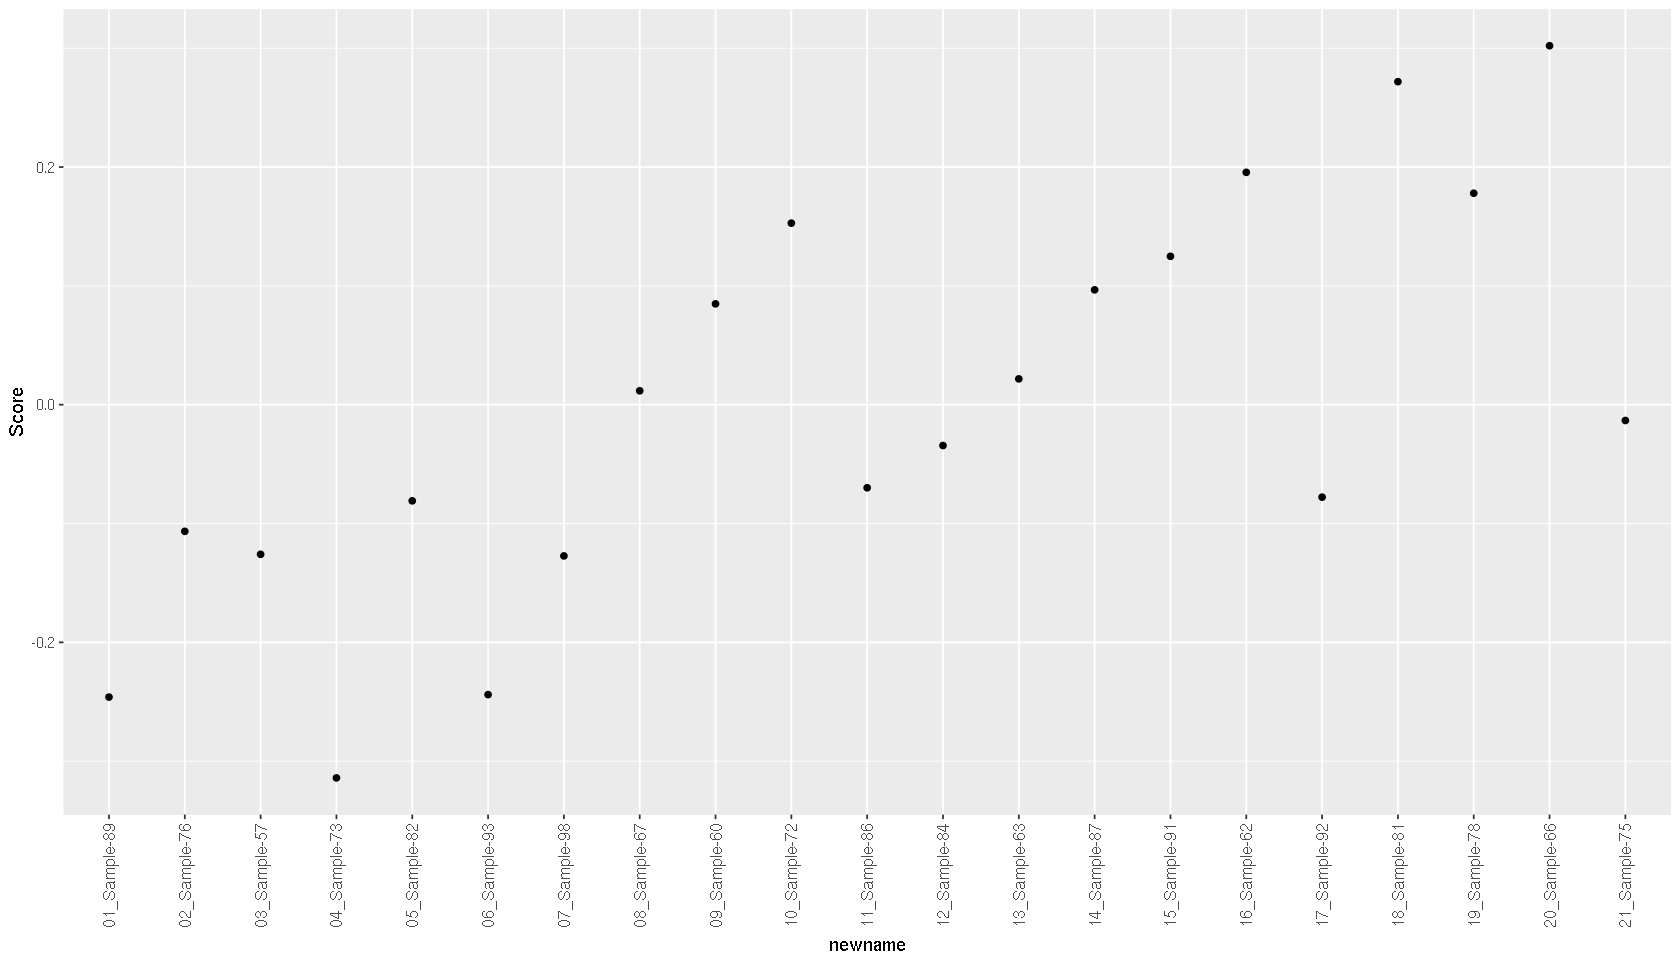

In [392]:
data.frame(proj = treeda.final$projections, sample_data(psN1)) %>%
ggplot() +
geom_point(aes(y = proj, x = newname)) + ylab("Score") +
theme(axis.text.x = element_text(angle = 90, hjust = 1,, vjust = 0.5, size = 10))

In [393]:
treeda.final %>% str

List of 12
 $ means           : num [1:1071] -0.118 -0.42 -0.339 1.021 -0.251 ...
 $ sds             : num [1:1071] 0.671 0.767 0.789 1.273 0.967 ...
 $ leafCoefficients:List of 2
  ..$ beta      :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. ..@ i       : int [1:4] 333 334 335 336
  .. .. ..@ p       : int [1:2] 0 4
  .. .. ..@ Dim     : int [1:2] 536 1
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : NULL
  .. .. .. ..$ : NULL
  .. .. ..@ x       : num [1:4] 0.0409 0.0409 0.0409 0.0409
  .. .. ..@ factors : list()
  ..$ intercepts: num [1, 1] -0.204
 $ input           :List of 3
  ..$ response  : Factor w/ 2 levels "High","Low": 2 1 1 2 1 1 1 2 1 2 ...
  ..$ predictors: num [1:21, 1:536] 0.1665 -0.5641 0.0464 0.336 -0.6604 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:21] "Sample-57" "Sample-60" "Sample-62" "Sample-63" ...
  .. .. ..$ : chr [1:536] "Lachnospiraceae" "Lachnospiraceae.1" "Lachnospiraceae.2" "Lachnospiraceae.3" ...
  ..$ tree      :Li

In [395]:
 ?combine_plot_and_tree

combine_plot_and_tree {treeDA},R Documentation
plot,A plot of data about the leaves with the x axis corresponding to leaves.
tree.plot,A plot of the tree.
tree.height,The relative amount of space in the plot the tree should take up.
print,"If true, the function will print the combined plot to a graphics device, otherwise it will just return the gtable object without printing."


I'm still a bit confused on otu color labeling

Warning message:
“Removed 4 rows containing missing values (geom_point).”

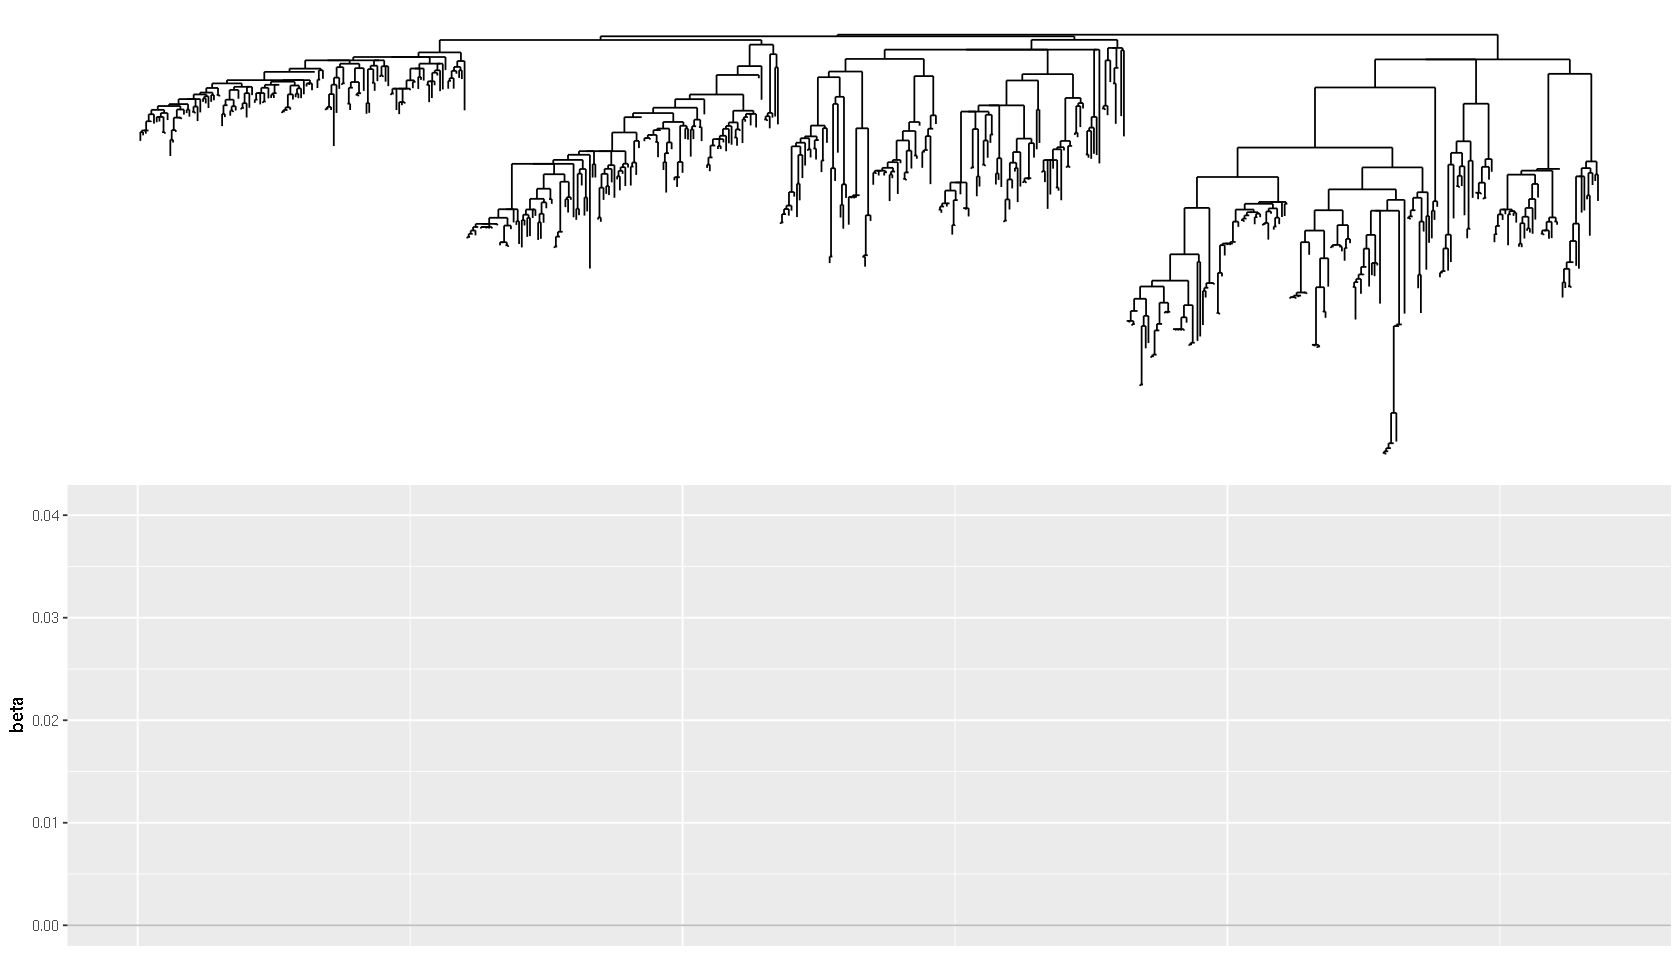

In [399]:
#Fig7B
tree.mod = phy_tree(psN1)
tree.mod$edge.length[tree.mod$edge.length > .7] = .7
generaToLabelDA = c("Bacteroides", "Roseburia", "Ruminococcus", "Oxalobacter",
                    "Clostridium_XlVb", "Parasutterella", "Sutterella")
genusSubsetDA = as.vector(tax_table(psN1)[,"Genus"])
#genusSubsetDA[!(genusSubsetDA %in% generaToLabelDA)] = "Other"

otu_position = get_leaf_position(tree.mod, ladderize = TRUE)$otu.pos
coorddf = data.frame(
    x = otu_position,
    y = as(treeda.final$leafCoefficients$beta, "matrix"),
    Genus = genusSubsetDA
)

coorddf = subset(coorddf, y != 0)
values = c(cb10[1:8], "bisque4")
names(values) = c(generaToLabelDA, "Other")
coorddf$Genus = factor(coorddf$Genus, levels = names(values), ordered = TRUE)

rsvplot = ggplot(coorddf) +
  geom_hline(aes(yintercept = 0), color = "gray") +
  geom_point(aes(x = x, y = y, color = Genus), size = 1) +
  scale_color_manual(values = values) +
  theme(axis.title.x=element_blank(), axis.text.x=element_blank(),
        axis.ticks.x=element_blank()) +
  ylab("beta") +
  scale_x_continuous(limits = c(min(otu_position), max(otu_position)))
treeplot = plot_tree(tree.mod, ladderize = TRUE) +
    coord_flip() +
    scale_x_reverse()

fullplot = combine_plot_and_tree(
  rsvplot + theme(legend.position = "none"),
  treeplot,
  tree.height = 1
)

In [402]:
coorddf = data.frame(
    x = otu_position,
    y = as(treeda.final$leafCoefficients$beta, "matrix"),
    Genus = genusSubsetDA
)

In [403]:
coorddf

x,y,Genus
56,0,NA
55,0,NA
53,0,NA
54,0,NA
57,0,NA
68,0,NA
66,0,Clostridium_XlVa
67,0,Clostridium_XlVa
79,0,NA
77,0,NA
